# Weeaboo Subsite Overview

## Preliminary Preparations

In [9]:
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib_venn
import seaborn as sns

import json
import yaml
import ast

import requests
from PIL import Image
from io import BytesIO
import IPython.display as Disp

from re import findall, match, sub
import itertools

from datetime import datetime
from datetime import tzinfo

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [10]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [11]:
weeaboo_origin = pd.read_csv(PATH + 'data_weeaboo_02_04.csv', index_col=0)
weeaboo_origin.reset_index(inplace=True)
weeaboo_origin.drop(columns=['index'], inplace=True)
weeaboo_origin.head()

id                                                url  \
0  690121  https://dtf.ru/s/weaboo/690121-itogi-mesyaca-mart   
1  691434                     https://dtf.ru/s/weaboo/691434   
2  691350                     https://dtf.ru/s/weaboo/691350   
3  688125  https://dtf.ru/s/weaboo/688125-evangelion-podb...   
4  691229  https://dtf.ru/u/195405-oleg-mattewho/691229-p...   

                                              author  \
0  {'id': 130392, 'url': 'https://dtf.ru/u/130392...   
1  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...   
2  {'id': 120739, 'url': 'https://dtf.ru/u/120739...   
3  {'id': 165653, 'url': 'https://dtf.ru/u/165653...   
4  {'id': 195405, 'url': 'https://dtf.ru/u/195405...   

                                              badges  commentsCount  \
0  [{'type': 'top', 'text': 'Виабу', 'background'...             59   
1  [{'type': 'top', 'text': 'Виабу', 'background'...              4   
2  [{'type': 'top', 'text': 'Виабу', 'background'...              4   
3  [{'type': 'top', 'text': 'Виабу', 'background'...              5   
4  [{'type': 'top', 'text': 'Oleg Mattewho', 'bac...              6   

   commentsSeenCount  favoritesCount  \
0                NaN              13   
1                NaN               1   
2                NaN               4   
3                NaN               9   
4                NaN              11   

                                               cover        date  \
0  {'additionalData': {'size': 1942242, 'type': '...  1617350215   
1  {'additionalData': {'size': 103112, 'type': 'j...  1617389883   
2  {'additionalData': {'size': 114314, 'type': 'j...  1617384763   
3  {'additionalData': {'size': 54458, 'type': 'jp...  1617380824   
4  {'additionalData': {'size': 109437, 'type': 'g...  1617378634   

                           dateRFC  ...  is_show_thanks  is_still_updating  \
0  Fri, 02 Apr 2021 10:56:55 +0300  ...           False              False   
1  Fri, 02 Apr 2021 21:58:03 +0300  ...           False              False   
2  Fri, 02 Apr 2021 20:32:43 +0300  ...           False              False   
3  Fri, 02 Apr 2021 19:27:04 +0300  ...           False              False   
4  Fri, 02 Apr 2021 18:50:34 +0300  ...           False              False   

   is_filled_by_editors isEditorial  audioUrl  hotness      commentEditor  \
0                 False       False       NaN        0  {'enabled': True}   
1                 False       False       NaN        0  {'enabled': True}   
2                 False       False       NaN        0  {'enabled': True}   
3                 False       False       NaN        0  {'enabled': True}   
4                 False       False       NaN        0  {'enabled': True}   

                                           summarize  \
0  Награды в трех категориях: Лучший мем месяца. ...   
1                                       #meme #виабу   
2                                                NaN   
3                           #подборка  #anime  #nsfw   
4  Подборочка, содержащая только cute scientist. ...   

                                              repost stackedRepostsAuthors  
0                                                NaN                   NaN  
1                                                NaN                   NaN  
2                                                NaN                   NaN  
3                                                NaN                   NaN  
4  {'author': {'id': 261696, 'url': 'https://dtf....                    []  

[5 rows x 43 columns]

In [12]:
weeaboo_origin.tail(3)

id                                                url  \
7099  170958                     https://dtf.ru/s/weaboo/170958   
7100  170948                     https://dtf.ru/s/weaboo/170948   
7101  170920  https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...   

                                                 author  \
7099  {'id': 197370, 'url': 'https://dtf.ru/u/197370...   
7100  {'id': 92674, 'url': 'https://dtf.ru/u/92674-a...   
7101  {'id': 212847, 'url': 'https://dtf.ru/u/212847...   

                                                 badges  commentsCount  \
7099  [{'type': 'top', 'text': 'Виабу', 'background'...              8   
7100  [{'type': 'top', 'text': 'Виабу', 'background'...              6   
7101  [{'type': 'top', 'text': 'Виабу', 'background'...             42   

      commentsSeenCount  favoritesCount  \
7099                NaN               1   
7100                NaN               1   
7101                NaN               4   

                                                  cover        date  \
7099  {'additionalData': {'size': 2761663, 'type': '...  1594749437   
7100  {'additionalData': {'size': 5588717, 'type': '...  1594748952   
7101  {'additionalData': {'size': 287640, 'type': 'j...  1594746603   

                              dateRFC  ...  is_show_thanks  is_still_updating  \
7099  Tue, 14 Jul 2020 20:57:17 +0300  ...           False              False   
7100  Tue, 14 Jul 2020 20:49:12 +0300  ...           False              False   
7101  Tue, 14 Jul 2020 20:10:03 +0300  ...           False              False   

      is_filled_by_editors isEditorial  audioUrl  hotness      commentEditor  \
7099                 False       False       NaN        0  {'enabled': True}   
7100                 False       False       NaN        0  {'enabled': True}   
7101                 False       False       NaN        0  {'enabled': True}   

                                              summarize  repost  \
7099         Говоров красава, спасибо за анимемы на дтф     NaN   
7100  Иначе я в Драме запосщу как они до меня домога...     NaN   
7101  Еще один мертвый подсайт, но зато с аниме Вмес...     NaN   

     stackedRepostsAuthors  
7099                   NaN  
7100                   NaN  
7101                   NaN  

[3 rows x 43 columns]

In [13]:
weeaboo_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7102 non-null   int64  
 1   url                     7102 non-null   object 
 2   author                  7102 non-null   object 
 3   badges                  7102 non-null   object 
 4   commentsCount           7102 non-null   int64  
 5   commentsSeenCount       0 non-null      float64
 6   favoritesCount          7102 non-null   int64  
 7   cover                   6807 non-null   object 
 8   date                    7102 non-null   int64  
 9   dateRFC                 7102 non-null   object 
 10  date_favorite           0 non-null      float64
 11  last_modification_date  7102 non-null   int64  
 12  hitsCount               7102 non-null   int64  
 13  intro                   3982 non-null   object 
 14  introInFeed             0 non-null      

**Потенциально полезно:**
- id -- ИД статьи в базе, инкрементный идентификатор
- url -- ссылка на статью
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- cover -- это КПДВ (нужно ли?)
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки: словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- entryContent -- содержимое поста
- repost -- подсайт из которого сделан репост: словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 
- summarize -- последний абзац/резюмирующий абзац - видимо, некая фича редактора

## Data Preprocessing

In [14]:
date_parser = lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

In [15]:
df = pd.read_csv(PATH + "data_weeaboo_02_04.csv", parse_dates=['date'], date_parser=date_parser, 
                 index_col=None, # None / 0 / ['date']
                 usecols=['id', 'url', 'author', 'commentsCount', 'favoritesCount', 'date', 
                          'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 
                          'repost', 'stackedRepostsAuthors', 'blocks'])
df.head()

id                                                url  \
0  690121  https://dtf.ru/s/weaboo/690121-itogi-mesyaca-mart   
1  691434                     https://dtf.ru/s/weaboo/691434   
2  691350                     https://dtf.ru/s/weaboo/691350   
3  688125  https://dtf.ru/s/weaboo/688125-evangelion-podb...   
4  691229  https://dtf.ru/u/195405-oleg-mattewho/691229-p...   

                                              author  commentsCount  \
0  {'id': 130392, 'url': 'https://dtf.ru/u/130392...             59   
1  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              4   
2  {'id': 120739, 'url': 'https://dtf.ru/u/120739...              4   
3  {'id': 165653, 'url': 'https://dtf.ru/u/165653...              5   
4  {'id': 195405, 'url': 'https://dtf.ru/u/195405...              6   

   favoritesCount                date  hitsCount  isRepost  \
0              13 2021-04-02 10:56:55        599     False   
1               1 2021-04-02 21:58:03         70     False   
2               4 2021-04-02 20:32:43         85     False   
3               9 2021-04-02 19:27:04         88     False   
4              11 2021-04-02 18:50:34        177      True   

                                               likes  \
0  {'is_liked': 0, 'count': 62, 'summ': 62, 'is_h...   
1  {'is_liked': 0, 'count': 9, 'summ': 9, 'is_hid...   
2  {'is_liked': 0, 'count': 17, 'summ': 17, 'is_h...   
3  {'is_liked': 0, 'count': 23, 'summ': 23, 'is_h...   
4  {'is_liked': 0, 'count': 37, 'summ': 37, 'is_h...   

                                             subsite  \
0  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...   
1  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...   
2  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...   
3  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...   
4  {'id': 195405, 'url': 'https://dtf.ru/u/195405...   

                           title  type  \
0             Итоги месяца. Март     1   
1                            NaN     1   
2                            NaN     1   
3     Евангелион: подборка артов     1   
4  Пятница в честь Курису Макисе     1   

                                              blocks  \
0  [{'type': 'media', 'data': {'items': [{'title'...   
1  [{'type': 'media', 'data': {'items': [{'title'...   
2  [{'type': 'media', 'data': {'items': [{'title'...   
3  [{'type': 'media', 'data': {'items': [{'title'...   
4  [{'type': 'text', 'data': {'text': 'Подборочка...   

                                              repost stackedRepostsAuthors  
0                                                NaN                   NaN  
1                                                NaN                   NaN  
2                                                NaN                   NaN  
3                                                NaN                   NaN  
4  {'author': {'id': 261696, 'url': 'https://dtf....                    []

In [16]:
df.shape

(7102, 15)

Нужно:
- id
- url
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки, словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- repost -- подсайт из которого сделан репост, словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 

Извлечём виды контента, содержащиеся в посте.

In [17]:
def get_medias(media):
    """
        Extracting mediacontent types from pd.Series
    """
    medias = []
    for x in media:
        medias.append(x['type'])
    return(set(medias))    

Преобразуем лайки, автора и подсайт в удобочитаемый формат.

In [18]:
df['likes'] = df['likes'].apply(lambda x: ast.literal_eval(x))
df['likes'] = df['likes'].apply(lambda x: x.get('summ'))

medias = df.loc[:, 'blocks']
medias_resume_list = medias.apply(lambda x: ast.literal_eval(x))
df['media_content_types'] = medias_resume_list.apply(lambda el: get_medias(el))


df['author'] = df['author'].apply(lambda x: ast.literal_eval(x))
df['author_name'] = df['author'].apply(lambda x: x.get('name'))
df['author_type'] = df['author'].apply(lambda x: x.get('type'))
df['author_avatar_url'] = df['author'].apply(lambda x: x.get('avatar_url'))

df['subsite'] = df['subsite'].apply(lambda x: ast.literal_eval(x))
df['subsite'] = df['subsite'].apply(lambda x: x.get('name'))

In [19]:
df.head()

id                                                url  \
0  690121  https://dtf.ru/s/weaboo/690121-itogi-mesyaca-mart   
1  691434                     https://dtf.ru/s/weaboo/691434   
2  691350                     https://dtf.ru/s/weaboo/691350   
3  688125  https://dtf.ru/s/weaboo/688125-evangelion-podb...   
4  691229  https://dtf.ru/u/195405-oleg-mattewho/691229-p...   

                                              author  commentsCount  \
0  {'id': 130392, 'url': 'https://dtf.ru/u/130392...             59   
1  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              4   
2  {'id': 120739, 'url': 'https://dtf.ru/u/120739...              4   
3  {'id': 165653, 'url': 'https://dtf.ru/u/165653...              5   
4  {'id': 195405, 'url': 'https://dtf.ru/u/195405...              6   

   favoritesCount                date  hitsCount  isRepost  likes  \
0              13 2021-04-02 10:56:55        599     False     62   
1               1 2021-04-02 21:58:03         70     False      9   
2               4 2021-04-02 20:32:43         85     False     17   
3               9 2021-04-02 19:27:04         88     False     23   
4              11 2021-04-02 18:50:34        177      True     37   

         subsite                          title  type  \
0          Виабу             Итоги месяца. Март     1   
1          Виабу                            NaN     1   
2          Виабу                            NaN     1   
3          Виабу     Евангелион: подборка артов     1   
4  Oleg Mattewho  Пятница в честь Курису Макисе     1   

                                              blocks  \
0  [{'type': 'media', 'data': {'items': [{'title'...   
1  [{'type': 'media', 'data': {'items': [{'title'...   
2  [{'type': 'media', 'data': {'items': [{'title'...   
3  [{'type': 'media', 'data': {'items': [{'title'...   
4  [{'type': 'text', 'data': {'text': 'Подборочка...   

                                              repost stackedRepostsAuthors  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                NaN                   NaN   
3                                                NaN                   NaN   
4  {'author': {'id': 261696, 'url': 'https://dtf....                    []   

                            media_content_types    author_name  author_type  \
0  {delimiter, text, header, link, list, media}  Kurisu Makise            1   
1                                 {media, text}     Over9k5000            1   
2                                       {media}      Diego Paw            1   
3                                 {media, text}            SAW            1   
4                                 {media, text}  Oleg Mattewho            1   

                                   author_avatar_url  
0  https://leonardo.osnova.io/d5c2ea3d-26c7-521b-...  
1  https://leonardo.osnova.io/5dded09e-5816-5b52-...  
2  https://leonardo.osnova.io/7df667af-003c-502d-...  
3  https://leonardo.osnova.io/f1b27fd6-2c89-56b1-...  
4  https://leonardo.osnova.io/fe59528c-8e0d-52fc-...

---
### Проведём тесты на небольшом кусочке датасета
---

In [20]:
df_subs = df.loc[0:5, :]
df_subs

id                                                url  \
0  690121  https://dtf.ru/s/weaboo/690121-itogi-mesyaca-mart   
1  691434                     https://dtf.ru/s/weaboo/691434   
2  691350                     https://dtf.ru/s/weaboo/691350   
3  688125  https://dtf.ru/s/weaboo/688125-evangelion-podb...   
4  691229  https://dtf.ru/u/195405-oleg-mattewho/691229-p...   
5  690722           https://dtf.ru/s/weaboo/690722-some-meme   

                                              author  commentsCount  \
0  {'id': 130392, 'url': 'https://dtf.ru/u/130392...             59   
1  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              4   
2  {'id': 120739, 'url': 'https://dtf.ru/u/120739...              4   
3  {'id': 165653, 'url': 'https://dtf.ru/u/165653...              5   
4  {'id': 195405, 'url': 'https://dtf.ru/u/195405...              6   
5  {'id': 124435, 'url': 'https://dtf.ru/u/124435...             21   

   favoritesCount                date  hitsCount  isRepost  likes  \
0              13 2021-04-02 10:56:55        599     False     62   
1               1 2021-04-02 21:58:03         70     False      9   
2               4 2021-04-02 20:32:43         85     False     17   
3               9 2021-04-02 19:27:04         88     False     23   
4              11 2021-04-02 18:50:34        177      True     37   
5               4 2021-04-02 18:47:58        340     False     54   

         subsite                          title  type  \
0          Виабу             Итоги месяца. Март     1   
1          Виабу                            NaN     1   
2          Виабу                            NaN     1   
3          Виабу     Евангелион: подборка артов     1   
4  Oleg Mattewho  Пятница в честь Курису Макисе     1   
5          Виабу                     _some:Meme     1   

                                              blocks  \
0  [{'type': 'media', 'data': {'items': [{'title'...   
1  [{'type': 'media', 'data': {'items': [{'title'...   
2  [{'type': 'media', 'data': {'items': [{'title'...   
3  [{'type': 'media', 'data': {'items': [{'title'...   
4  [{'type': 'text', 'data': {'text': 'Подборочка...   
5  [{'type': 'text', 'data': {'text': '[\\#1memet...   

                                              repost stackedRepostsAuthors  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                NaN                   NaN   
3                                                NaN                   NaN   
4  {'author': {'id': 261696, 'url': 'https://dtf....                    []   
5                                                NaN                   NaN   

                            media_content_types    author_name  author_type  \
0  {delimiter, text, header, link, list, media}  Kurisu Makise            1   
1                                 {media, text}     Over9k5000            1   
2                                       {media}      Diego Paw            1   
3                                 {media, text}            SAW            1   
4                                 {media, text}  Oleg Mattewho            1   
5                                 {media, text}    Suzume-sama            1   

                                   author_avatar_url  
0  https://leonardo.osnova.io/d5c2ea3d-26c7-521b-...  
1  https://leonardo.osnova.io/5dded09e-5816-5b52-...  
2  https://leonardo.osnova.io/7df667af-003c-502d-...  
3  https://leonardo.osnova.io/f1b27fd6-2c89-56b1-...  
4  https://leonardo.osnova.io/fe59528c-8e0d-52fc-...  
5  https://leonardo.osnova.io/efb06bbf-cd2a-5011-...

In [21]:
df_subs['media_content_types']

0    {delimiter, text, header, link, list, media}
1                                   {media, text}
2                                         {media}
3                                   {media, text}
4                                   {media, text}
5                                   {media, text}
Name: media_content_types, dtype: object

Создаём множество с самыми распространёнными типами контента в статьях. Остальное будем отлавливать специально.

In [22]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote"}

In [23]:
df_subs.loc[:, 'exotic_media_type'] = df_subs.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df_subs.loc[:, 'exotic_media_type'] = df_subs['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


https://stackoverflow.com/questions/58528989/pandas-get-unique-values-from-column-of-lists

https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe

https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/


In [24]:
df_subs['exotic_media_type'].explode().unique() 

array([0])

In [25]:
df_subs

id                                                url  \
0  690121  https://dtf.ru/s/weaboo/690121-itogi-mesyaca-mart   
1  691434                     https://dtf.ru/s/weaboo/691434   
2  691350                     https://dtf.ru/s/weaboo/691350   
3  688125  https://dtf.ru/s/weaboo/688125-evangelion-podb...   
4  691229  https://dtf.ru/u/195405-oleg-mattewho/691229-p...   
5  690722           https://dtf.ru/s/weaboo/690722-some-meme   

                                              author  commentsCount  \
0  {'id': 130392, 'url': 'https://dtf.ru/u/130392...             59   
1  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              4   
2  {'id': 120739, 'url': 'https://dtf.ru/u/120739...              4   
3  {'id': 165653, 'url': 'https://dtf.ru/u/165653...              5   
4  {'id': 195405, 'url': 'https://dtf.ru/u/195405...              6   
5  {'id': 124435, 'url': 'https://dtf.ru/u/124435...             21   

   favoritesCount                date  hitsCount  isRepost  likes  \
0              13 2021-04-02 10:56:55        599     False     62   
1               1 2021-04-02 21:58:03         70     False      9   
2               4 2021-04-02 20:32:43         85     False     17   
3               9 2021-04-02 19:27:04         88     False     23   
4              11 2021-04-02 18:50:34        177      True     37   
5               4 2021-04-02 18:47:58        340     False     54   

         subsite                          title  type  \
0          Виабу             Итоги месяца. Март     1   
1          Виабу                            NaN     1   
2          Виабу                            NaN     1   
3          Виабу     Евангелион: подборка артов     1   
4  Oleg Mattewho  Пятница в честь Курису Макисе     1   
5          Виабу                     _some:Meme     1   

                                              blocks  \
0  [{'type': 'media', 'data': {'items': [{'title'...   
1  [{'type': 'media', 'data': {'items': [{'title'...   
2  [{'type': 'media', 'data': {'items': [{'title'...   
3  [{'type': 'media', 'data': {'items': [{'title'...   
4  [{'type': 'text', 'data': {'text': 'Подборочка...   
5  [{'type': 'text', 'data': {'text': '[\\#1memet...   

                                              repost stackedRepostsAuthors  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                NaN                   NaN   
3                                                NaN                   NaN   
4  {'author': {'id': 261696, 'url': 'https://dtf....                    []   
5                                                NaN                   NaN   

                            media_content_types    author_name  author_type  \
0  {delimiter, text, header, link, list, media}  Kurisu Makise            1   
1                                 {media, text}     Over9k5000            1   
2                                       {media}      Diego Paw            1   
3                                 {media, text}            SAW            1   
4                                 {media, text}  Oleg Mattewho            1   
5                                 {media, text}    Suzume-sama            1   

                                   author_avatar_url  exotic_media_type  
0  https://leonardo.osnova.io/d5c2ea3d-26c7-521b-...                  0  
1  https://leonardo.osnova.io/5dded09e-5816-5b52-...                  0  
2  https://leonardo.osnova.io/7df667af-003c-502d-...                  0  
3  https://leonardo.osnova.io/f1b27fd6-2c89-56b1-...                  0  
4  https://leonardo.osnova.io/fe59528c-8e0d-52fc-...                  0  
5  https://leonardo.osnova.io/efb06bbf-cd2a-5011-...                  0

Произведём расчёт количества символов, слов, хэш-тэгов, а также медиаконтента, содержащегося в статьях.

Ссылки на твиттер, телеграм и прочие источники учитываются как один тип.

Также виджет инстаграма учитывается как одно изображение, вне зависимости от количества изображений в галерее. Это вызвано тем, что API Очобы не отдаёт информацию о типе содержимого виджета.

https://stackoverflow.com/questions/48632356/python-extract-hashtags-out-of-a-text-file
    
https://stackoverflow.com/questions/2527892/parsing-a-tweet-to-extract-hashtags-into-an-array


Нужно попробовать вот этот паттерн [#][^\s#]+

In [26]:
def stats_counter(df: pd.DataFrame):
    
    # Гифки считаются изображениями-картинками
    
    symbols_by_block = []
    words_by_block = []
    
    image_counter = 0
    video_counter = 0
    audio_counter = 0
    
    links_counter = 0
    
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header', 'incut', 'warning']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'#.*?(?=\s|$)', element['data']['text']))
            
        if element['type'] == 'number': 
            symbols_by_block.append(len(element['data']['title']))
            words_by_block.append(len(element['data']['title'].split()))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'[#][^\s#]+', elem))

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1
                symbols_by_block.append(len(elem['title']))
                words_by_block.append(len(elem['title'].split())) 
                
        if element['type'] == 'instagram': 
            image_counter += 1
            
        if element['type'] in ['audio', 'spotify']:
            audio_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram', 'person']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    
    
    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, 
           links_counter, audio_counter, sum([image_counter, video_counter, 
           links_counter, audio_counter]), hashtags)

In [27]:
df_subs.apply(lambda row: stats_counter(row), axis=1)

0    (4241, 547, 8, 0, 8, 0, 16, [#), #weeabo, #ani...
1    (94, 2, 1, 0, 0, 0, 1, [#meme](https://dtf.ru/...
2                            (0, 0, 3, 0, 0, 0, 3, [])
3    (395, 52, 16, 0, 0, 0, 16, [#подборка, #anime,...
4    (199, 28, 14, 0, 0, 0, 14, [#mattewhoart, #sfw...
5    (124, 2, 1, 0, 0, 0, 1, [#1memetime](https://d...
dtype: object

https://stackoverflow.com/questions/23586510/return-multiple-columns-from-pandas-apply

https://stackoverflow.com/questions/47969756/pandas-apply-function-that-returns-two-new-columns

https://stackoverflow.com/questions/16236684/apply-pandas-function-to-column-to-create-multiple-new-columns

In [28]:
df_subs[['symbols', 'words', 'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags']] = \
df_subs.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
df_subs.loc[2, :]

id                                                                  691350
url                                         https://dtf.ru/s/weaboo/691350
author                   {'id': 120739, 'url': 'https://dtf.ru/u/120739...
commentsCount                                                            4
favoritesCount                                                           4
date                                                   2021-04-02 20:32:43
hitsCount                                                               85
isRepost                                                             False
likes                                                                   17
subsite                                                              Виабу
title                                                                  NaN
type                                                                     1
blocks                   [{'type': 'media', 'data': {'items': [{'title'...
repost                   

In [30]:
df_subs

id                                                url  \
0  690121  https://dtf.ru/s/weaboo/690121-itogi-mesyaca-mart   
1  691434                     https://dtf.ru/s/weaboo/691434   
2  691350                     https://dtf.ru/s/weaboo/691350   
3  688125  https://dtf.ru/s/weaboo/688125-evangelion-podb...   
4  691229  https://dtf.ru/u/195405-oleg-mattewho/691229-p...   
5  690722           https://dtf.ru/s/weaboo/690722-some-meme   

                                              author  commentsCount  \
0  {'id': 130392, 'url': 'https://dtf.ru/u/130392...             59   
1  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              4   
2  {'id': 120739, 'url': 'https://dtf.ru/u/120739...              4   
3  {'id': 165653, 'url': 'https://dtf.ru/u/165653...              5   
4  {'id': 195405, 'url': 'https://dtf.ru/u/195405...              6   
5  {'id': 124435, 'url': 'https://dtf.ru/u/124435...             21   

   favoritesCount                date  hitsCount  isRepost  likes  \
0              13 2021-04-02 10:56:55        599     False     62   
1               1 2021-04-02 21:58:03         70     False      9   
2               4 2021-04-02 20:32:43         85     False     17   
3               9 2021-04-02 19:27:04         88     False     23   
4              11 2021-04-02 18:50:34        177      True     37   
5               4 2021-04-02 18:47:58        340     False     54   

         subsite  ...                                  author_avatar_url  \
0          Виабу  ...  https://leonardo.osnova.io/d5c2ea3d-26c7-521b-...   
1          Виабу  ...  https://leonardo.osnova.io/5dded09e-5816-5b52-...   
2          Виабу  ...  https://leonardo.osnova.io/7df667af-003c-502d-...   
3          Виабу  ...  https://leonardo.osnova.io/f1b27fd6-2c89-56b1-...   
4  Oleg Mattewho  ...  https://leonardo.osnova.io/fe59528c-8e0d-52fc-...   
5          Виабу  ...  https://leonardo.osnova.io/efb06bbf-cd2a-5011-...   

   exotic_media_type symbols words images videos links  audio  \
0                  0    4241   547      8      0     8      0   
1                  0      94     2      1      0     0      0   
2                  0       0     0      3      0     0      0   
3                  0     395    52     16      0     0      0   
4                  0     199    28     14      0     0      0   
5                  0     124     2      1      0     0      0   

  total_mediacontent                                           hashtags  
0                 16  [#), #weeabo, #anime, #weeaboomonthlytop, #виа...  
1                  1  [#meme](https://dtf.ru/tag/meme), #виабу](http...  
2                  3                                                 []  
3                 16                         [#подборка, #anime, #nsfw]  
4                 14                  [#mattewhoart, #sfw, #steinsgate]  
5                  1  [#1memetime](https://dtf.ru/tag/1memetime)[\#s...  

[6 rows x 28 columns]

---
### Возвращаемся к исходному датасету и применяем разработанные функции
---

In [31]:
df.apply(lambda row: stats_counter(row), axis=1)

0       (4241, 547, 8, 0, 8, 0, 16, [#), #weeabo, #ani...
1       (94, 2, 1, 0, 0, 0, 1, [#meme](https://dtf.ru/...
2                               (0, 0, 3, 0, 0, 0, 3, [])
3       (395, 52, 16, 0, 0, 0, 16, [#подборка, #anime,...
4       (199, 28, 14, 0, 0, 0, 14, [#mattewhoart, #sfw...
                              ...                        
7097                            (0, 0, 1, 0, 0, 0, 1, [])
7098                            (0, 0, 0, 1, 0, 0, 1, [])
7099                           (42, 7, 1, 0, 0, 0, 1, [])
7100                         (181, 26, 1, 0, 0, 0, 1, [])
7101                         (118, 22, 1, 0, 0, 0, 1, [])
Length: 7102, dtype: object

In [32]:
df[['symbols', 'words', 'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags']] = \
df.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

In [33]:
df.head()

id                                                url  \
0  690121  https://dtf.ru/s/weaboo/690121-itogi-mesyaca-mart   
1  691434                     https://dtf.ru/s/weaboo/691434   
2  691350                     https://dtf.ru/s/weaboo/691350   
3  688125  https://dtf.ru/s/weaboo/688125-evangelion-podb...   
4  691229  https://dtf.ru/u/195405-oleg-mattewho/691229-p...   

                                              author  commentsCount  \
0  {'id': 130392, 'url': 'https://dtf.ru/u/130392...             59   
1  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              4   
2  {'id': 120739, 'url': 'https://dtf.ru/u/120739...              4   
3  {'id': 165653, 'url': 'https://dtf.ru/u/165653...              5   
4  {'id': 195405, 'url': 'https://dtf.ru/u/195405...              6   

   favoritesCount                date  hitsCount  isRepost  likes  \
0              13 2021-04-02 10:56:55        599     False     62   
1               1 2021-04-02 21:58:03         70     False      9   
2               4 2021-04-02 20:32:43         85     False     17   
3               9 2021-04-02 19:27:04         88     False     23   
4              11 2021-04-02 18:50:34        177      True     37   

         subsite  ... author_type  \
0          Виабу  ...           1   
1          Виабу  ...           1   
2          Виабу  ...           1   
3          Виабу  ...           1   
4  Oleg Mattewho  ...           1   

                                   author_avatar_url symbols words images  \
0  https://leonardo.osnova.io/d5c2ea3d-26c7-521b-...    4241   547      8   
1  https://leonardo.osnova.io/5dded09e-5816-5b52-...      94     2      1   
2  https://leonardo.osnova.io/7df667af-003c-502d-...       0     0      3   
3  https://leonardo.osnova.io/f1b27fd6-2c89-56b1-...     395    52     16   
4  https://leonardo.osnova.io/fe59528c-8e0d-52fc-...     199    28     14   

  videos links  audio total_mediacontent  \
0      0     8      0                 16   
1      0     0      0                  1   
2      0     0      0                  3   
3      0     0      0                 16   
4      0     0      0                 14   

                                            hashtags  
0  [#), #weeabo, #anime, #weeaboomonthlytop, #виа...  
1  [#meme](https://dtf.ru/tag/meme), #виабу](http...  
2                                                 []  
3                         [#подборка, #anime, #nsfw]  
4                  [#mattewhoart, #sfw, #steinsgate]  

[5 rows x 27 columns]

In [34]:
df.tail()

id                                                url  \
7097  171001              https://dtf.ru/s/weaboo/171001-satdog   
7098  170996              https://dtf.ru/s/weaboo/170996-milota   
7099  170958                     https://dtf.ru/s/weaboo/170958   
7100  170948                     https://dtf.ru/s/weaboo/170948   
7101  170920  https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...   

                                                 author  commentsCount  \
7097  {'id': 127404, 'url': 'https://dtf.ru/u/127404...              1   
7098  {'id': 162369, 'url': 'https://dtf.ru/u/162369...              6   
7099  {'id': 197370, 'url': 'https://dtf.ru/u/197370...              8   
7100  {'id': 92674, 'url': 'https://dtf.ru/u/92674-a...              6   
7101  {'id': 212847, 'url': 'https://dtf.ru/u/212847...             42   

      favoritesCount                date  hitsCount  isRepost  likes subsite  \
7097               1 2020-07-14 21:43:51        130     False     20   Виабу   
7098               1 2020-07-14 21:34:11        107     False     18   Виабу   
7099               1 2020-07-14 20:57:17        117     False     19   Виабу   
7100               1 2020-07-14 20:49:12        160     False     24   Виабу   
7101               4 2020-07-14 20:10:03       1400     False     64   Виабу   

      ... author_type                                  author_avatar_url  \
7097  ...           1  https://leonardo.osnova.io/d1119c29-41a3-5997-...   
7098  ...           1  https://leonardo.osnova.io/76e96796-197d-59db-...   
7099  ...           1  https://leonardo.osnova.io/dc4f5913-3646-5404-...   
7100  ...           1  https://leonardo.osnova.io/c6fbeb6b-56c0-586d-...   
7101  ...           1  https://leonardo.osnova.io/b6f745b6-3963-56d5-...   

     symbols words images videos links  audio total_mediacontent  hashtags  
7097       0     0      1      0     0      0                  1        []  
7098       0     0      0      1     0      0                  1        []  
7099      42     7      1      0     0      0                  1        []  
7100     181    26      1      0     0      0                  1        []  
7101     118    22      1      0     0      0                  1        []  

[5 rows x 27 columns]

In [35]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote", 
              "tweet", "audio", "incut", "number", "instagram", "quiz", "warning", "spotify", "person"}

In [36]:
df.loc[:, 'exotic_media_type'] = df.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df.loc[:, 'exotic_media_type'] = df['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

In [37]:
df['exotic_media_type'].explode().unique() 

array([0])

In [38]:
df[df['exotic_media_type'] != 0]

Empty DataFrame
Columns: [id, url, author, commentsCount, favoritesCount, date, hitsCount, isRepost, likes, subsite, title, type, blocks, repost, stackedRepostsAuthors, media_content_types, author_name, author_type, author_avatar_url, symbols, words, images, videos, links, audio, total_mediacontent, hashtags, exotic_media_type]
Index: []

[0 rows x 28 columns]

In [39]:
df.drop(columns=['exotic_media_type'], inplace=True)

### Спустя 5 итераций наконец-то учтён контент всех типов. 
### Актуально на 14.03.2021. 

При выгрузке нового датасета стоит проверять появление новых видов контента.

### Перевод camel-style в snake-style названий столбцов датафрейма

https://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-snake-case

In [40]:
df.columns

Index(['id', 'url', 'author', 'commentsCount', 'favoritesCount', 'date',
       'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 'blocks',
       'repost', 'stackedRepostsAuthors', 'media_content_types', 'author_name',
       'author_type', 'author_avatar_url', 'symbols', 'words', 'images',
       'videos', 'links', 'audio', 'total_mediacontent', 'hashtags'],
      dtype='object')

In [41]:
def camel_to_snake(name):
#     re.sub used
    name = sub('(.)([A-Z][a-z]+)', r'\1_\2', name) 
    return sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

In [42]:
df.columns = df.columns.to_series().apply(camel_to_snake)
df.columns

Index(['id', 'url', 'author', 'comments_count', 'favorites_count', 'date',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags'],
      dtype='object')

# Exploratory Data Analysis

Разведочный анализ данных, визуализации, статистические исследования

Что можно сделать или проверить?

- Построить диаграммы рассеивания для параметров: лайки, кол-во медиаконтента, просмотры, комментарии

- Посмотреть корреляции между величинами

- Посчитать базовые описательные статистики: количество, средние 

- Кто написал максимальное количество статей?

- У кого самые популярные статьи? Критерии оценки: кол-во комментариев, просмотров, лайков.

- Посмотреть на описательные статистики по дням недели или по неделям

- Построить распределение длины постов: Кол-во постов в % от длины символов

In [43]:
df.head()

id                                                url  \
0  690121  https://dtf.ru/s/weaboo/690121-itogi-mesyaca-mart   
1  691434                     https://dtf.ru/s/weaboo/691434   
2  691350                     https://dtf.ru/s/weaboo/691350   
3  688125  https://dtf.ru/s/weaboo/688125-evangelion-podb...   
4  691229  https://dtf.ru/u/195405-oleg-mattewho/691229-p...   

                                              author  comments_count  \
0  {'id': 130392, 'url': 'https://dtf.ru/u/130392...              59   
1  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...               4   
2  {'id': 120739, 'url': 'https://dtf.ru/u/120739...               4   
3  {'id': 165653, 'url': 'https://dtf.ru/u/165653...               5   
4  {'id': 195405, 'url': 'https://dtf.ru/u/195405...               6   

   favorites_count                date  hits_count  is_repost  likes  \
0               13 2021-04-02 10:56:55         599      False     62   
1                1 2021-04-02 21:58:03          70      False      9   
2                4 2021-04-02 20:32:43          85      False     17   
3                9 2021-04-02 19:27:04          88      False     23   
4               11 2021-04-02 18:50:34         177       True     37   

         subsite  ... author_type  \
0          Виабу  ...           1   
1          Виабу  ...           1   
2          Виабу  ...           1   
3          Виабу  ...           1   
4  Oleg Mattewho  ...           1   

                                   author_avatar_url symbols words images  \
0  https://leonardo.osnova.io/d5c2ea3d-26c7-521b-...    4241   547      8   
1  https://leonardo.osnova.io/5dded09e-5816-5b52-...      94     2      1   
2  https://leonardo.osnova.io/7df667af-003c-502d-...       0     0      3   
3  https://leonardo.osnova.io/f1b27fd6-2c89-56b1-...     395    52     16   
4  https://leonardo.osnova.io/fe59528c-8e0d-52fc-...     199    28     14   

  videos links  audio total_mediacontent  \
0      0     8      0                 16   
1      0     0      0                  1   
2      0     0      0                  3   
3      0     0      0                 16   
4      0     0      0                 14   

                                            hashtags  
0  [#), #weeabo, #anime, #weeaboomonthlytop, #виа...  
1  [#meme](https://dtf.ru/tag/meme), #виабу](http...  
2                                                 []  
3                         [#подборка, #anime, #nsfw]  
4                  [#mattewhoart, #sfw, #steinsgate]  

[5 rows x 27 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       7102 non-null   int64         
 1   url                      7102 non-null   object        
 2   author                   7102 non-null   object        
 3   comments_count           7102 non-null   int64         
 4   favorites_count          7102 non-null   int64         
 5   date                     7102 non-null   datetime64[ns]
 6   hits_count               7102 non-null   int64         
 7   is_repost                7102 non-null   bool          
 8   likes                    7102 non-null   int64         
 9   subsite                  7102 non-null   object        
 10  title                    3718 non-null   object        
 11  type                     7102 non-null   int64         
 12  blocks                   7102 non-

### Удалённые статьи

In [45]:
df[df.title == 'Статья удалена']

id                                                url  \
399   675797  https://dtf.ru/u/264881-grustnyy-braslet/67579...   
560   669360      https://dtf.ru/s/weaboo/669360-statya-udalena   
698   664574      https://dtf.ru/s/weaboo/664574-statya-udalena   
724   663728  https://dtf.ru/u/264881-grustnyy-braslet/66372...   
748   663241      https://dtf.ru/s/weaboo/663241-statya-udalena   
...      ...                                                ...   
6990  169416  https://dtf.ru/u/240402-lyubimyy-diod/169416-s...   
7002  172192      https://dtf.ru/s/weaboo/172192-statya-udalena   
7004  172185      https://dtf.ru/s/weaboo/172185-statya-udalena   
7012  172074      https://dtf.ru/s/weaboo/172074-statya-udalena   
7069  171358      https://dtf.ru/s/weaboo/171358-statya-udalena   

                                                 author  comments_count  \
399   {'id': 264881, 'url': 'https://dtf.ru/u/264881...              39   
560   {'id': 88566, 'url': 'https://dtf.ru/u/88566-d...               5   
698   {'id': 262818, 'url': 'https://dtf.ru/u/262818...               6   
724   {'id': 264881, 'url': 'https://dtf.ru/u/264881...               6   
748   {'id': 88566, 'url': 'https://dtf.ru/u/88566-d...              14   
...                                                 ...             ...   
6990  {'id': 240402, 'url': 'https://dtf.ru/u/240402...              20   
7002  {'id': 70637, 'url': 'https://dtf.ru/u/70637-r...               3   
7004  {'id': 70637, 'url': 'https://dtf.ru/u/70637-r...               8   
7012  {'id': 70637, 'url': 'https://dtf.ru/u/70637-r...               7   
7069  {'id': 70637, 'url': 'https://dtf.ru/u/70637-r...               7   

      favorites_count                date  hits_count  is_repost  likes  \
399                10 2021-03-18 21:05:53         992       True     40   
560                 4 2021-03-12 06:41:04         147      False     41   
698                21 2021-03-07 15:52:56         244      False     44   
724                 9 2021-03-06 20:07:13         608       True     19   
748                 1 2021-03-06 02:13:40         297      False     55   
...               ...                 ...         ...        ...    ...   
6990                6 2020-07-12 15:54:15         189       True     14   
7002                1 2020-07-16 17:40:08          86      False     14   
7004                1 2020-07-16 17:30:13          77      False     17   
7012                4 2020-07-16 14:46:52         158      False     17   
7069                4 2020-07-15 12:58:30         227      False     27   

               subsite  ... author_type  \
399   Грустный браслет  ...           1   
560              Виабу  ...           1   
698              Виабу  ...           1   
724   Грустный браслет  ...           1   
748              Виабу  ...           1   
...                ...  ...         ...   
6990      Любимый диод  ...           1   
7002             Виабу  ...           1   
7004             Виабу  ...           1   
7012             Виабу  ...           1   
7069             Виабу  ...           1   

                                      author_avatar_url symbols words images  \
399   https://leonardo.osnova.io/66bd23a7-cf24-bc3a-...      43     7      0   
560   https://leonardo.osnova.io/609ea8f8-19e4-032d-...      43     7      0   
698   https://leonardo.osnova.io/3c9dcd5d-bc16-ea59-...      43     7      0   
724   https://leonardo.osnova.io/66bd23a7-cf24-bc3a-...      43     7      0   
748   https://leonardo.osnova.io/609ea8f8-19e4-032d-...      43     7      0   
...                                                 ...     ...   ...    ...   
6990  https://leonardo.osnova.io/55a67055-17c4-e42c-...      43     7      0   
7002  https://leonardo.osnova.io/aa32b16a-d3c6-7259-...      43     7      0   
7004  https://leonardo.osnova.io/aa32b16a-d3c6-7259-...      43     7      0   
7012  https://leonardo.osnova.io/aa32b16a-d3c6-7259-...      43     7      0   
7069  

In [46]:
print(df[df.title == 'Статья удалена'].shape)
print(df[df.title == 'Статья удалена'].index)

(202, 27)
Int64Index([ 399,  560,  698,  724,  748,  826,  835,  877,  890,  902,
            ...
            6840, 6887, 6924, 6955, 6976, 6990, 7002, 7004, 7012, 7069],
           dtype='int64', length=202)


In [47]:
df.drop(df[df.title == 'Статья удалена'].index, inplace=True)

In [48]:
df.shape

(6900, 27)

In [49]:
# ((7102 - 6900) / 7102) * 100

### Хэштеги

https://stackoverflow.com/questions/37125174/accessing-every-1st-element-of-pandas-dataframe-column-containing-lists

In [50]:
pd.Series([x for item in df.hashtags for x in item])

0                       #)
1                  #weeabo
2                   #anime
3       #weeaboomonthlytop
4        #виабуитогимесяца
               ...        
8727            #Loveiswar
8728           #Kaguyasama
8729            #Loveiswar
8730                #anime
8731                #аниме
Length: 8732, dtype: object

In [51]:
df.hashtags = df.hashtags.apply(lambda x: [str(i).split(']', 1)[0] for i in x])
df.hashtags

0       [#), #weeabo, #anime, #weeaboomonthlytop, #виа...
1                                         [#meme, #виабу]
2                                                      []
3                              [#подборка, #anime, #nsfw]
4                       [#mattewhoart, #sfw, #steinsgate]
                              ...                        
7097                                                   []
7098                                                   []
7099                                                   []
7100                                                   []
7101                                                   []
Name: hashtags, Length: 6900, dtype: object

In [52]:
hshtgs = pd.Series([x for item in df.hashtags for x in item])
hshtgs.value_counts().head(30)

#anime              818
#art                619
#weaboo             514
#animeme            483
#nsfw               463
#shitpost           396
#виабу              327
#meme               203
#weeaboo            163
#1memetime          159
#vtuber             136
#аниме              134
#hololive           120
#japan               96
#main)               94
#недлянагниталки     78
#suzumeblog          77
#evangelion          65
#photosofjapan       63
#арт                 56
#genshinimpact       55
#virtualyoutuber     51
#touhou              49
#kirara              49
#gochiusa            41
#manga               37
#youtube             36
#Виабу               35
#tupochillreview     35
#music               35
dtype: int64

In [53]:
hshtgs.value_counts().index

Index(['#anime', '#art', '#weaboo', '#animeme', '#nsfw', '#shitpost', '#виабу',
       '#meme', '#weeaboo', '#1memetime',
       ...
       '#bomberman', '#месяцводы', '#takamori', '#dance', '#fakku', '#start)',
       '#inspectre', '#Naoto-Shirogane)', '#Key)', '#rtx3080'],
      dtype='object', length=1446)

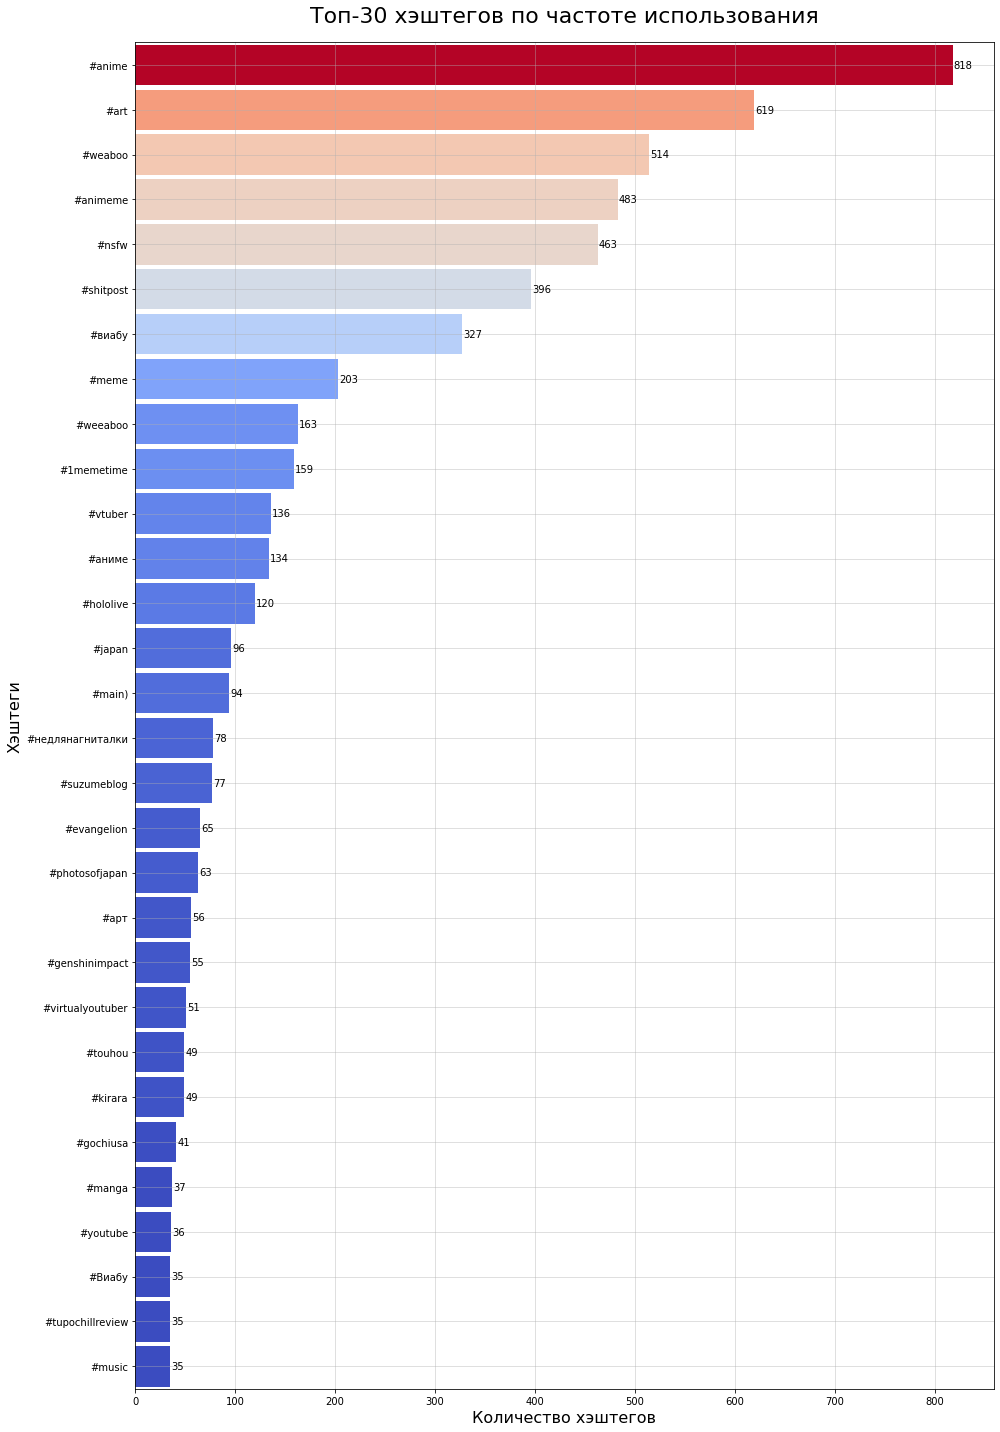

In [54]:
plt.rcParams["figure.figsize"] = [14, 20]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = hshtgs.value_counts().head(30).index[::-1]
values = hshtgs.value_counts().head(30).values[::-1]

height = 0.9
plt.barh(y=labels, width=values, height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 200, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество хэштегов', fontsize=16)
plt.ylabel('Хэштеги', fontsize=16)
plt.title('Топ-30 хэштегов по частоте использования', fontsize=22, pad=20)
plt.grid(True, alpha=0.5)
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/hashtags.jpg", dpi=300, bbox_inches='tight')

plt.show()

### Дни недели

In [55]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [56]:
df["hour"] = df.index.hour
df["month"] = df.index.month
df["weekday"] = df.index.day_name() #.weekday
df['is_weekend'] = df.weekday.isin(['Saturday',  'Sunday'])*1

In [57]:
df.head()

id  \
date                          
2021-04-02 10:56:55  690121   
2021-04-02 21:58:03  691434   
2021-04-02 20:32:43  691350   
2021-04-02 19:27:04  688125   
2021-04-02 18:50:34  691229   

                                                                   url  \
date                                                                     
2021-04-02 10:56:55  https://dtf.ru/s/weaboo/690121-itogi-mesyaca-mart   
2021-04-02 21:58:03                     https://dtf.ru/s/weaboo/691434   
2021-04-02 20:32:43                     https://dtf.ru/s/weaboo/691350   
2021-04-02 19:27:04  https://dtf.ru/s/weaboo/688125-evangelion-podb...   
2021-04-02 18:50:34  https://dtf.ru/u/195405-oleg-mattewho/691229-p...   

                                                                author  \
date                                                                     
2021-04-02 10:56:55  {'id': 130392, 'url': 'https://dtf.ru/u/130392...   
2021-04-02 21:58:03  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...   
2021-04-02 20:32:43  {'id': 120739, 'url': 'https://dtf.ru/u/120739...   
2021-04-02 19:27:04  {'id': 165653, 'url': 'https://dtf.ru/u/165653...   
2021-04-02 18:50:34  {'id': 195405, 'url': 'https://dtf.ru/u/195405...   

                     comments_count  favorites_count  hits_count  is_repost  \
date                                                                          
2021-04-02 10:56:55              59               13         599      False   
2021-04-02 21:58:03               4                1          70      False   
2021-04-02 20:32:43               4                4          85      False   
2021-04-02 19:27:04               5                9          88      False   
2021-04-02 18:50:34               6               11         177       True   

                     likes        subsite                          title  ...  \
date                                                                      ...   
2021-04-02 10:56:55     62          Виабу             Итоги месяца. Март  ...   
2021-04-02 21:58:03      9          Виабу                            NaN  ...   
2021-04-02 20:32:43     17          Виабу                            NaN  ...   
2021-04-02 19:27:04     23          Виабу     Евангелион: подборка артов  ...   
2021-04-02 18:50:34     37  Oleg Mattewho  Пятница в честь Курису Макисе  ...   

                     images videos links audio total_mediacontent  \
date                                                                
2021-04-02 10:56:55       8      0     8     0                 16   
2021-04-02 21:58:03       1      0     0     0                  1   
2021-04-02 20:32:43       3      0     0     0                  3   
2021-04-02 19:27:04      16      0     0     0                 16   
2021-04-02 18:50:34      14      0     0     0                 14   

                                                              hashtags  hour  \
date                                                                           
2021-04-02 10:56:55  [#), #weeabo, #anime, #weeaboomonthlytop, #виа...    10   
2021-04-02 21:58:03                                    [#meme, #виабу]    21   
2021-04-02 20:32:43                                                 []    20   
2021-04-02 19:27:04                         [#подборка, #anime, #nsfw]    19   
2021-04-02 18:50:34                  [#mattewhoart, #sfw, #steinsgate]    18   

                    month  weekday  is_weekend  
date                                            
2021-04-02 10:56:55     4   Friday           0  
2021-04-02 21:58:03     4   Friday           0  
2021-04-02 20:32:43     4   Friday           0  
2021-04-02 19:27:04     4   Friday           0  
2021-04-02 18:50:34     4   Friday           0  

[5 rows x 30 columns]

In [58]:
df.sort_index(inplace=True)

In [59]:
df.head(15)

id  \
date                          
2018-03-12 21:59:15   17110   
2020-01-26 20:38:21   97215   
2020-02-18 19:11:46  104163   
2020-02-29 18:25:10  108055   
2020-03-16 10:36:03  113363   
2020-06-22 12:06:01  155471   
2020-07-13 12:44:35  169901   
2020-07-14 20:10:03  170920   
2020-07-14 20:49:12  170948   
2020-07-14 20:57:17  170958   
2020-07-14 21:34:11  170996   
2020-07-14 21:43:51  171001   
2020-07-14 22:08:34  171026   
2020-07-14 22:25:43  171041   
2020-07-14 22:52:30  171065   

                                                                   url  \
date                                                                     
2018-03-12 21:59:15   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
2020-01-26 20:38:21  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2020-02-18 19:11:46  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
2020-02-29 18:25:10  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
2020-03-16 10:36:03  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   
2020-06-22 12:06:01  https://dtf.ru/anime/155471-obeshchannyy-never...   
2020-07-13 12:44:35  https://dtf.ru/u/92674-ayan-myrzagali/169901-m...   
2020-07-14 20:10:03  https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...   
2020-07-14 20:49:12                     https://dtf.ru/s/weaboo/170948   
2020-07-14 20:57:17                     https://dtf.ru/s/weaboo/170958   
2020-07-14 21:34:11              https://dtf.ru/s/weaboo/170996-milota   
2020-07-14 21:43:51              https://dtf.ru/s/weaboo/171001-satdog   
2020-07-14 22:08:34                     https://dtf.ru/s/weaboo/171026   
2020-07-14 22:25:43  https://dtf.ru/s/weaboo/171041-kisyaglyavya-ob...   
2020-07-14 22:52:30                     https://dtf.ru/s/weaboo/171065   

                                                                author  \
date                                                                     
2018-03-12 21:59:15  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...   
2020-01-26 20:38:21  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...   
2020-02-18 19:11:46  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...   
2020-02-29 18:25:10  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...   
2020-03-16 10:36:03  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...   
2020-06-22 12:06:01  {'id': 166371, 'url': 'https://dtf.ru/u/166371...   
2020-07-13 12:44:35  {'id': 92674, 'url': 'https://dtf.ru/u/92674-a...   
2020-07-14 20:10:03  {'id': 212847, 'url': 'https://dtf.ru/u/212847...   
2020-07-14 20:49:12  {'id': 92674, 'url': 'https://dtf.ru/u/92674-a...   
2020-07-14 20:57:17  {'id': 197370, 'url': 'https://dtf.ru/u/197370...   
2020-07-14 21:34:11  {'id': 162369, 'url': 'https://dtf.ru/u/162369...   
2020-07-14 21:43:51  {'id': 127404, 'url': 'https://dtf.ru/u/127404...   
2020-07-14 22:08:34  {'id': 69160, 'url': 'https://dtf.ru/u/69160-s...   
2020-07-14 22:25:43  {'id': 127404, 'url': 'https://dtf.ru/u/127404...   
2020-07-14 22:52:30  {'id': 212847, 'url': 'https://dtf.ru/u/212847...   

                     comments_count  favorites_count  hits_count  is_repost  \
date                                                                          
2018-03-12 21:59:15              19               32        1969       True   
2020-01-26 20:38:21              11               47         659       True   
2020-02-18 19:11:46              39               23         744       True   
2020-02-29 18:25:10               7               18         236       True   
2020-03-16 10:36:03               5                8         180       True   
2020-06-22 12:06:01              45               33        3952       True   
2020-07-13 12:44:35               5                6         155       True   
2020-07-14 20:10:03              42                4        1400      False   
2020-07-14 20:49:12               6                1         160      False   
2020-07-14 20:57:17               8                1         117      False   
2020-07-14 21:34:11            

In [60]:
subset_posts = df.resample('D').apply({'id':'count'})

In [61]:
subset_posts = subset_posts[subset_posts.index > '2020-07-14']

In [62]:
subset_posts.head()

id
date          
2020-07-15  55
2020-07-16  46
2020-07-17  39
2020-07-18  28
2020-07-19  44

In [63]:
sns.set_theme()

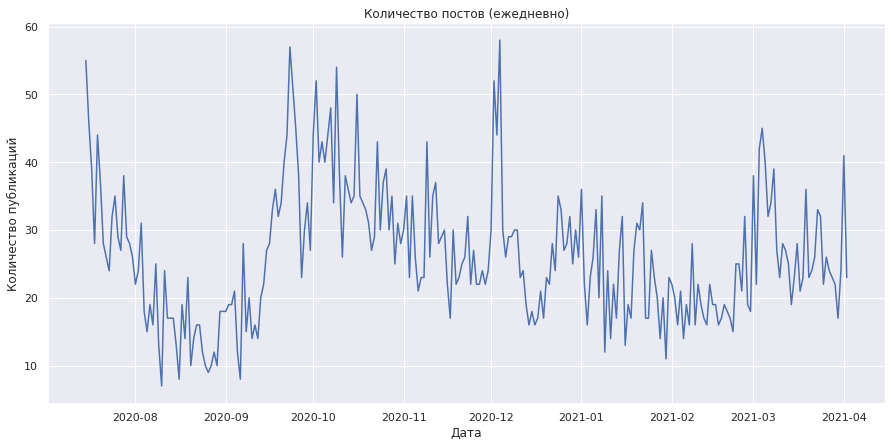

In [64]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=subset_posts, x=subset_posts.index, y=subset_posts.id)
plt.title('Количество постов (ежедневно)')
plt.ylabel('Количество публикаций')
plt.xlabel('Дата')
plt.grid(True)
# plt.savefig(PATH + "Full_analysis/posts_by_day_din.jpg", dpi=300, bbox_inches='tight')

In [65]:
subset_com = df.resample('D').apply({'comments_count':'sum'})
subset_com = subset_com[subset_com.index > '2020-07-14']

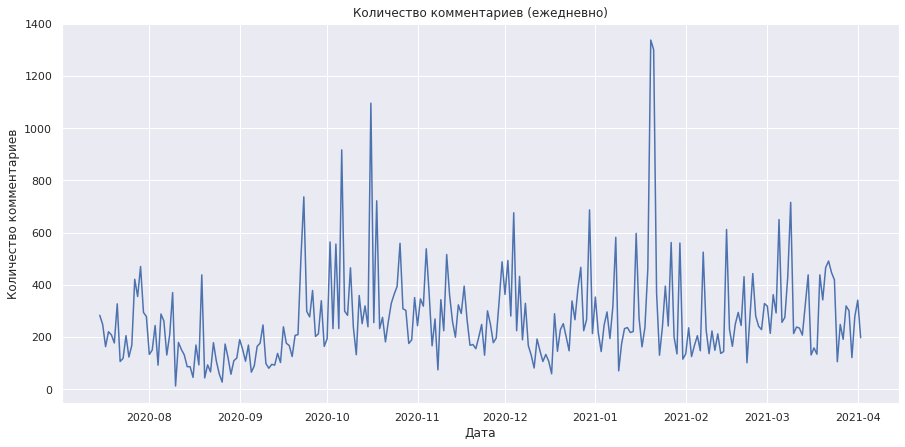

In [66]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=subset_com, x=subset_com.index, y=subset_com.comments_count)
plt.title('Количество комментариев (ежедневно)')
plt.ylabel('Количество комментариев')
plt.xlabel('Дата')
plt.grid(True)
# plt.savefig(PATH + "Full_analysis/comments_by_day_din.jpg", dpi=300, bbox_inches='tight')

https://stackoverflow.com/questions/42473304/how-do-i-group-rows-by-month-in-a-pandas-dataframe

In [67]:
df['period'] = df.index.to_period('M')

<AxesSubplot:xlabel='period', ylabel='hits_count'>

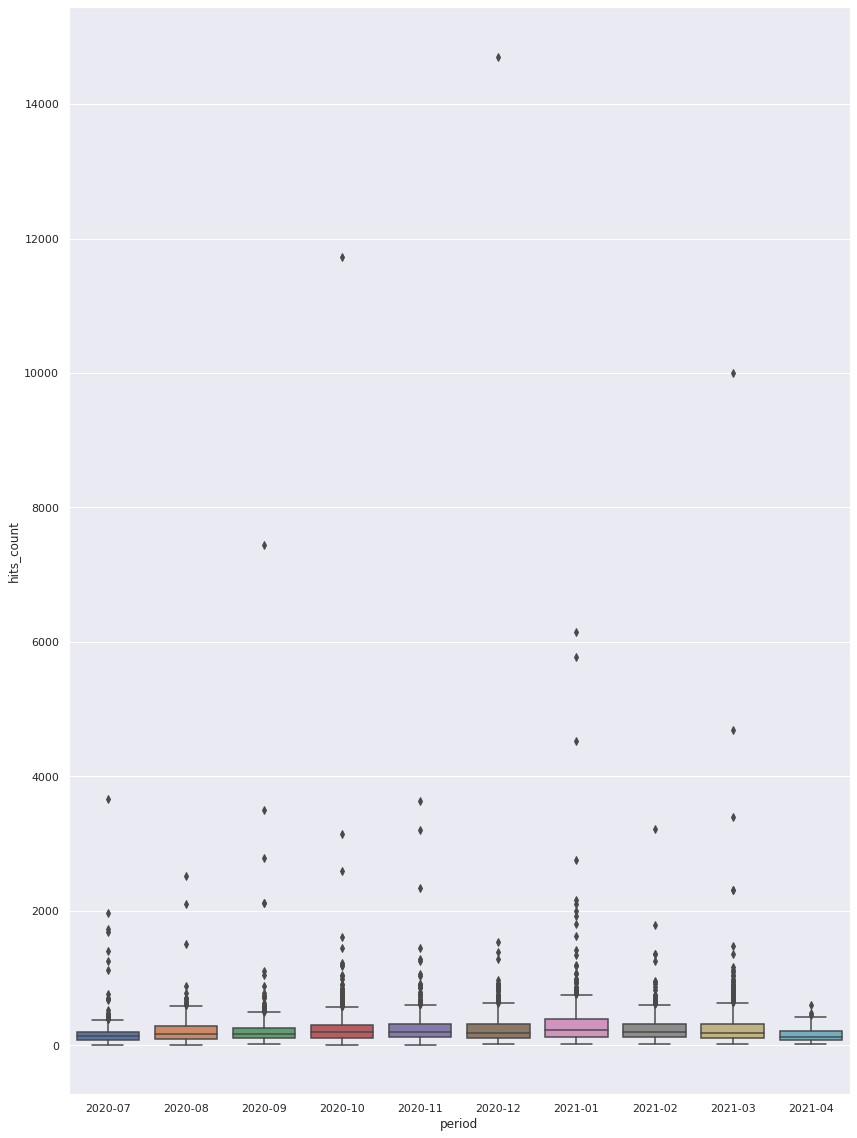

In [68]:
sns.boxplot(data=df[df.is_repost == False], x = 'period', y='hits_count')

### Немного поиграем с временными рядами

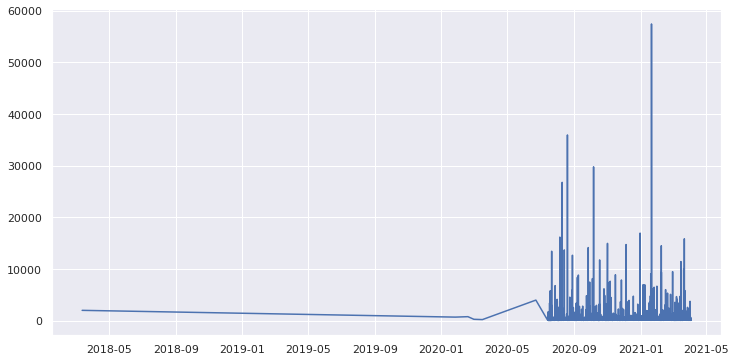

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(df.hits_count)
plt.grid(True)
plt.show()

In [70]:
df.groupby(['weekday'])['id'].count().values

array([1124,  993,  867,  877, 1025,  944, 1070])

In [71]:
df.weekday.value_counts().values

array([1124, 1070, 1025,  993,  944,  877,  867])

In [72]:
df.weekday.value_counts().sort_index()

Friday       1124
Monday        993
Saturday      867
Sunday        877
Thursday     1025
Tuesday       944
Wednesday    1070
Name: weekday, dtype: int64

In [73]:
df.groupby(['weekday']).count()

id   url  author  comments_count  favorites_count  hits_count  \
weekday                                                                      
Friday     1124  1124    1124            1124             1124        1124   
Monday      993   993     993             993              993         993   
Saturday    867   867     867             867              867         867   
Sunday      877   877     877             877              877         877   
Thursday   1025  1025    1025            1025             1025        1025   
Tuesday     944   944     944             944              944         944   
Wednesday  1070  1070    1070            1070             1070        1070   

           is_repost  likes  subsite  title  ...  images  videos  links  \
weekday                                      ...                          
Friday          1124   1124     1124    596  ...    1124    1124   1124   
Monday           993    993      993    523  ...     993     993    993   
Saturday         867    867      867    424  ...     867     867    867   
Sunday           877    877      877    417  ...     877     877    877   
Thursday        1025   1025     1025    522  ...    1025    1025   1025   
Tuesday          944    944      944    506  ...     944     944    944   
Wednesday       1070   1070     1070    528  ...    1070    1070   1070   

           audio  total_mediacontent  hashtags  hour  month  is_weekend  \
weekday                                                                   
Friday      1124                1124      1124  1124   1124        1124   
Monday       993                 993       993   993    993         993   
Saturday     867                 867       867   867    867         867   
Sunday       877                 877       877   877    877         877   
Thursday    1025                1025      1025  1025   1025        1025   
Tuesday      944                 944       944   944    944         944   
Wednesday   1070                1070      1070  1070   1070        1070   

           period  
weekday            
Friday       1124  
Monday        993  
Saturday      867  
Sunday        877  
Thursday     1025  
Tuesday       944  
Wednesday    1070  

[7 rows x 30 columns]

In [74]:
# sns.barplot(x=df.weekday.value_counts().index, y=df.groupby(['weekday'])['id'].count().values)

https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib

In [75]:
df.groupby("weekday")["id"].count().mean()

985.7142857142857

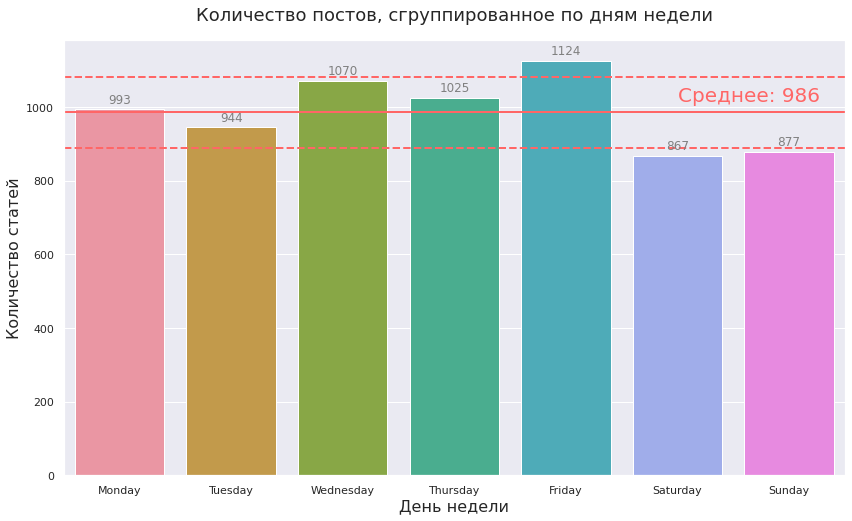

In [76]:
from pandas.api.types import CategoricalDtype

plt.figure(figsize=(14, 8))

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekday'] = df['weekday'].astype(cat_type)

sns.set_palette('hls')

ax = sns.barplot(data=df, x=df.groupby("weekday")["id"].count().sort_index().index, 
            y=df.groupby("weekday")["id"].count().sort_index().values)



for p in ax.patches:
    ax.annotate("%.1d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')  

plt.axhline(df.groupby("weekday")["id"].count().mean(), color='#ff6666', linestyle='-', linewidth=2)    
plt.text(5.0, df.groupby("weekday")["id"].count().mean()*1.03, 
         'Среднее: {:.0f}'.format(df.groupby("weekday")["id"].count().mean()), color='#ff6666', fontsize=20)
plt.axhline(df.groupby("weekday")["id"].count().mean() + df.groupby("weekday")["id"].count().std(), 
            color='#ff6666', linestyle='--', linewidth=2)
plt.axhline(df.groupby("weekday")["id"].count().mean() - df.groupby("weekday")["id"].count().std(), 
            color='#ff6666', linestyle='--', linewidth=2)
        
ax.set_title('Количество постов, сгруппированное по дням недели', fontsize=18, pad=20)
ax.set_xlabel('День недели', fontsize='16')
ax.set_ylabel('Количество статей', fontsize='16');

# plt.savefig(PATH + "Full_analysis/posts_by_day_sum.jpg", dpi=300, bbox_inches='tight')

### Возвращаемся к EDA

In [77]:
df.reset_index(inplace=True)
df.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  comments_count  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...              19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...               7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...               5   

   favorites_count  hits_count  is_repost  likes            subsite  ...  \
0               32        1969       True     36              Офтоп  ...   
1               47         659       True     56    Алексей Фёдоров  ...   
2               23         744       True     49    Алексей Фёдоров  ...   
3               18         236       True     41    Алексей Фёдоров  ...   
4                8         180       True     15  Олег Кубанеишвили  ...   

  videos  links audio total_mediacontent               hashtags hour month  \
0      3      0     0                 45                [#long]   21     3   
1      0      0     0                 17               [#anime]   20     1   
2      0      0     0                 32  [#anime, #evangelion]   19     2   
3      0      1     0                 20               [#anime]   18     2   
4      0      0     0                 17                     []   10     3   

    weekday is_weekend   period  
0    Monday          0  2018-03  
1    Sunday          1  2020-01  
2   Tuesday          0  2020-02  
3  Saturday          1  2020-02  
4    Monday          0  2020-03  

[5 rows x 32 columns]

In [78]:
df.shape

(6900, 32)

In [79]:
df[df.author_type == 3]

date      id  \
6255 2021-03-08 21:37:07  665947   

                                                    url  \
6255  https://dtf.ru/anime/665947-mangaki-scenaristk...   

                                                 author  comments_count  \
6255  {'id': 256351, 'url': 'https://dtf.ru/crunchyr...              90   

      favorites_count  hits_count  is_repost  likes subsite  ... videos  \
6255              221        4109       True    207   Аниме  ...      0   

      links audio total_mediacontent                                hashtags  \
6255      0     0                 21  [#лонгрид, #аниме, #манга, #индустрия]   

     hour month  weekday is_weekend   period  
6255   21     3   Monday          0  2021-03  

[1 rows x 32 columns]

In [80]:
df.loc[df[(df.author_type == 3)].index, 'author_type'] = 2

In [81]:
df.groupby(['is_repost']).agg({'id': "count"})

id
is_repost      
False      6099
True        801

In [82]:
df.groupby(['is_repost']).agg({'id': "count"})['id']

is_repost
False    6099
True      801
Name: id, dtype: int64

In [83]:
tmp = df.groupby(['is_repost', 'author_type'], as_index=False).agg({'id': "count"})
tmp

is_repost  author_type    id
0      False            1  6005
1      False            2    94
2       True            1   793
3       True            2     8

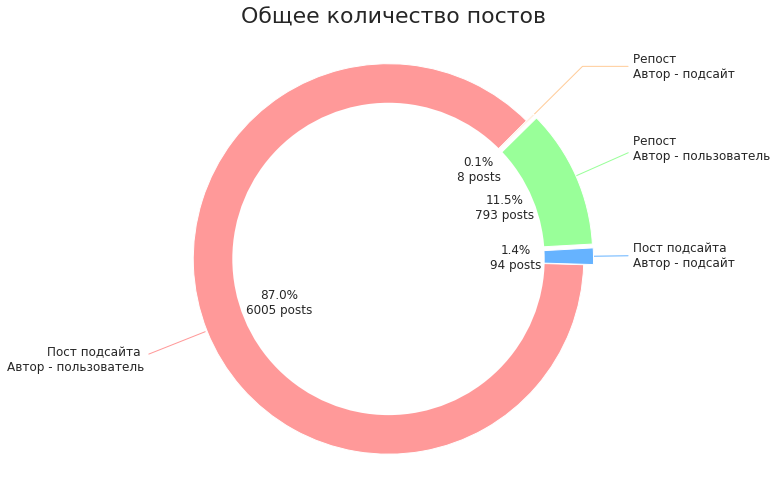

In [84]:
from matplotlib import gridspec

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} posts".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp['id'],
    shadow=False,
    colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['id']), 
    explode=(0, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
                             "color":colors[i]
#                              "color":'b'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.8, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество постов', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "Full_analysis/posts.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [85]:
# sns.set_theme()
# sns.set_palette("husl")

# labels = 'Статья подсайта', 'Репост'
# sizes = df.groupby(['isRepost']).agg({'id': "count"})['id'].values
# explode = (0, 0.1)  

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)

# ax1.axis('equal')  
# plt.show()

In [86]:
sns.set_theme()

In [87]:
tmp = df.groupby(['is_repost', 'author_type'], as_index=False).agg({'comments_count': "sum"})
tmp

is_repost  author_type  comments_count
0      False            1           45982
1      False            2            1075
2       True            1           23256
3       True            2             447

In [88]:
tmp.comments_count.sum()

70760

In [89]:
sns.set_palette("tab10")

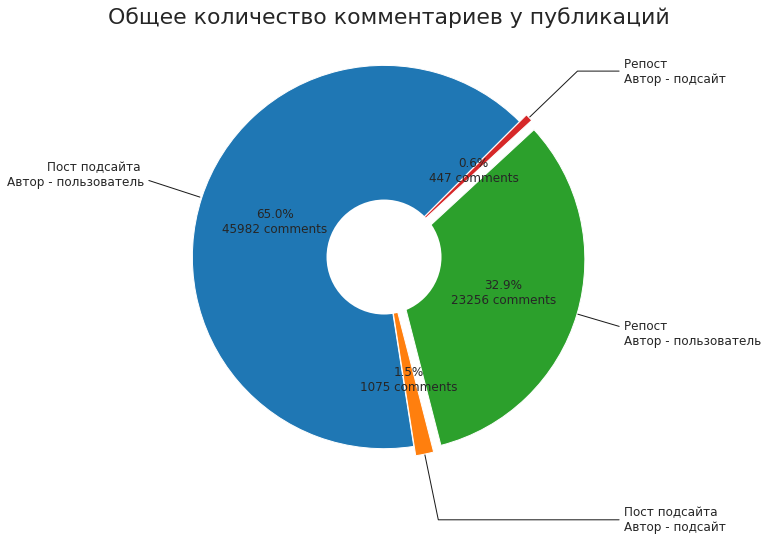

In [90]:
from matplotlib import gridspec

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} comments".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp['comments_count'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['comments_count']), 
    explode=(0, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.3, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество комментариев у публикаций', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "Full_analysis/comments.jpg", dpi=300, bbox_inches='tight')

plt.show()

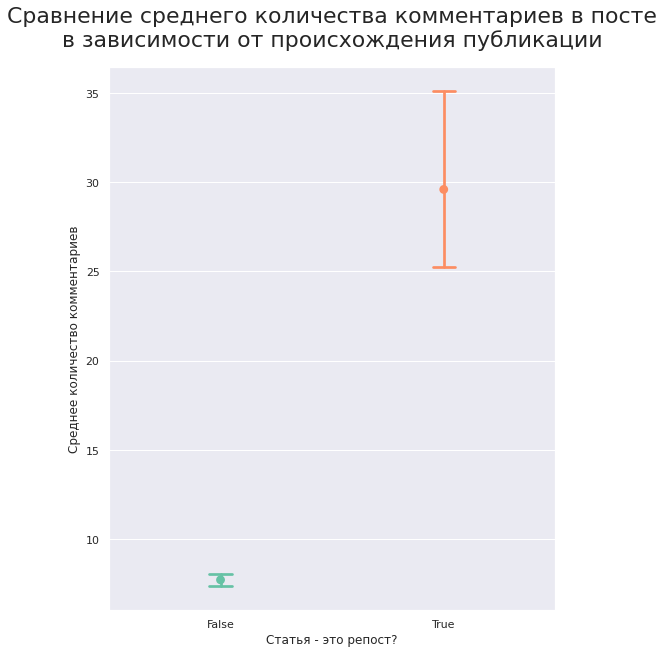

In [91]:
plt.rcParams["figure.figsize"] = [8, 10]
ax = sns.pointplot(x="is_repost", y="comments_count", 
                   data=df, join=False, capsize=.1, palette="Set2")

plt.title('Сравнение среднего количества комментариев в посте\nв зависимости от происхождения публикации', fontsize=22, pad=20)
plt.ylabel('Среднее количество комментариев')
plt.xlabel('Статья - это репост?')

plt.savefig(PATH + "Full_analysis/comments_compare.jpg", dpi=300, bbox_inches='tight')

In [92]:
df.groupby(['is_repost']).agg({'comments_count': ['mean', 'std']})

comments_count           
                    mean        std
is_repost                          
False           7.715527  12.962806
True           29.591760  67.516586

In [93]:
tmp = df.groupby(['is_repost'], as_index=False).agg({'hits_count': "sum"})
tmp

is_repost  hits_count
0      False     1527258
1       True      953700

In [94]:
tmp.hits_count.sum()

2480958

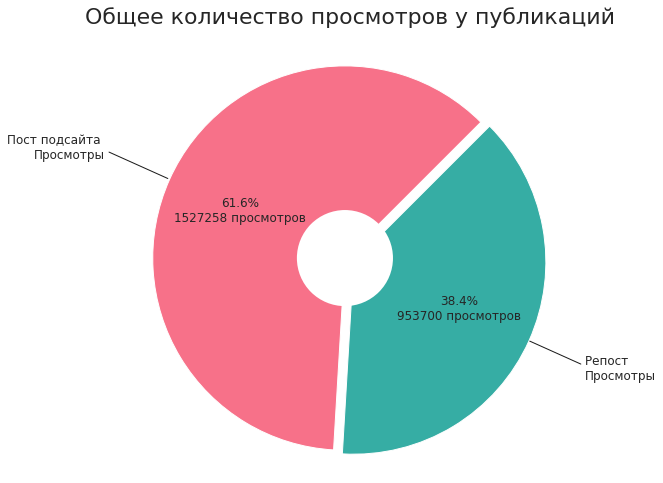

In [95]:
sns.set_palette("husl", 2)

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} просмотров".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nПросмотры',  
          'Репост \nПросмотры', ]

# Create a pie chart
wedges = pie_ax.pie(
    tmp['hits_count'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['hits_count']), 
    explode=(0, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.25, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество просмотров у публикаций', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "Full_analysis/hits.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [96]:
# sns.boxplot(x="is_repost", y="hits_count", data=df)

In [97]:
df.columns

Index(['date', 'id', 'url', 'author', 'comments_count', 'favorites_count',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags',
       'hour', 'month', 'weekday', 'is_weekend', 'period'],
      dtype='object')

Text(0.5, 0, 'Статья - это репост?')

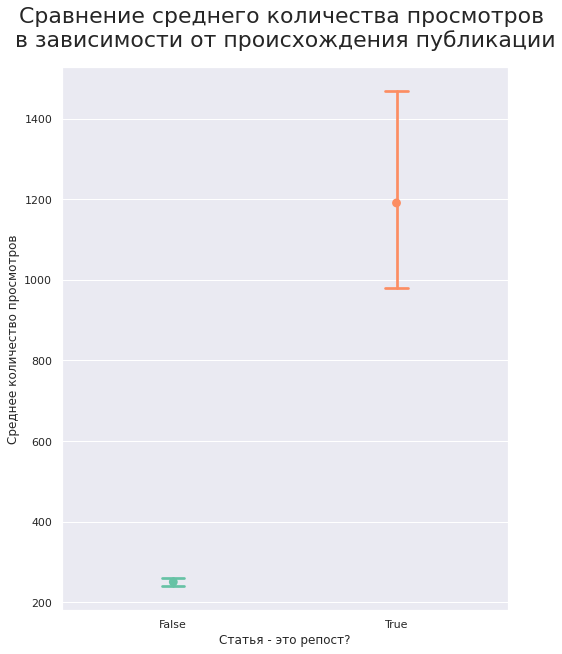

In [98]:
plt.rcParams["figure.figsize"] = [8, 10]
ax = sns.pointplot(x="is_repost", y="hits_count", 
                   data=df, join=False, capsize=.1, palette="Set2")

plt.title('Сравнение среднего количества просмотров \nв зависимости от происхождения публикации', fontsize=22, pad=20)
plt.ylabel('Среднее количество просмотров')
plt.xlabel('Статья - это репост?')

# plt.savefig(PATH + "Full_analysis/hits_compare.jpg", dpi=300, bbox_inches='tight')

In [99]:
df.groupby(['is_repost']).agg({'hits_count': ['mean', 'std']})

hits_count             
                  mean          std
is_repost                          
False       250.411215   391.107942
True       1190.636704  3480.104468

In [100]:
plt.rcParams["figure.figsize"] = [14, 10]

In [101]:
tmp = df.groupby(['is_repost'], as_index=False).agg({'favorites_count': "sum"})
tmp

is_repost  favorites_count
0      False            45992
1       True            21775

In [102]:
tmp.favorites_count.sum()

67767

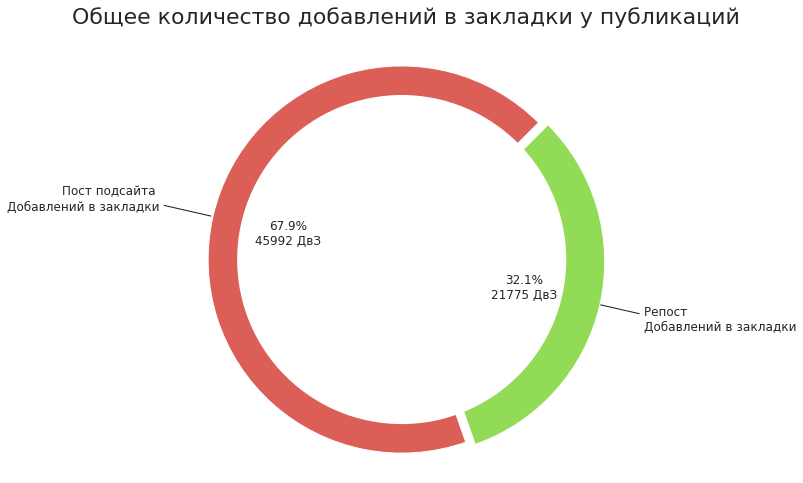

In [103]:
sns.set_palette("hls", 4)

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} ДвЗ".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nДобавлений в закладки',  
          'Репост \nДобавлений в закладки', ]

# Create a pie chart
wedges = pie_ax.pie(
    tmp['favorites_count'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['favorites_count']), 
    explode=(0, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.85, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество добавлений в закладки у публикаций', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "Full_analysis/favs.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [104]:
df.groupby(['is_repost']).agg({'favorites_count': ['mean', 'std']})

favorites_count           
                     mean        std
is_repost                           
False            7.540908  10.580235
True            27.184769  68.412797

Text(0.5, 0, 'Статья - это репост?')

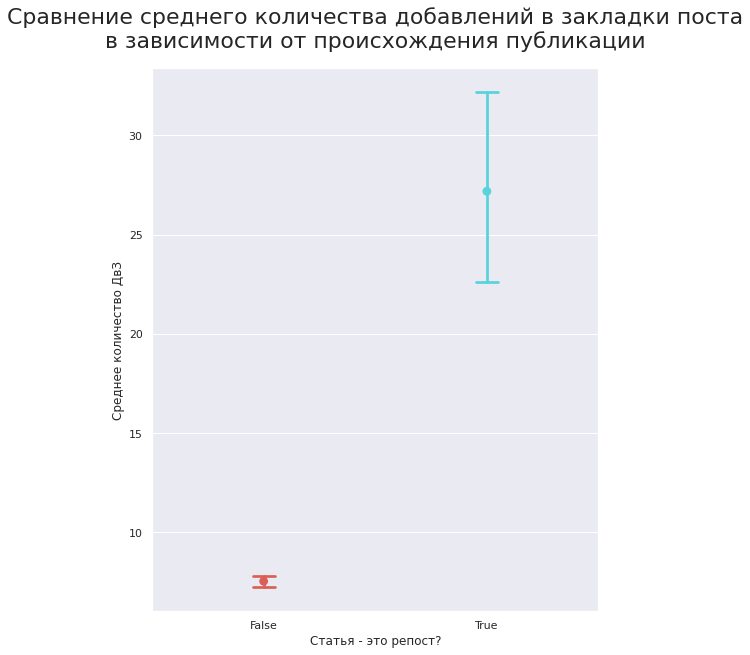

In [105]:
plt.rcParams["figure.figsize"] = [8, 10]
ax = sns.pointplot(x="is_repost", y="favorites_count", 
                   data=df, join=False, capsize=.1, palette="hls")

plt.title('Сравнение среднего количества добавлений в закладки поста\nв зависимости от происхождения публикации', fontsize=22, pad=20)
plt.ylabel('Среднее количество ДвЗ')
plt.xlabel('Статья - это репост?')

# plt.savefig(PATH + "Full_analysis/favs_compare.jpg", dpi=300, bbox_inches='tight')

In [106]:
tmp = df.groupby(['is_repost', 'author_type'], as_index=False).agg({'likes': "sum"})
tmp

is_repost  author_type   likes
0      False            1  167046
1      False            2    2001
2       True            1   39732
3       True            2     708

In [107]:
tmp.likes.sum()

209487

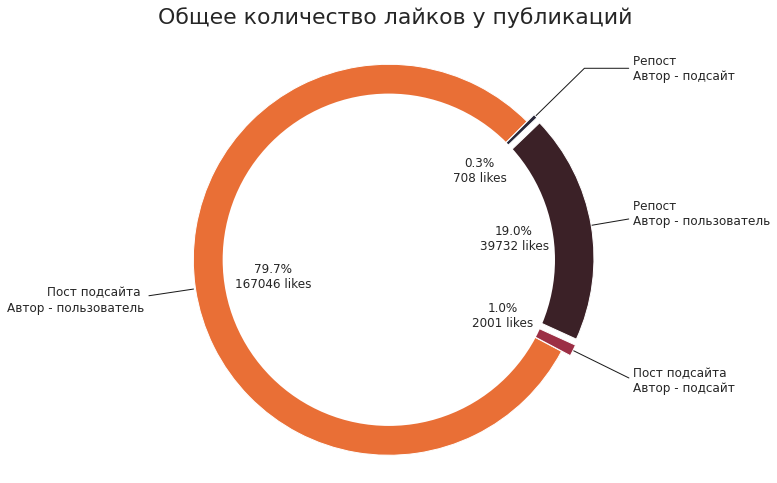

In [108]:
sns.set_palette("icefire_r")

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} likes".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp['likes'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['likes']), 
    explode=(0, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.85, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество лайков у публикаций', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "Full_analysis/likes.jpg", dpi=300, bbox_inches='tight')

plt.show()

Text(0.5, 0, 'Статья - это репост?')

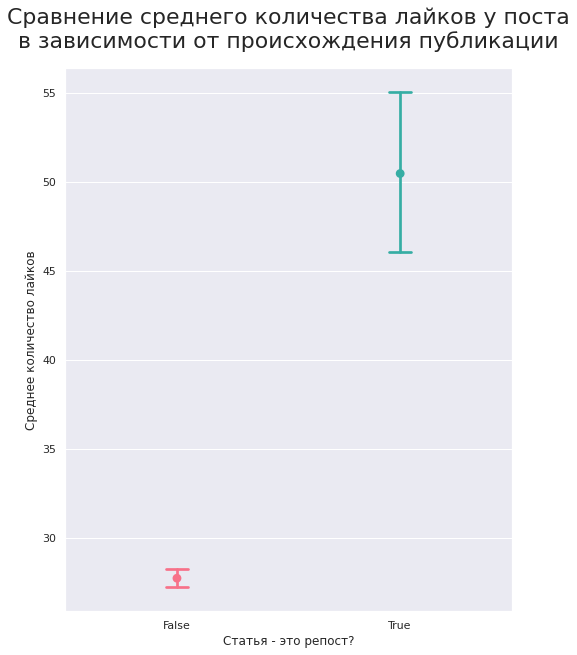

In [109]:
plt.rcParams["figure.figsize"] = [8, 10]
ax = sns.pointplot(x="is_repost", y="likes", 
                   data=df, join=False, capsize=.1, palette="husl")

plt.title('Сравнение среднего количества лайков у поста\nв зависимости от происхождения публикации', fontsize=22, pad=20)
plt.ylabel('Среднее количество лайков')
plt.xlabel('Статья - это репост?')

# plt.savefig(PATH + "Full_analysis/likes_compare.jpg", dpi=300, bbox_inches='tight')

In [110]:
df.groupby(['is_repost']).agg({'likes': ['mean', 'std']})

likes           
                mean        std
is_repost                      
False      27.717167  19.095611
True       50.486891  64.076654

In [111]:
tmp_symbols = df.groupby(['is_repost', 'author_type'], as_index=False).agg({'symbols': "sum"})
tmp_symbols

is_repost  author_type  symbols
0      False            1   983176
1      False            2    27389
2       True            1  1707723
3       True            2    28312

In [112]:
tmp_symbols.symbols.sum()

2746600

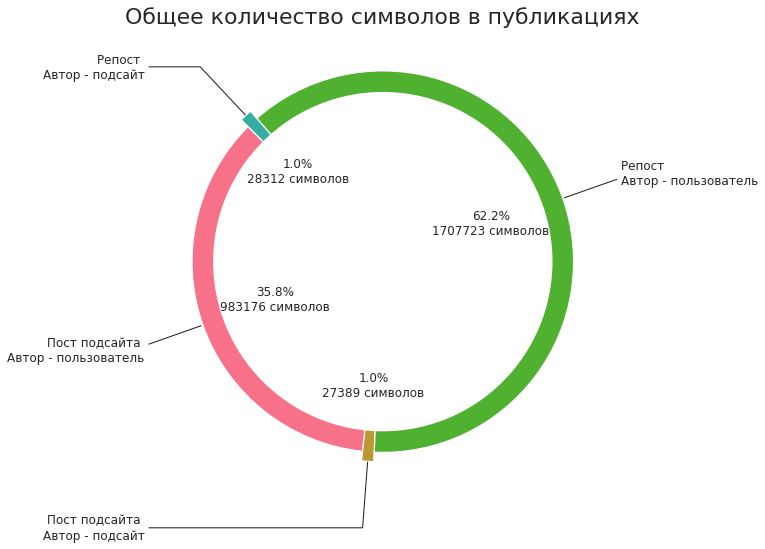

In [113]:
sns.set_palette("husl")

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} символов".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp_symbols['symbols'],
    shadow=False,
#     colors=colors, 
    startangle=135, #frame=True, 
    autopct=lambda pct: func(pct, tmp_symbols['symbols']), 
    explode=(0, 0.05, 0, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.89, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество символов в публикациях', fontsize=22, pad=26)

plt.axis('equal')

# plt.savefig(PATH + "Full_analysis/symbols.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [114]:
df.groupby(['is_repost']).agg({'symbols': ['mean', 'std']})

symbols             
                  mean          std
is_repost                          
False       165.693556  1462.214321
True       2167.334582  7587.569826

Text(0.5, 0, 'Статья - это репост?')

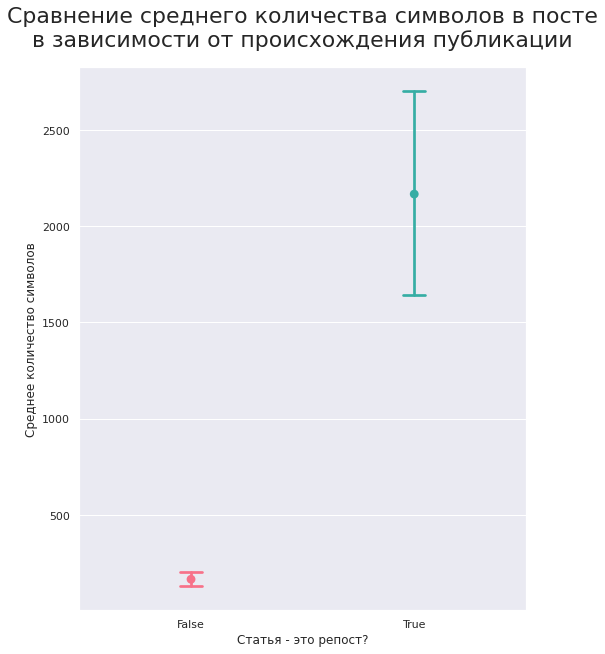

In [115]:
plt.rcParams["figure.figsize"] = [8, 10]
ax = sns.pointplot(x="is_repost", y="symbols", 
                   data=df, join=False, capsize=.1, palette="husl")

plt.title('Сравнение среднего количества символов в посте\nв зависимости от происхождения публикации', fontsize=22, pad=20)
plt.ylabel('Среднее количество символов')
plt.xlabel('Статья - это репост?')

# plt.savefig(PATH + "Full_analysis/symbols_compare.jpg", dpi=300, bbox_inches='tight')

In [116]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# total = sum(tmp_symbols.symbols)
# proportions = [(float(value) / total) for value in tmp_symbols.symbols]

In [117]:
# width = 40
# height=10
# total= width * height
# tiles_per_category = [round(proportion * total) for proportion in proportions]

In [118]:
# waffle = np.zeros((height, width))
# category_index = 0
# tile_index = 0

# for col in range(width):
#     for row in range(height):
#         tile_index += 1
#         if tile_index > sum(tiles_per_category[0:category_index]):
#             category_index += 1
#         waffle[row, col] = category_index

# # fig = plt.figure()
# # colormap = plt.cm.coolwarm
# # plt.matshow(waffle, cmap=colormap)
# # plt.colorbar()

# fig = plt.figure()
# colormap = plt.cm.coolwarm
# plt.matshow(waffle, cmap=colormap)
# ax = plt.gca()
# ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
# ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
# ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
# plt.xticks([])
# plt.yticks([])
# plt.colorbar()

https://github.com/laserson/squarify#Documentation-for-Squarify

https://pypi.org/project/pywaffle/

https://pypi.org/project/squarify/#history

https://plotly.com/python/treemaps/

https://towardsdatascience.com/treemap-basics-with-python-777e5ed173d0

https://towardsdatascience.com/creating-compelling-pie-chart-alternatives-3a1c2c2889b8

https://stackoverflow.com/questions/3282935/treemap-visualization-in-python

https://towardsdatascience.com/waffle-charts-using-pythons-matplotlib-94252689a701

In [119]:
tmp_symbols

is_repost  author_type  symbols
0      False            1   983176
1      False            2    27389
2       True            1  1707723
3       True            2    28312

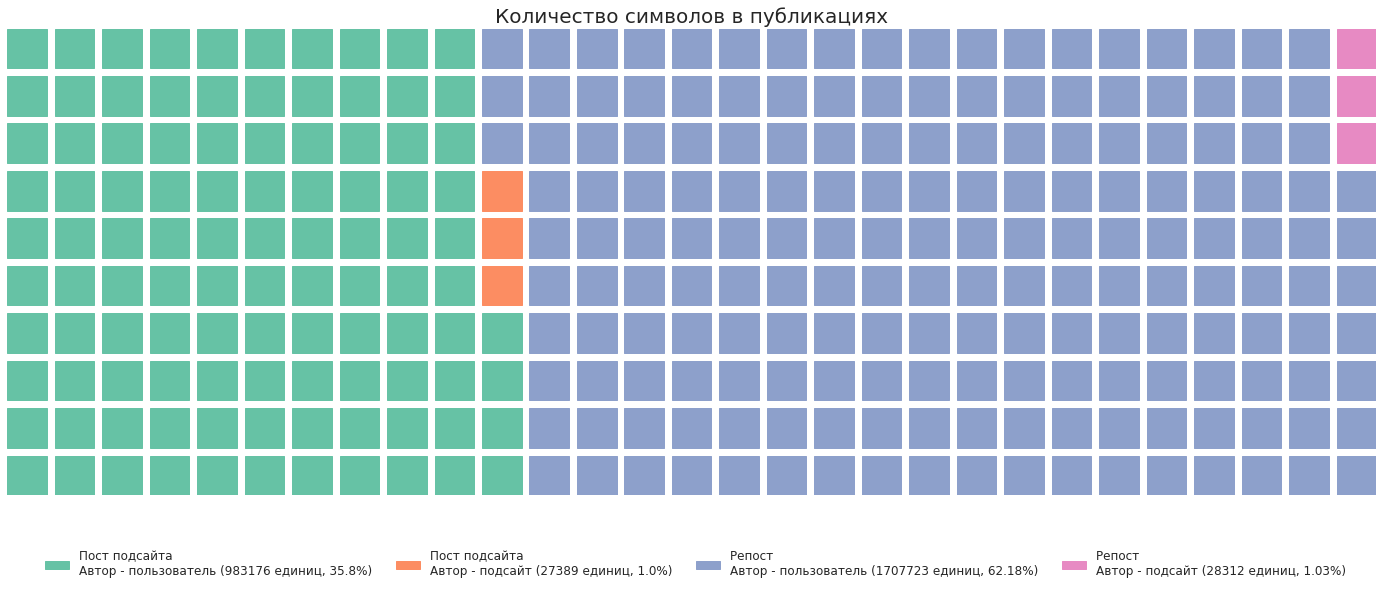

In [120]:
from pywaffle import Waffle

labels=['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']
d = {lab: val for lab, val in zip(labels, tmp_symbols.symbols.values)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(tmp_symbols.symbols/9500),
#     labels=labels,
    title={
        'label': 'Количество символов в публикациях',
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
#     labels=[f"{k} ({int(v / sum(d.values()) * 100)}%)" for k, v in d.items()],
    legend={
        'labels': [f"{k} ({v} единиц, {round(v/sum(d.values())*100,2)}%)" for k, v in d.items()],  # labels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0.02, -0.2),
        'ncol': len(labels),
        'framealpha': 0,
        'fontsize': 12
    },
    figsize=(22, 8),
#     legend={'bbox_to_anchor': (1.3, 0.85)}    
)
# plt.savefig(PATH + "Full_analysis/symbols_waffle.jpg", dpi=300, bbox_inches='tight')

In [121]:
sum(d.values())

2746600

In [122]:
tmp_media = df.groupby(['is_repost', 'author_type'], as_index=False).agg({'total_mediacontent': "sum"})
tmp_media

is_repost  author_type  total_mediacontent
0      False            1               23233
1      False            2                 164
2       True            1               10031
3       True            2                 190

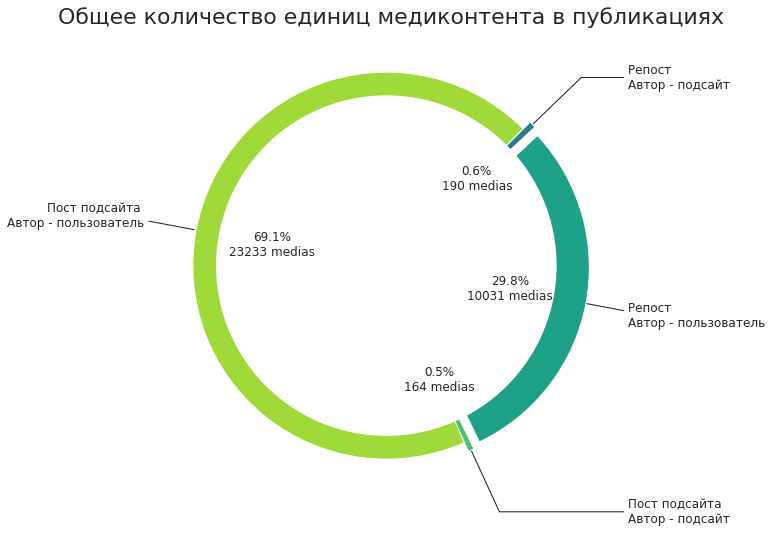

In [123]:
sns.set_palette("viridis_r")

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} medias".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp_media['total_mediacontent'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp_media['total_mediacontent']), 
    explode=(0, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.88, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество единиц медиконтента в публикациях', fontsize=22, pad=26)

plt.axis('equal')

# plt.savefig(PATH + "Full_analysis/medias.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [124]:
df.groupby(['is_repost']).agg({'total_mediacontent': ['mean', 'std']})

total_mediacontent           
                        mean        std
is_repost                              
False               3.836203   8.385976
True               12.760300  21.703916

Text(0.5, 0, 'Статья - это репост?')

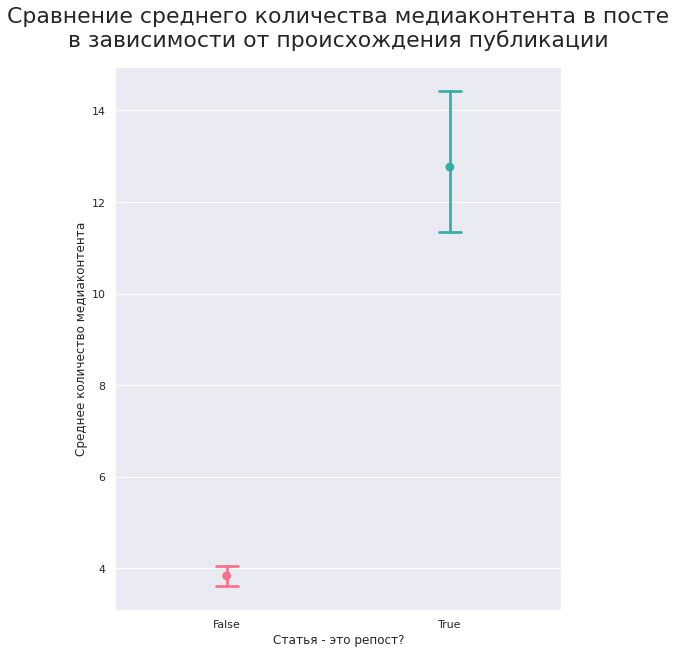

In [125]:
plt.rcParams["figure.figsize"] = [8, 10]
ax = sns.pointplot(x="is_repost", y="total_mediacontent", 
                   data=df, join=False, capsize=.1, palette="husl")

plt.title('Сравнение среднего количества медиаконтента в посте\nв зависимости от происхождения публикации', fontsize=22, pad=20)
plt.ylabel('Среднее количество медиаконтента')
plt.xlabel('Статья - это репост?')

# plt.savefig(PATH + "Full_analysis/medias_compare.jpg", dpi=300, bbox_inches='tight')

In [126]:
tmp_media

is_repost  author_type  total_mediacontent
0      False            1               23233
1      False            2                 164
2       True            1               10031
3       True            2                 190

In [127]:
tmp_media.total_mediacontent.sum()

33618

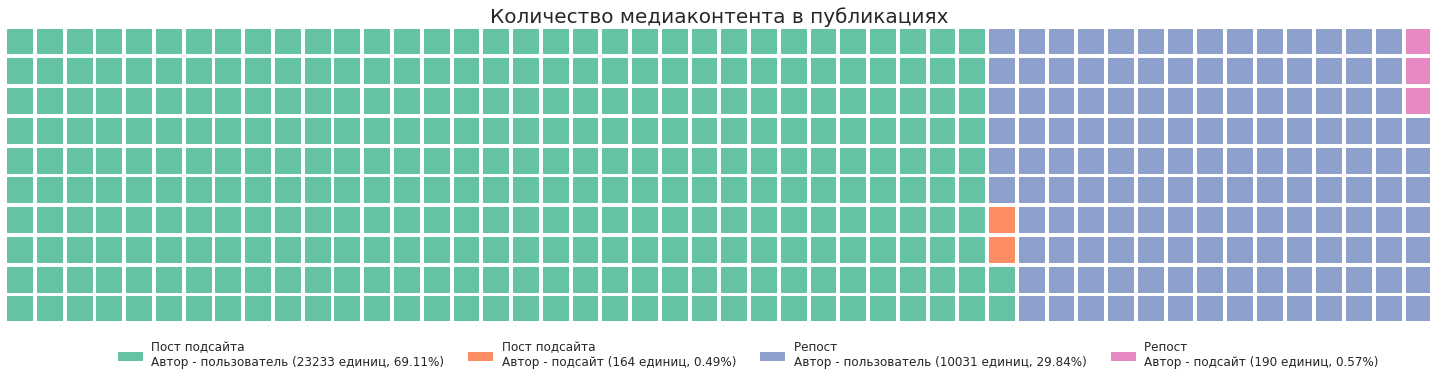

In [128]:
from pywaffle import Waffle

labels=['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']
d = {lab: val for lab, val in zip(labels, tmp_media.total_mediacontent.values)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(tmp_media.total_mediacontent/70.1),
#     labels=labels,
    title={
        'label': 'Количество медиаконтента в публикациях',
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
#     labels=[f"{k} ({int(v / sum(d.values()) * 100)}%)" for k, v in d.items()],
    legend={
        'labels': [f"{k} ({v} единиц, {round(v/sum(d.values())*100,2)}%)" for k, v in d.items()],  # labels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0.07, -0.2),
        'ncol': len(labels),
        'framealpha': 0,
        'fontsize': 12
    },
    figsize=(22, 8),
#     legend={'bbox_to_anchor': (1.3, 0.85)}    
)
# plt.savefig(PATH + "Full_analysis/media_waffle.jpg", dpi=300, bbox_inches='tight')

In [129]:
print(len(df.author_name.unique()))
print(len(df[df.is_repost == False].author_name.unique()))
print(len(df[df.is_repost == True].author_name.unique()))

412
318
188


In [130]:
author_set_post = set(df[df.is_repost == False].author_name.unique())
author_set_repost = set(df[df.is_repost == True].author_name.unique())

#### Venn diagram

https://pypi.org/project/matplotlib-venn/
    
https://stackoverflow.com/questions/55622820/python-venn-diagram-actual-label

https://stackoverflow.com/questions/55717203/plot-actual-set-items-in-python-not-the-number-of-items/55718006#55718006

https://stackoverflow.com/questions/42855256/python-venn-diagram-how-to-show-the-diagram-contents

https://stackoverflow.com/questions/46224235/matplotlib-venn-diagram-with-legend

https://stackoverflow.com/questions/51052573/matplotlib-venn-changing-what-is-displayed-inside-the-venn-diagram

https://stackoverflow.com/questions/19841535/python-matplotlib-venn-diagram

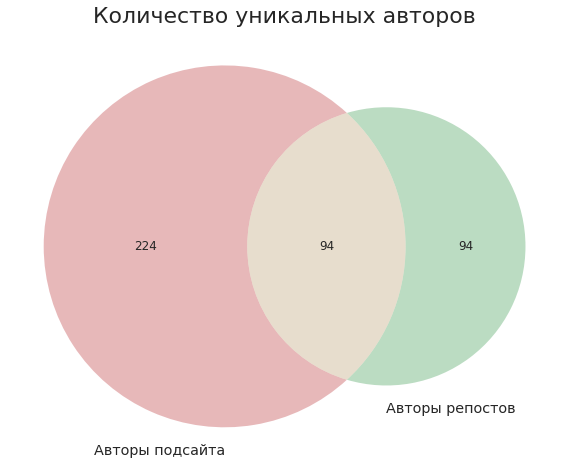

In [131]:
# Plotting Venn diagramm
from matplotlib_venn import venn2
plt.figure(figsize=(14,8))

venn = venn2([author_set_post, author_set_repost], ('Авторы подсайта', 'Авторы репостов'))

# venn.get_label_by_id('100').set_text('\n'.join(map(str, author_set_post-author_set_repost)))
# venn.get_label_by_id('110').set_text('\n'.join(map(str, author_set_post&author_set_repost)))
# venn.get_label_by_id('010').set_text('\n'.join(map(str, author_set_repost-author_set_post)))

plt.title('Количество уникальных авторов', fontsize=22)

# plt.savefig(PATH + "Full_analysis/authors_venn.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [132]:
# feature_cols = ['comments_count', 'favorites_count', 'hits_count', 'likes', 'symbols', 'words', 
#                 'images', 'videos', 'links', 'audio', 'total_mediacontent']

In [133]:
# fig, axs = plt.subplots(ncols = 3,nrows = 1, figsize = (36,8.5))
# for i,j in enumerate(feature_cols[0:3]):
#     df_sum = df.groupby([j],as_index = False).sum()
#     sns.barplot(x = j, y = "likes", ax = axs[i],
#                 data = df_sum,orient = "v", 
#                 order=df_sum.sort_values('likes', ascending = False)[j],
#                 palette = "mako")
# fig.suptitle("likes", fontsize=30)

# fig, axs = plt.subplots(ncols = 8,nrows = 1, figsize = (36,5))
# for i,j in enumerate(feature_cols[3:11]):
#     df_sum = df.groupby([j],as_index = False).sum()
#     sns.barplot(x = j, y = "likes", ax = axs[i],
#                 data = df_sum,orient = "v", 
#                 order=df_sum.sort_values('likes',ascending = False)[j],
#                 palette = "mako")

In [134]:
plt.rcParams["figure.figsize"] = [14, 10]
sns.set_theme()
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [135]:
# sns.scatterplot(x=df.symbols, size=df.likes, hue='is_repost', 
#                 y=sum([df.images, df.videos, df.links]), data=df)

# Разбираемся с построением столбчатых диаграмм

https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib

https://stackoverflow.com/questions/40066089/apply-images-to-pyplot-python-bar-graphs

# СУПЕР_ВАЖНО!

```python
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

labels = ['CW', 'CV', 'GW', 'SX', 'DO']
colors = ['crimson', 'dodgerblue', 'teal', 'limegreen', 'gold']
values = 30 + np.random.randint(5, 20, len(labels)).cumsum()

height = 0.9
plt.barh(y=labels, width=values, height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    # load the image corresponding to label into img
    # with cbook.get_sample_data('ada.png') as image_file:
    #    img = plt.imread(image_file)
    response = requests.get(f'https://www.countryflags.io/{label}/flat/64.png')
    img = plt.imread(BytesIO(response.content))
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()
```

# МЕГА-ВАЖНО!

https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib

https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python

In [136]:
# Первый, неудачный вариант

# import requests
# from PIL import Image
# from io import BytesIO

# labels = tmp.index[:5]
# colors = ['tan', 'peru', 'grey', 'orchid', 'darkred']
# values = tmp.values.flatten()[:5]

# height = 0.9
# plt.barh(y=tmp.index[:5], width=tmp.values.flatten()[:5], height=height, color=colors, align='center')

# for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
       
    
# plt.xlim(0, max(values) * 1.05)
# plt.ylim(-0.5, len(labels) - 0.5)
# plt.tight_layout()
# plt.show()

https://stackoverflow.com/questions/32059397/pandas-groupby-without-turning-grouped-by-column-into-index

### Tests

In [137]:
# tmp_2 = df.groupby(['author_name','author_avatar_url'], as_index=False).count() \
# .sort_values(by="id", ascending=False).head(20).iloc[:, [0,1,3]]
# tmp_2

In [138]:
# import requests
# from PIL import Image
# from io import BytesIO

# labels = tmp_2.author_avatar_url[:5][::-1]
# colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
# values = tmp_2.id[:5][::-1] #.flatten()[:5]

# height = 0.9
# plt.barh(y=tmp_2.author_name[:5][::-1], width=tmp_2.id[:5][::-1], height=height, color=colors, align='center')

# for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)

# plt.style.use('seaborn')    
# plt.xlim(0, max(values) * 1.05)
# plt.ylim(-0.5, len(labels) - 0.5)
# plt.tight_layout()
# plt.show()

In [139]:
# labels = tmp_2.author_avatar_url[:5][::-1]
# colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
# values = tmp_2.id[:5][::-1] #.flatten()[:5]

# height = 0.9
# f = sns.barplot(y=tmp_2.author_name[:5][::-1], x=tmp_2.id[:5][::-1])
# ax = f

# for p in ax.patches:
#     width = p.get_width()    # get bar length
#     ax.text(width + 1,       # set the text at 1 unit right of the bar
#             p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
#             '{:1.0f}'.format(width), # set variable to display, 2 decimals
#             ha = 'left',   # horizontal alignment
#             va = 'center')  # vertical alignment

# # for i, (label, value) in enumerate(zip(labels, values)):
# #     im = Image.open(requests.get(label, stream=True).raw)
# #     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
       
    
# # plt.xlim(0, max(values) * 1.05)
# # plt.ylim(-0.5, len(labels) - 0.5)
# # plt.tight_layout()
# # plt.show()

In [140]:
# import requests
# from PIL import Image
# from io import BytesIO

# labels = tmp_2.author_avatar_url[:5][::-1]
# colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
# values = tmp_2.id[:5][::-1] 

# height = 0.9
# plt.barh(y=tmp_2.author_name[:5][::-1], width=tmp_2.id[:5][::-1], height=height, color=colors, align='center')

# for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
#     plt.text(value + 3, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
# plt.xlim(0, max(values) * 1.05)
# plt.ylim(-0.5, len(labels) - 0.5)
# plt.tight_layout()
# plt.show()

https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn

https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart

### Tests end
# Конец тестовой зоны

# Смотрим на топы по различным признакам

In [141]:
tmp = df.groupby(['author_name'])['author_name'].count().sort_values(ascending=False).head(20)
tmp

author_name
Лолег                    827
Layben                   717
Гусь Хмурый              470
Suzume-sama              358
Diego Paw                324
Фанат Ани Тейлор-Джой    272
Just Chill               250
Pray for Megumin         246
Хасаги                   171
Koda                     129
mindtered                112
Oleg Mattewho             96
Виабу                     92
Анимемания                82
Алексей Кудрявцев         80
Saher                     77
Over9k5000                70
Marshal_New_Arleana       64
Revendi                   56
Shinji Matou              55
Name: author_name, dtype: int64

In [142]:
tmp_posts = df[df.is_repost == False].groupby(['author_name','author_avatar_url'], as_index=False) \
.agg({'id': 'count'}).sort_values(by='id', ascending=False)
tmp_posts_1 = tmp_posts.iloc[0:20]
tmp_posts_2 = tmp_posts.iloc[20:40]

In [143]:
print(tmp_posts.id.sum())
print('-----')
print(tmp_posts.iloc[0:3].id)
print('-----')
print(816 + 711 + 466)
print('-----')
print(tmp_posts.iloc[0:3].id.sum())

6099
-----
271    816
88     711
238    466
Name: id, dtype: int64
-----
1993
-----
1993


In [144]:
tmp_posts.iloc[0:15].id.sum() / tmp_posts.id.sum() * 100

65.15822265945236

In [145]:
tmp_posts.iloc[0:70].id.sum() / tmp_posts.id.sum() * 100

89.04738481718314

In [146]:
tmp_posts

author_name                                  author_avatar_url   id
271           Лолег  https://leonardo.osnova.io/b6f745b6-3963-56d5-...  816
88           Layben  https://leonardo.osnova.io/7fec5e46-2507-5dcd-...  711
238     Гусь Хмурый  https://leonardo.osnova.io/8fd51f8a-d2eb-2130-...  466
38        Diego Paw  https://leonardo.osnova.io/7df667af-003c-502d-...  309
145     Suzume-sama  https://leonardo.osnova.io/efb06bbf-cd2a-5011-...  283
..              ...                                                ...  ...
219    Артём Чуйкин  https://leonardo.osnova.io/63766b14-6301-a341-...    1
218    Артём Хромов  https://leonardo.osnova.io/06cafc60-e717-5749-...    1
217   Антон Перинов  https://leonardo.osnova.io/da9b31cf-3061-57c5-...    1
216  Антон Кузнецов  https://leonardo.osnova.io/c2ebe404-8893-57bb-...    1
318               💱  https://leonardo.osnova.io/4792463a-8303-56b6-...    1

[319 rows x 3 columns]

In [147]:
tmp_posts.set_index('author_name').cumsum()

author_avatar_url    id
author_name                                                            
Лолег           https://leonardo.osnova.io/b6f745b6-3963-56d5-...   816
Layben          https://leonardo.osnova.io/b6f745b6-3963-56d5-...  1527
Гусь Хмурый     https://leonardo.osnova.io/b6f745b6-3963-56d5-...  1993
Diego Paw       https://leonardo.osnova.io/b6f745b6-3963-56d5-...  2302
Suzume-sama     https://leonardo.osnova.io/b6f745b6-3963-56d5-...  2585
...                                                           ...   ...
Артём Чуйкин    https://leonardo.osnova.io/b6f745b6-3963-56d5-...  6095
Артём Хромов    https://leonardo.osnova.io/b6f745b6-3963-56d5-...  6096
Антон Перинов   https://leonardo.osnova.io/b6f745b6-3963-56d5-...  6097
Антон Кузнецов  https://leonardo.osnova.io/b6f745b6-3963-56d5-...  6098
💱               https://leonardo.osnova.io/b6f745b6-3963-56d5-...  6099

[319 rows x 2 columns]

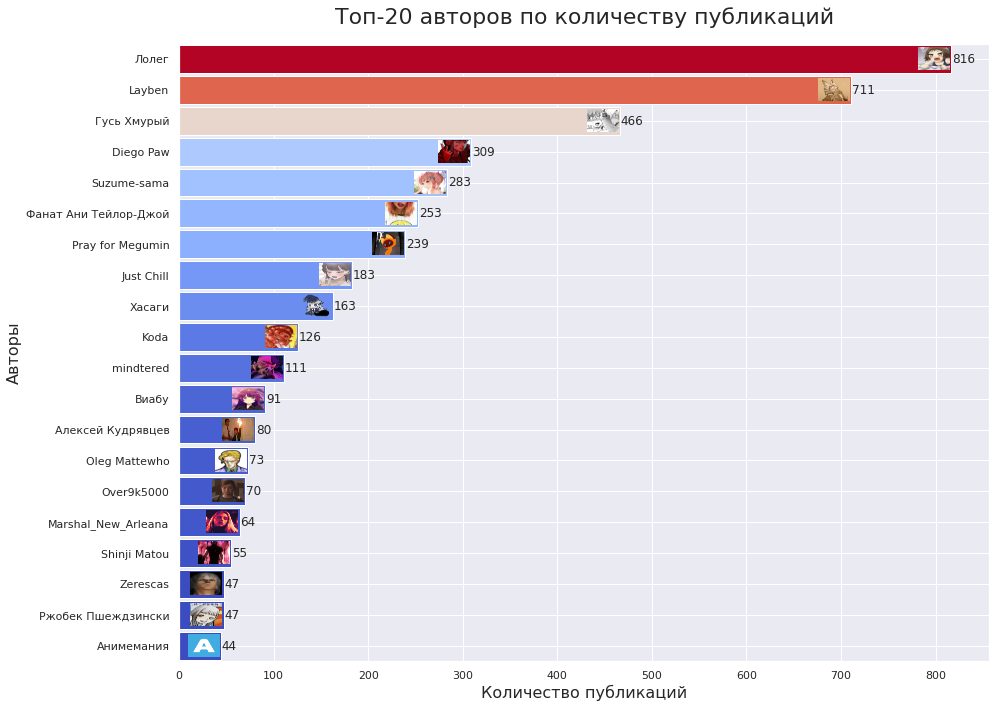

In [148]:
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = tmp_posts_1.author_avatar_url[::-1]
# colors = ['lightcoral', 'orchid', 'peachpuff', 'coral', 'tan', 'indigo', 'goldenrod', 'pink', 'darkturquoise', 'teal'][::-1]
values = tmp_posts_1.id[::-1] 

height = 0.9
plt.barh(y=tmp_posts_1.author_name[::-1], width=tmp_posts_1.id[::-1], height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 35, value - 2, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество публикаций', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-20 авторов по количеству публикаций', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/authors_posts_count_1.jpg", dpi=300, bbox_inches='tight')

plt.show()

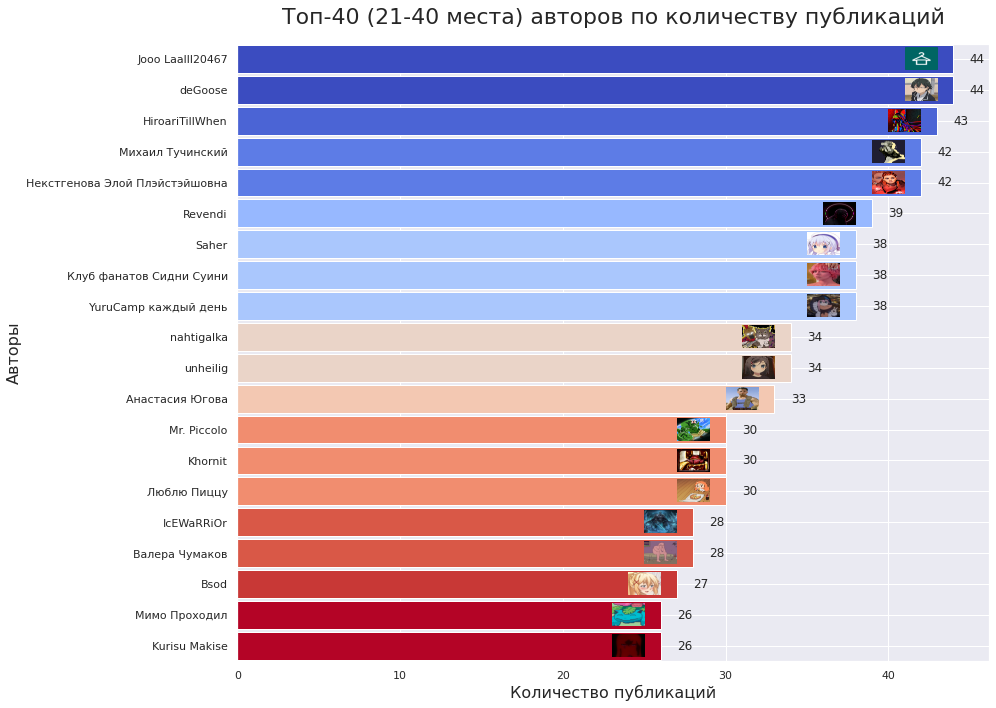

In [149]:
my_cmap = plt.get_cmap("coolwarm_r")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = tmp_posts_2.author_avatar_url[::-1]
# colors = ['lightcoral', 'orchid', 'peachpuff', 'coral', 'tan', 'indigo', 'goldenrod', 'pink', 'darkturquoise', 'teal'][::-1]
values = tmp_posts_2.id[::-1] 

height = 0.9
plt.barh(y=tmp_posts_2.author_name[::-1], width=tmp_posts_2.id[::-1], height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 3, value - 1, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество публикаций', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-40 (21-40 места) авторов по количеству публикаций', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/authors_posts_count_2.jpg", dpi=300, bbox_inches='tight')

plt.show()

Reposts counts

In [150]:
tmp_posts_alter = df[df.is_repost == True].groupby(['author_name','author_avatar_url'], as_index=False) \
.agg({'id': 'count'}).sort_values(by='id', ascending=False).head(40)
tmp_posts_1 = tmp_posts_alter.iloc[0:20]

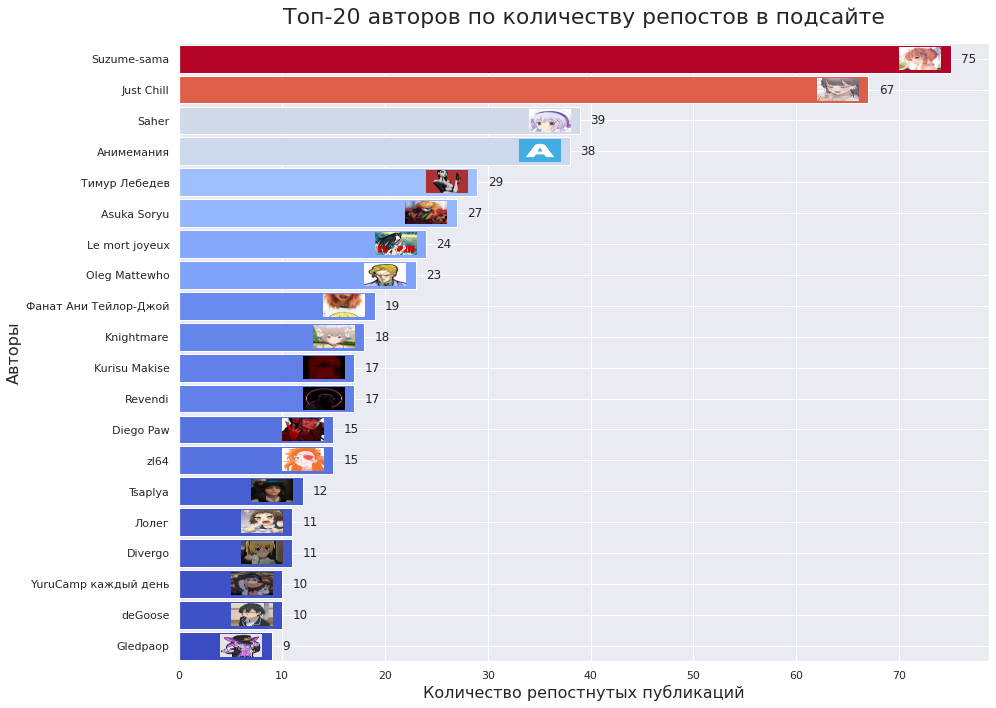

In [151]:
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = tmp_posts_1.author_avatar_url[::-1]
values = tmp_posts_1.id[::-1] 

height = 0.9
plt.barh(y=tmp_posts_1.author_name[::-1], width=tmp_posts_1.id[::-1], height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 5, value - 1, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество репостнутых публикаций', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-20 авторов по количеству репостов в подсайте', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/authors_posts_reposted.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [152]:
df.columns

Index(['date', 'id', 'url', 'author', 'comments_count', 'favorites_count',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags',
       'hour', 'month', 'weekday', 'is_weekend', 'period'],
      dtype='object')

# ---

In [153]:
tmp_likes = df[df.is_repost == False].groupby(['author_name','author_avatar_url'], as_index=False) \
.agg({"likes": "sum"}).sort_values(by="likes", ascending=False).head(40)
tmp_likes_1 = tmp_likes.iloc[0:20]
tmp_likes_2 = tmp_likes.iloc[20:40]
tmp_likes.head(5)

author_name                                  author_avatar_url  likes
271        Лолег  https://leonardo.osnova.io/b6f745b6-3963-56d5-...  24499
88        Layben  https://leonardo.osnova.io/7fec5e46-2507-5dcd-...  14702
238  Гусь Хмурый  https://leonardo.osnova.io/8fd51f8a-d2eb-2130-...  13349
145  Suzume-sama  https://leonardo.osnova.io/efb06bbf-cd2a-5011-...  10324
38     Diego Paw  https://leonardo.osnova.io/7df667af-003c-502d-...   7031

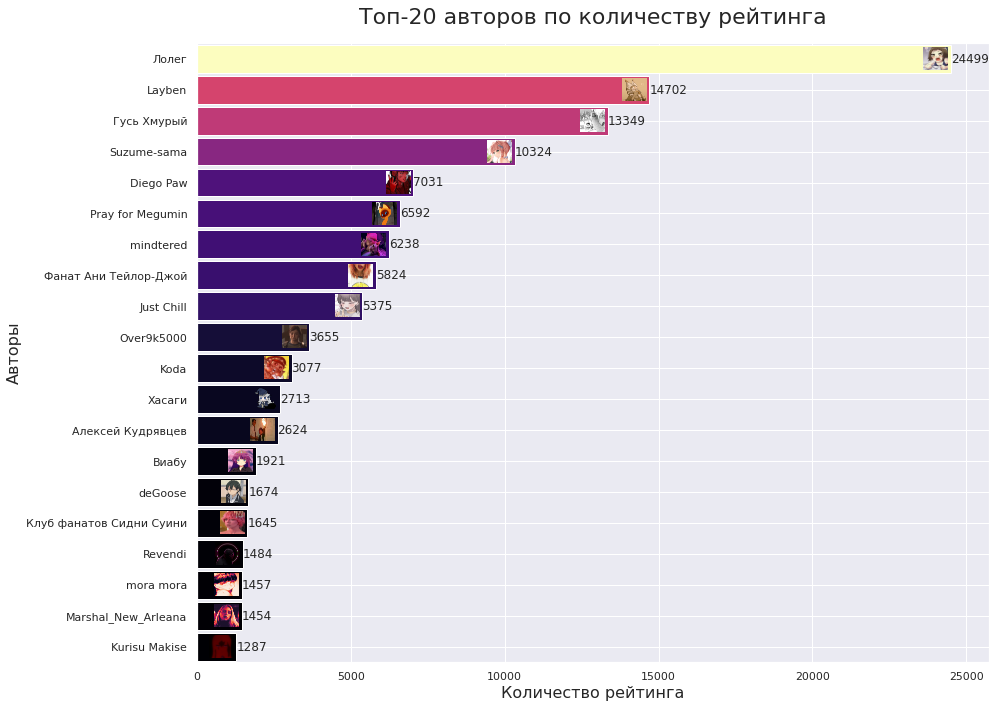

In [154]:
plt.rcParams["figure.figsize"] = [14, 10]
my_cmap = plt.get_cmap("magma")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = tmp_likes_1.author_avatar_url[::-1]
# colors = ['lightcoral', 'orchid', 'peachpuff', 'coral', 'tan', 'indigo', 'goldenrod', 'pink', 'darkturquoise', 'teal'][::-1]
values = tmp_likes_1.likes[::-1] 

height = 0.9
plt.barh(y=tmp_likes_1.author_name[::-1], width=tmp_likes_1.likes[::-1], height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 900, value - 100, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество рейтинга', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-20 авторов по количеству рейтинга', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/authors_rating_1.jpg", dpi=300, bbox_inches='tight')

plt.show()

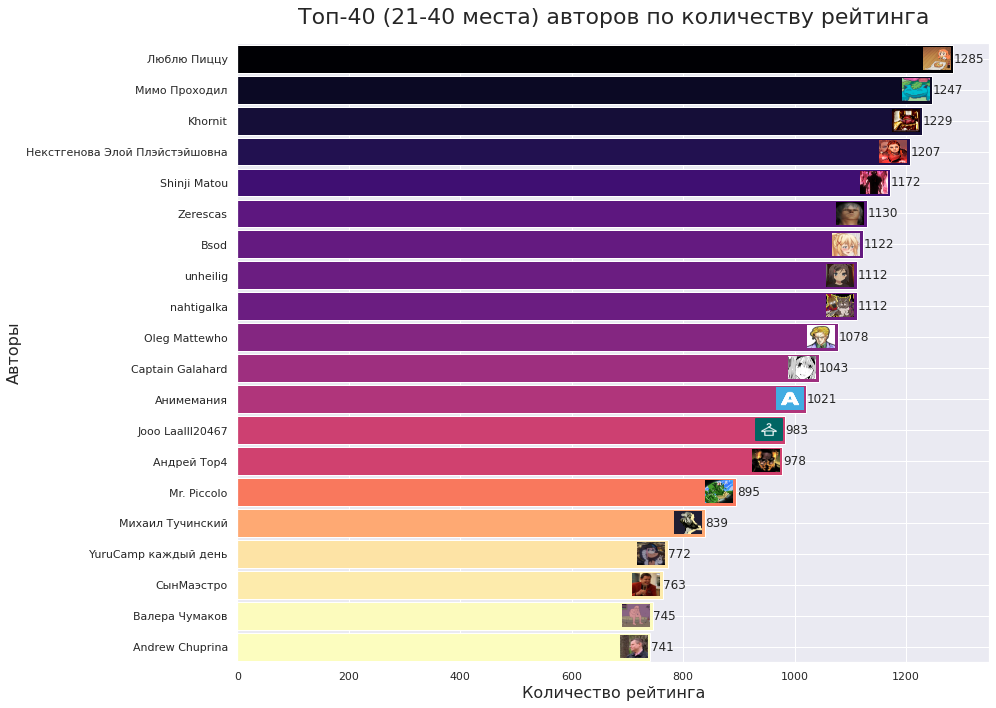

In [155]:
my_cmap = plt.get_cmap("magma_r")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = tmp_likes_2.author_avatar_url[::-1]
# colors = ['lightcoral', 'orchid', 'peachpuff', 'coral', 'tan', 'indigo', 'goldenrod', 'pink', 'darkturquoise', 'teal'][::-1]
values = tmp_likes_2.likes[::-1] 

height = 0.9
plt.barh(y=tmp_likes_2.author_name[::-1], width=tmp_likes_2.likes[::-1], height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 55, value - 5, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество рейтинга', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-40 (21-40 места) авторов по количеству рейтинга', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/authors_rating_2.jpg", dpi=300, bbox_inches='tight')

plt.show()

# ---

# ---

In [156]:
df.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  comments_count  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...              19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...               7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...               5   

   favorites_count  hits_count  is_repost  likes            subsite  ...  \
0               32        1969       True     36              Офтоп  ...   
1               47         659       True     56    Алексей Фёдоров  ...   
2               23         744       True     49    Алексей Фёдоров  ...   
3               18         236       True     41    Алексей Фёдоров  ...   
4                8         180       True     15  Олег Кубанеишвили  ...   

  videos  links audio total_mediacontent               hashtags hour month  \
0      3      0     0                 45                [#long]   21     3   
1      0      0     0                 17               [#anime]   20     1   
2      0      0     0                 32  [#anime, #evangelion]   19     2   
3      0      1     0                 20               [#anime]   18     2   
4      0      0     0                 17                     []   10     3   

    weekday is_weekend   period  
0    Monday          0  2018-03  
1    Sunday          1  2020-01  
2   Tuesday          0  2020-02  
3  Saturday          1  2020-02  
4    Monday          0  2020-03  

[5 rows x 32 columns]

In [157]:
plt.rcParams["figure.figsize"] = [14, 10]

def histogram_plotting(srs: pd.Series, path: str, xlim: int, ci_wide=90, desc_stat='mean', bins='auto'):
    """Function for plitting histogram (seaborn) with custom confidence interval
    and descriptive statistics.
    
    Parameters
    ----------
    srs : pd.Series
        Data for which the histogram is plotted. 
        
    ci_wide : int, default=90
        Wide of confidence interval in percents.
        
    desc_stat : str, default="mean"
        Calculated descriptive statistics.

    Returns
    -------
        None. Printing histogram.
    
    """
       
    ci = (100 - ci_wide) / 200
    confidence_interval = list(srs.quantile([ci, 1-ci]))
    
    ax = sns.histplot(srs, kde=True, bins=bins)
    max_bar_height = max([h.get_height() for h in ax.patches])
    
    ax.plot(confidence_interval, [max_bar_height*1.05, max_bar_height*1.05], color='black')
    
    for x in confidence_interval:
        ax.plot([x, x], [0, max_bar_height*1.1], color='black')
        ax.text(x, max_bar_height*1.13, f'{x:.0f}', horizontalalignment='center', verticalalignment='center')
    
    ax.text(sum(confidence_interval) / 2, max_bar_height*1.07, str(ci_wide) + '% interval',
                horizontalalignment='center', verticalalignment='center')

    descriptive_statistics = getattr(srs, desc_stat)()

    ax.plot([descriptive_statistics, descriptive_statistics], 
            [0, max_bar_height*1.05], color='black', linestyle='--')
    
    ax.text(descriptive_statistics, max_bar_height*0.15, 
            desc_stat.capitalize() + f': {descriptive_statistics:.0f}',
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
            horizontalalignment='center', verticalalignment='center')
    
    ax.set_ylim(0, max_bar_height*1.2)
    ax.set_xlim(left=-10, right=xlim)

    plt.tight_layout()
    
    plt.savefig(PATH + "Full_analysis/" + path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # END OF FUNC

In [158]:
df.columns

Index(['date', 'id', 'url', 'author', 'comments_count', 'favorites_count',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags',
       'hour', 'month', 'weekday', 'is_weekend', 'period'],
      dtype='object')

In [159]:
# df.favorites_count.sort_values(ascending=False).head(20)

Text(0.5, 1.0, 'Лайки')

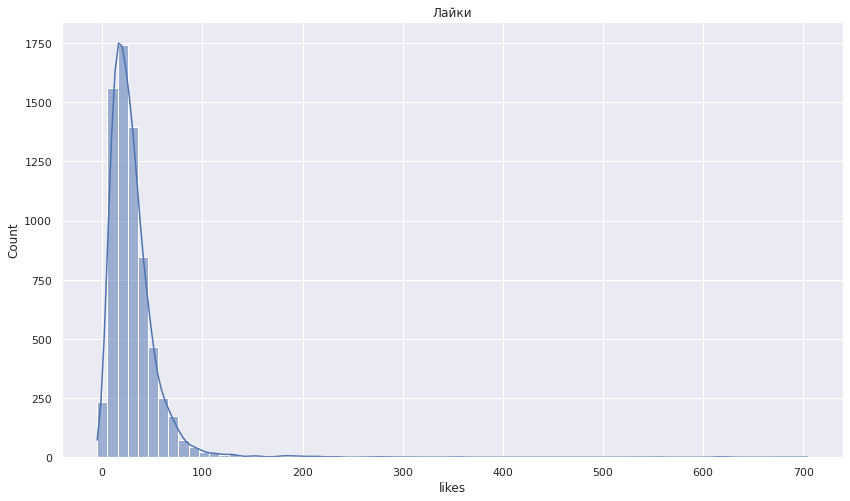

In [160]:
plt.rcParams["figure.figsize"] = [14, 8]

sns.histplot(x = df.likes, data=df, kde=True, bins=70).set_title("Лайки")
# plt.savefig(PATH + "Full_analysis/simple_likes_hist.jpg", dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Лайки')

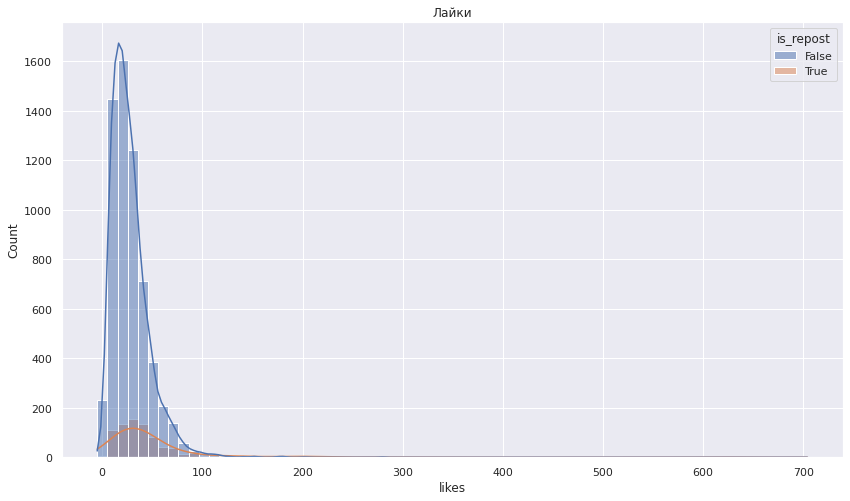

In [161]:
sns.histplot(x = df.likes, data=df, hue='is_repost', kde=True, bins=70).set_title("Лайки")

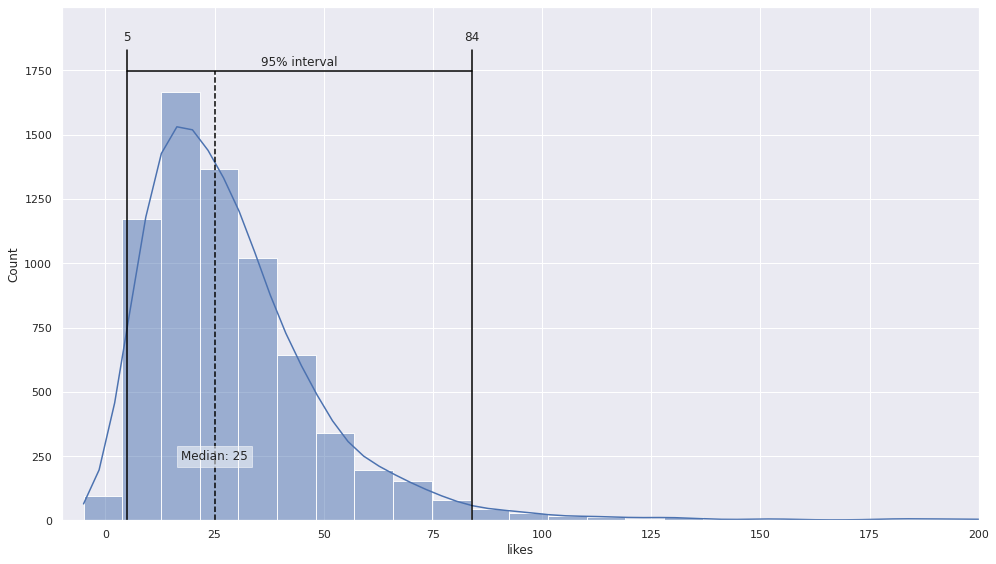

In [162]:
histogram_plotting(df.likes, "simple_likes_CI_hist.jpg", 200, desc_stat='median', ci_wide=95, bins=80)
plt.show()

Text(0.5, 1.0, 'Добавления в закладки')

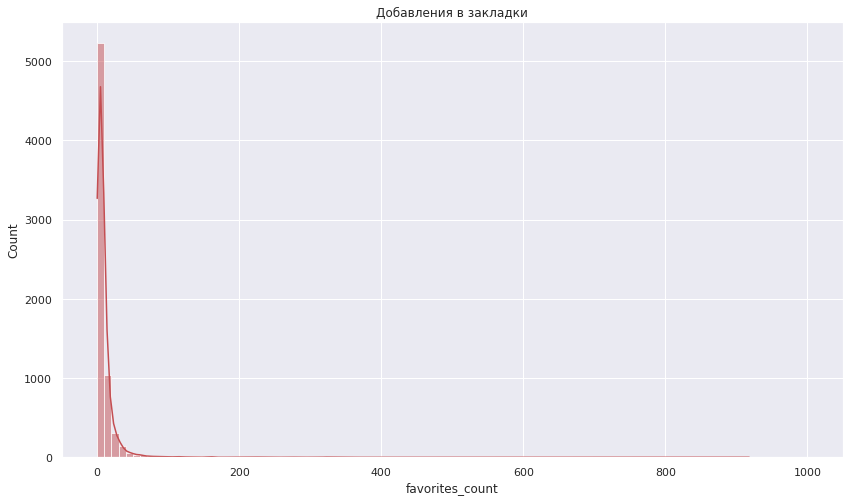

In [163]:
sns.histplot(x = df.favorites_count, data=df, kde=True, color="r", 
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 500, 1000]).set_title("Добавления в закладки")
# plt.savefig(PATH + "Full_analysis/simple_fav_hist.jpg", dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Добавления в закладки')

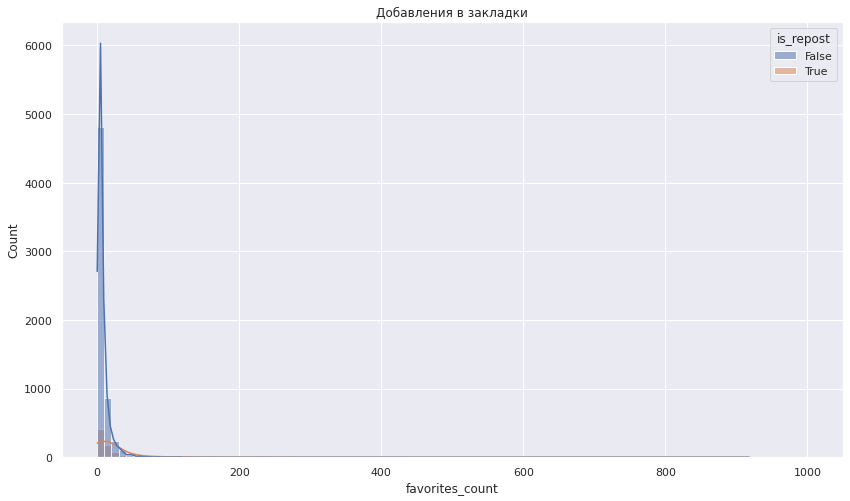

In [164]:
sns.histplot(x = df.favorites_count, data=df, hue='is_repost', kde=True,
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 500, 1000]).set_title("Добавления в закладки")

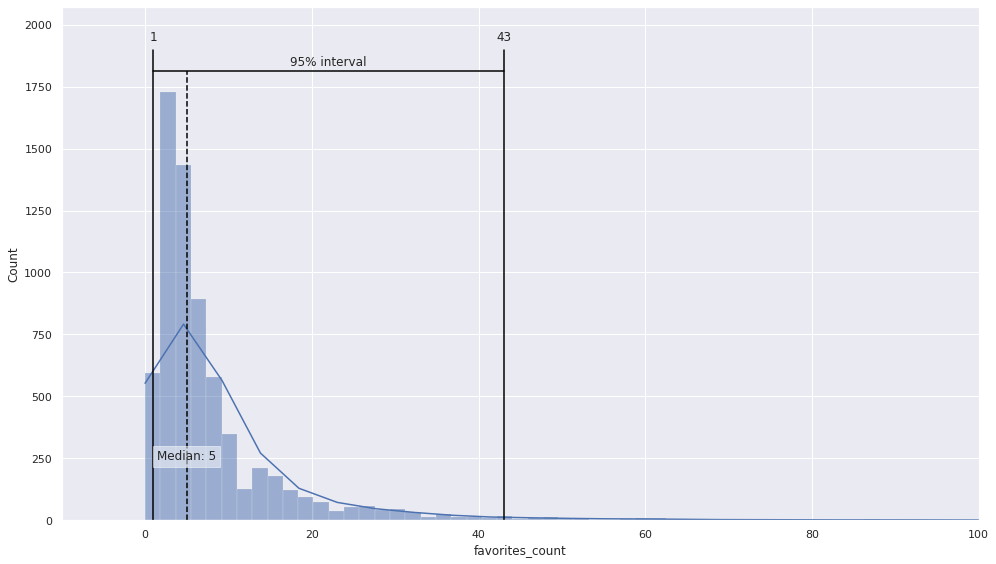

In [165]:
histogram_plotting(df.favorites_count, "simple_favs_CI_hist.jpg", 100, desc_stat='median', 
                   ci_wide=95, bins=500)
plt.show()

Text(0.5, 1.0, 'Комментарии')

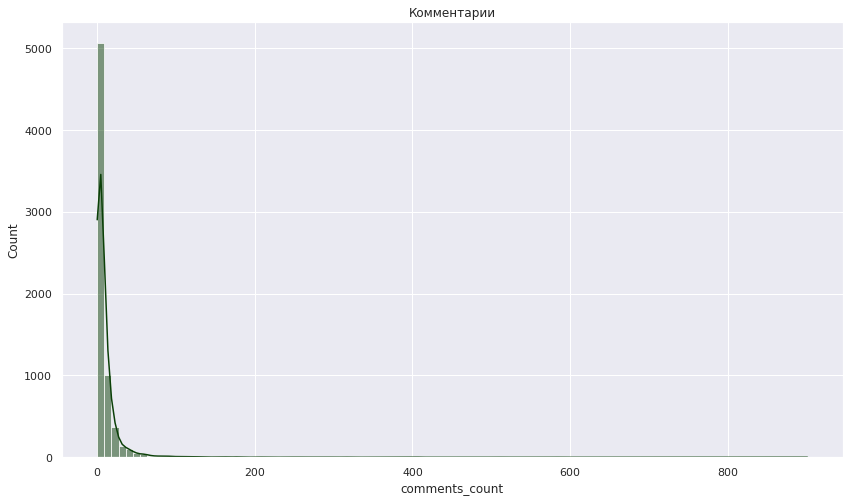

In [166]:
sns.histplot(x = df.comments_count, data=df, kde=True, color="#0b4008", 
             bins=100).set_title("Комментарии")
# plt.savefig(PATH + "Full_analysis/simple_comm_hist.jpg", dpi=300, bbox_inches='tight')

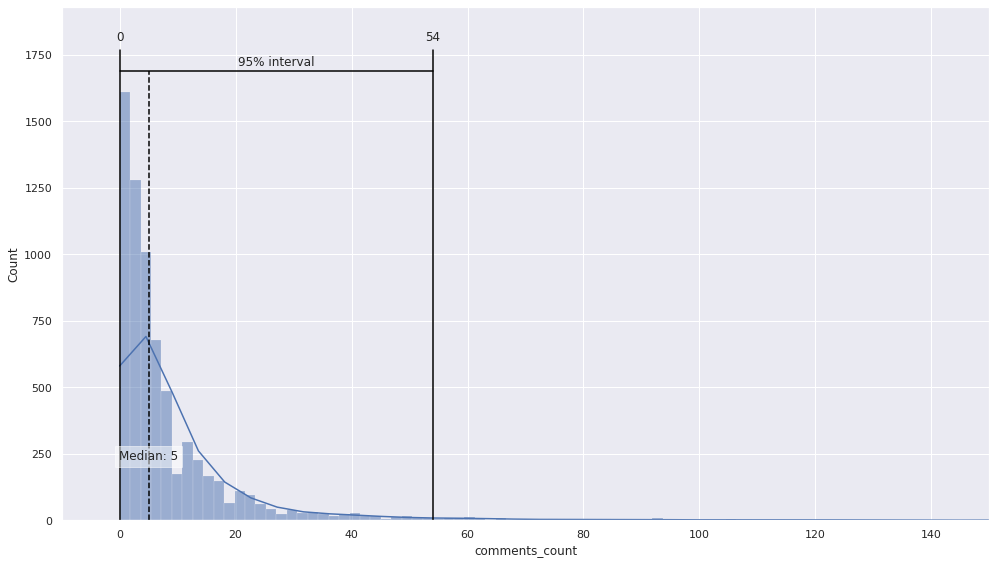

In [167]:
histogram_plotting(df.comments_count, "simple_comm_CI_hist.jpg", 150, desc_stat='median', 
                   ci_wide=95, bins=500)
plt.show()

In [168]:
df.hits_count.sort_values(ascending=False)

5170    57398
909     35914
2138    29741
766     26743
4680    16922
        ...  
2934       12
3286       11
620        11
207        11
2937        8
Name: hits_count, Length: 6900, dtype: int64

Text(0.5, 1.0, 'Просмотры')

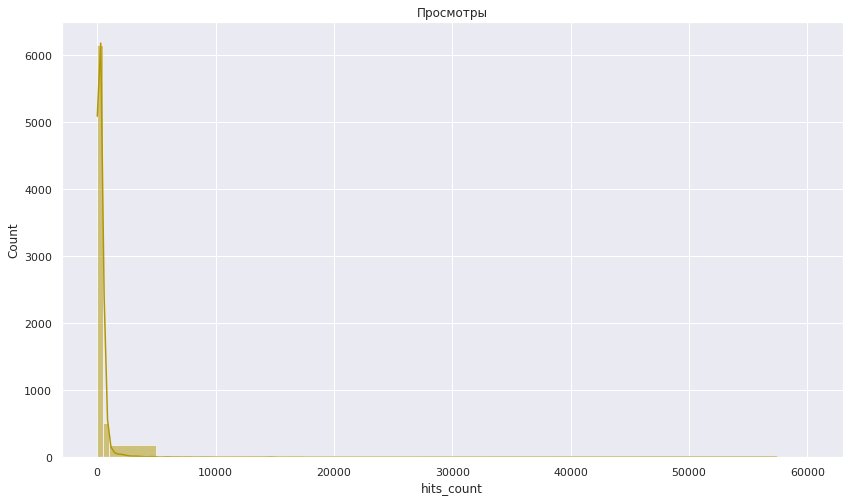

In [169]:
sns.histplot(x = df.hits_count, data=df, kde=True, color="#b29705", 
             bins=[0, 500, 1000, 5000, 10000, 25000, 60000]
            ).set_title("Просмотры")
# plt.savefig(PATH + "Full_analysis/simple_hits_hist.jpg", dpi=300, bbox_inches='tight')

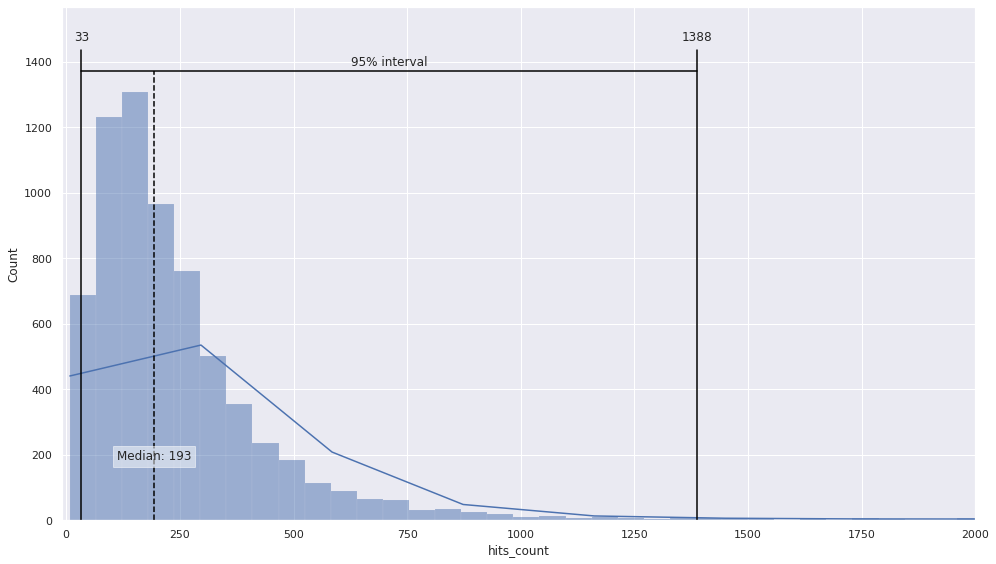

In [170]:
histogram_plotting(df.hits_count, "simple_hits_CI_hist.jpg", 2000, desc_stat='median', 
                   ci_wide=95, bins=1000)
plt.show()

Text(0.5, 1.0, 'Просмотры')

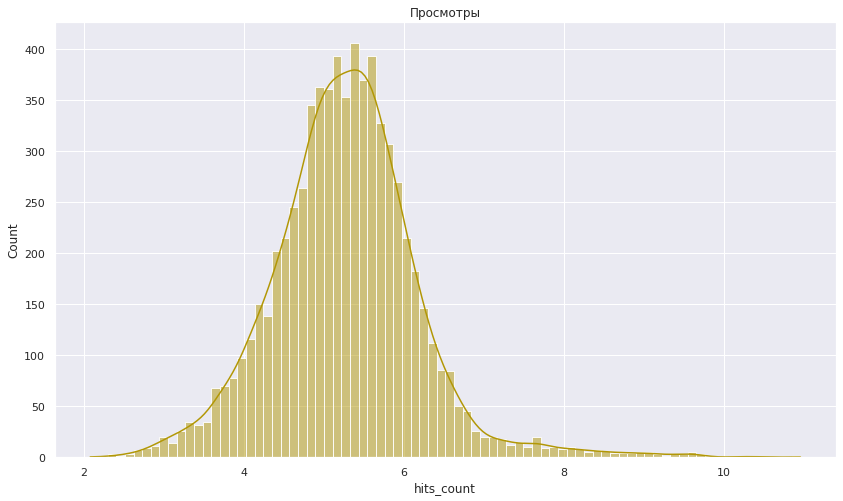

In [171]:
sns.histplot(x = np.log(df.hits_count), data=df, kde=True, color="#b29705", 
#              bins=[0, 500, 1000, 5000, 10000, 25000, 60000]
            ).set_title("Просмотры")

In [172]:
from matplotlib.colors import get_named_colors_mapping
get_named_colors_mapping()

{'xkcd:cloudy blue': '#acc2d9',
 'xkcd:dark pastel green': '#56ae57',
 'xkcd:dust': '#b2996e',
 'xkcd:electric lime': '#a8ff04',
 'xkcd:fresh green': '#69d84f',
 'xkcd:light eggplant': '#894585',
 'xkcd:nasty green': '#70b23f',
 'xkcd:really light blue': '#d4ffff',
 'xkcd:tea': '#65ab7c',
 'xkcd:warm purple': '#952e8f',
 'xkcd:yellowish tan': '#fcfc81',
 'xkcd:cement': '#a5a391',
 'xkcd:dark grass green': '#388004',
 'xkcd:dusty teal': '#4c9085',
 'xkcd:grey teal': '#5e9b8a',
 'xkcd:macaroni and cheese': '#efb435',
 'xkcd:pinkish tan': '#d99b82',
 'xkcd:spruce': '#0a5f38',
 'xkcd:strong blue': '#0c06f7',
 'xkcd:toxic green': '#61de2a',
 'xkcd:windows blue': '#3778bf',
 'xkcd:blue blue': '#2242c7',
 'xkcd:blue with a hint of purple': '#533cc6',
 'xkcd:booger': '#9bb53c',
 'xkcd:bright sea green': '#05ffa6',
 'xkcd:dark green blue': '#1f6357',
 'xkcd:deep turquoise': '#017374',
 'xkcd:green teal': '#0cb577',
 'xkcd:strong pink': '#ff0789',
 'xkcd:bland': '#afa88b',
 'xkcd:deep aqua': '#0

Text(0.5, 1.0, 'Количество символов')

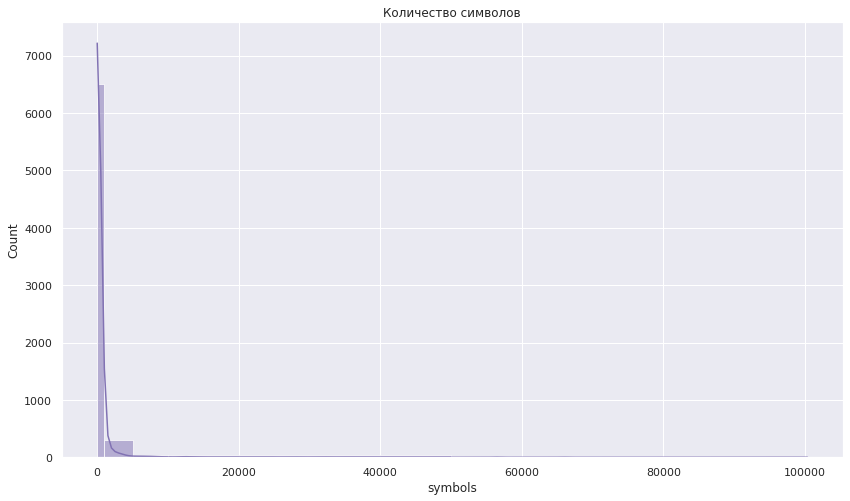

In [173]:
sns.histplot(x = df.symbols, data=df, kde=True, color="m", 
#              bins=[0, 100, 200, 300, 400, 500, 1000, 2000, 5000, 10000, 25000, 50000, 100000]
             bins=[0, 1000, 5000, 10000, 50000, 100000]
            ).set_title("Количество символов")
# plt.savefig(PATH + "Full_analysis/simple_symb_hist.jpg", dpi=300, bbox_inches='tight')

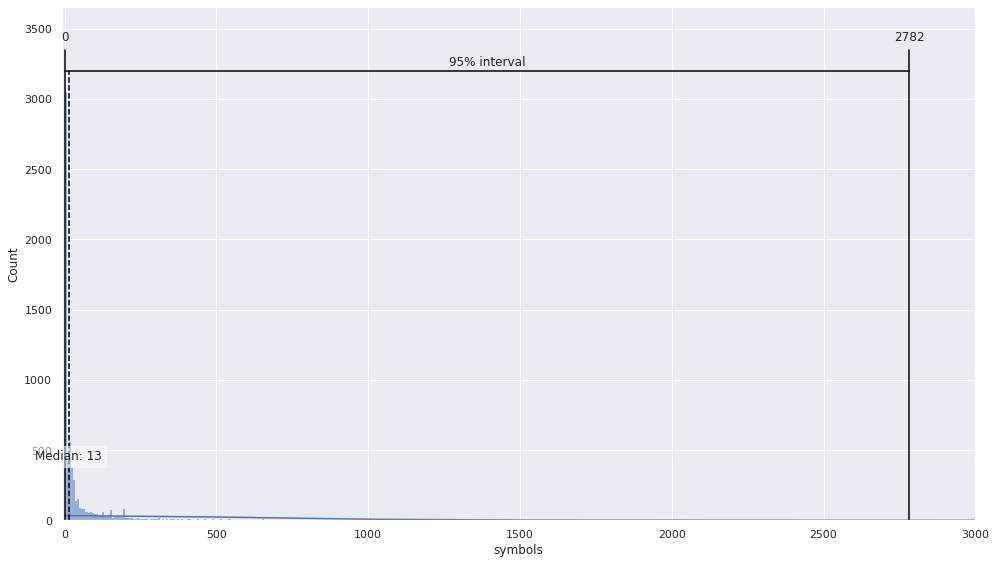

In [174]:
histogram_plotting(df.symbols, "simple_symbols_CI_hist.jpg", 3000, desc_stat='median', 
                   ci_wide=95)
plt.show()

Text(0.5, 1.0, 'Количество символов')

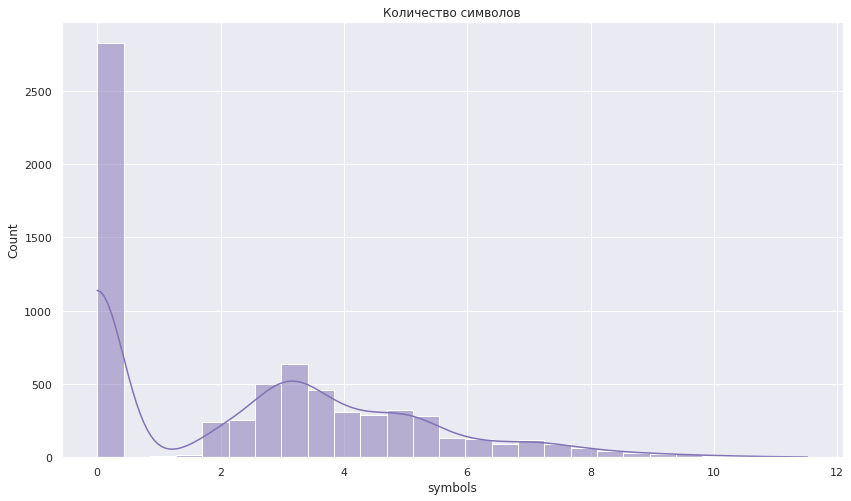

In [175]:
sns.histplot(x = np.log(df.symbols +1), data=df, kde=True, color="m", 
#              bins=[0, 100, 200, 300, 400, 500, 1000, 2000, 5000, 10000, 25000, 50000, 100000]
#              bins=[0, 1000, 5000, 10000, 50000, 100000]
            ).set_title("Количество символов")

Text(0.5, 1.0, 'Количество медиаконтента')

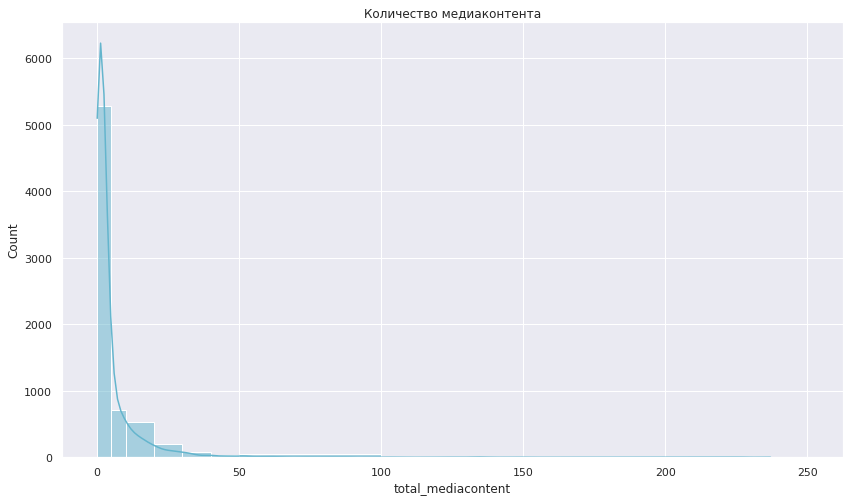

In [176]:
sns.histplot(x = df.total_mediacontent, data=df, kde=True, color="c", 
                bins=[0,5,10,20,30,40,50,100,150,200,250]
            ).set_title("Количество медиаконтента")
# plt.savefig(PATH + "Full_analysis/simple_media_hist.jpg", dpi=300, bbox_inches='tight')

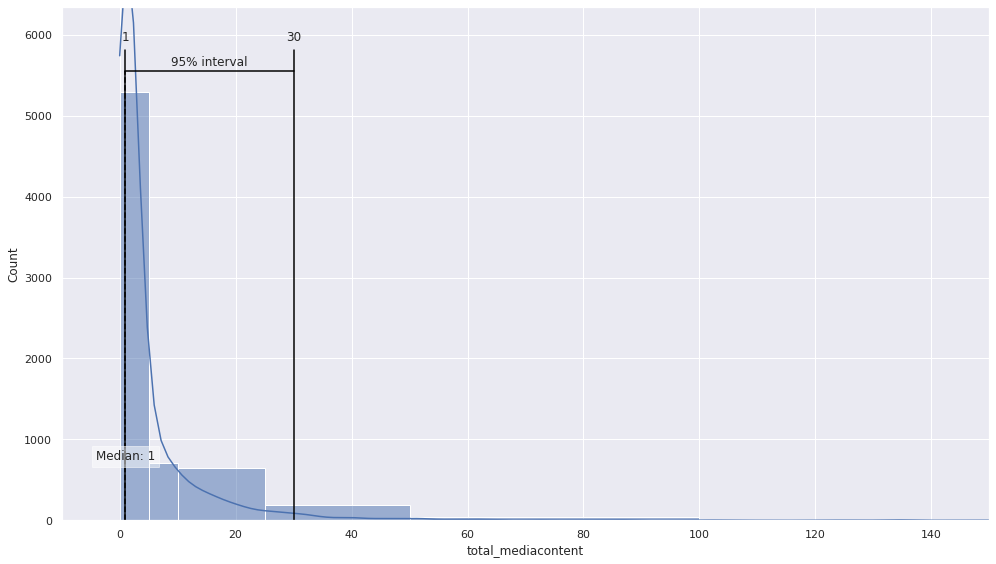

In [177]:
histogram_plotting(df.total_mediacontent, "simple_mc_CI_hist.jpg", 150, desc_stat='median', 
                   ci_wide=95, bins=[0,5,10,25,50,100])
plt.show()

Text(0.5, 1.0, 'Количество медиаконтента')

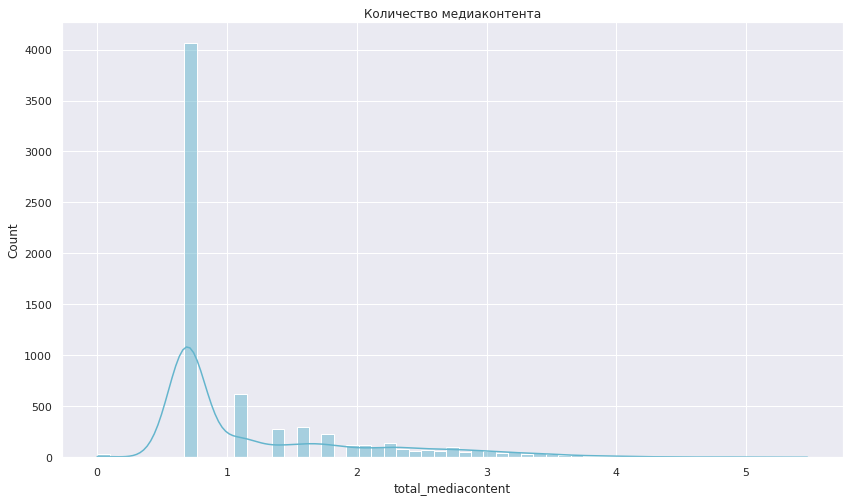

In [178]:
sns.histplot(x = np.log(df.total_mediacontent + 1), data=df, kde=True, color="c", 
#                 bins=[0,1,2,3,4,5]
            ).set_title("Количество медиаконтента")

In [179]:
# plt.rcParams["figure.figsize"] = [16, 14]
# f, axes = plt.subplots(2, 3, )
# f.suptitle("Количественные характеристики публикаций")

# sns.histplot(x = df.likes, data=df, kde=True, ax=axes[0,0], bins=70).set_title("Лайки")
# sns.histplot(x = df.comments_count, data=df, kde=True, color="#0b4008", 
#              ax=axes[0,1], bins=100).set_title("Комментарии")
# sns.histplot(x = df.favorites_count, data=df, kde=True, color="#de0c62", 
#              bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 500, 1000], ax=axes[0,2]) \
# .set_title("Добавления в закладки")

In [180]:
df.columns

Index(['date', 'id', 'url', 'author', 'comments_count', 'favorites_count',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags',
       'hour', 'month', 'weekday', 'is_weekend', 'period'],
      dtype='object')

In [181]:
plt.rcParams["figure.figsize"] = [14, 10]

In [182]:
# df.likes[(df.is_repost == False) & (df.author_type == 2)]

Text(0.5, 1.0, 'Репосты')

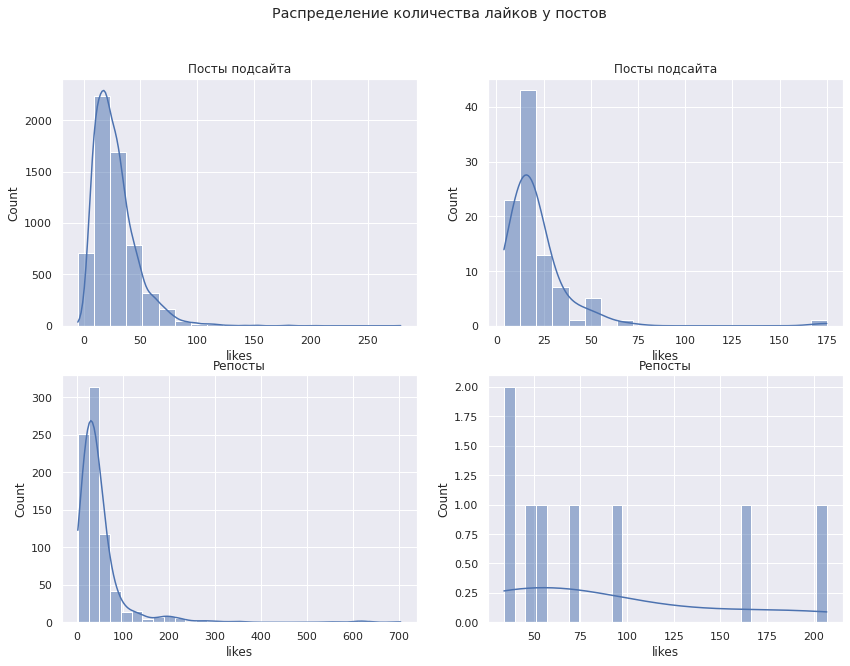

In [183]:
f, axes = plt.subplots(2, 2, )#sharey=True, sharex=True)
f.suptitle("Распределение количества лайков у постов")

sns.histplot(x = df.likes[(df.is_repost == False) & (df.author_type == 1)], 
             data=df, kde=True, ax=axes[0,0], bins=20).set_title("Посты подсайта")

sns.histplot(x = df.likes[(df.is_repost == True) & (df.author_type == 1)], 
             data=df, kde=True, ax=axes[1,0], bins=30).set_title("Репосты")

sns.histplot(x = df.likes[(df.is_repost == False) & (df.author_type == 2)], 
             data=df, kde=True, ax=axes[0,1], bins=20).set_title("Посты подсайта")

sns.histplot(x = df.likes[(df.is_repost == True) & (df.author_type == 2)], 
             data=df, kde=True, ax=axes[1,1], bins=30).set_title("Репосты")

Text(0.5, 1.0, 'Репосты')

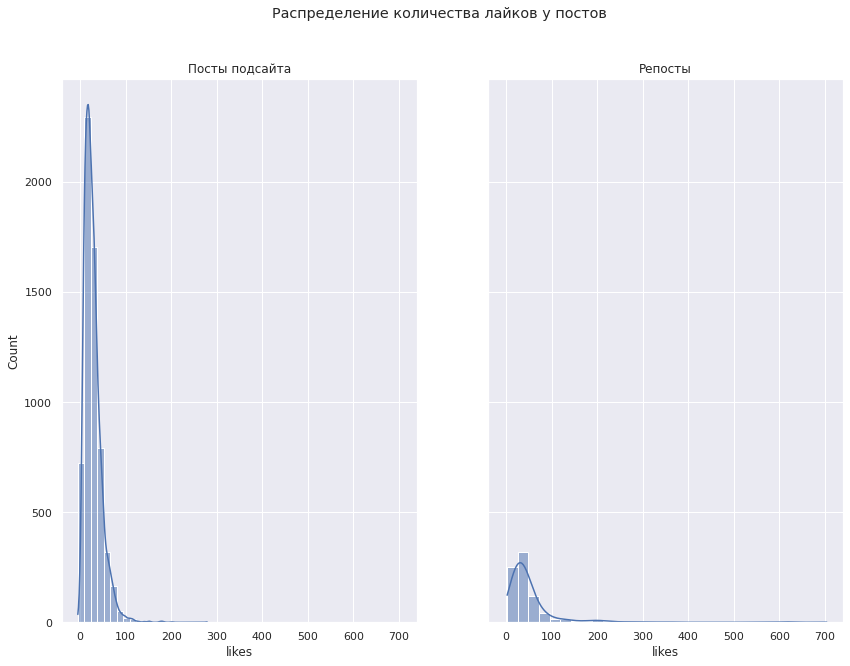

In [184]:
f, axes = plt.subplots(1, 2, sharey=True, sharex=True)
f.suptitle("Распределение количества лайков у постов")

sns.histplot(x = df.likes[df.is_repost == False], 
             data=df, kde=True, ax=axes[0], bins=20).set_title("Посты подсайта")

sns.histplot(x = df.likes[df.is_repost == True], 
             data=df, kde=True, ax=axes[1], bins=30).set_title("Репосты")

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='likes', ylabel='Density'>

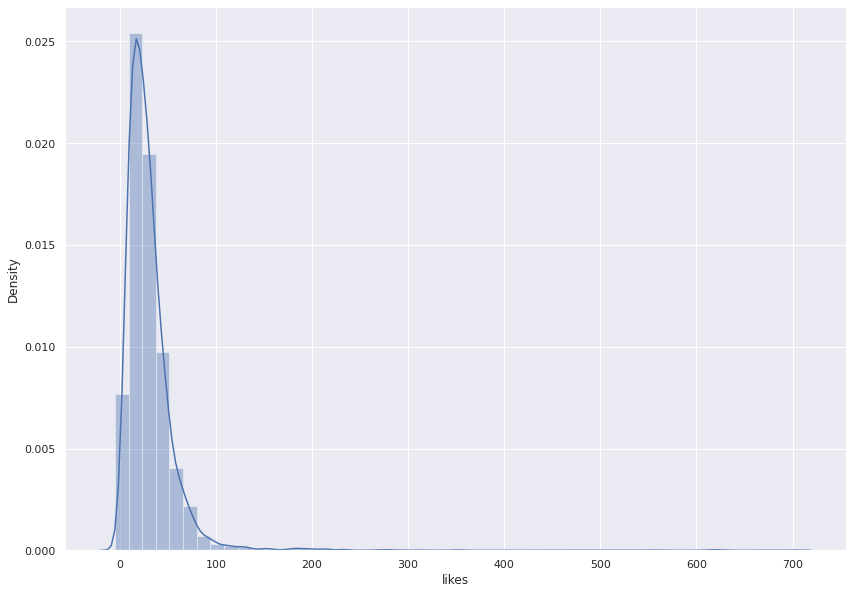

In [185]:
sns.distplot(df.likes, kde=True, color="b")

In [186]:
len('двенадцать')

10

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version

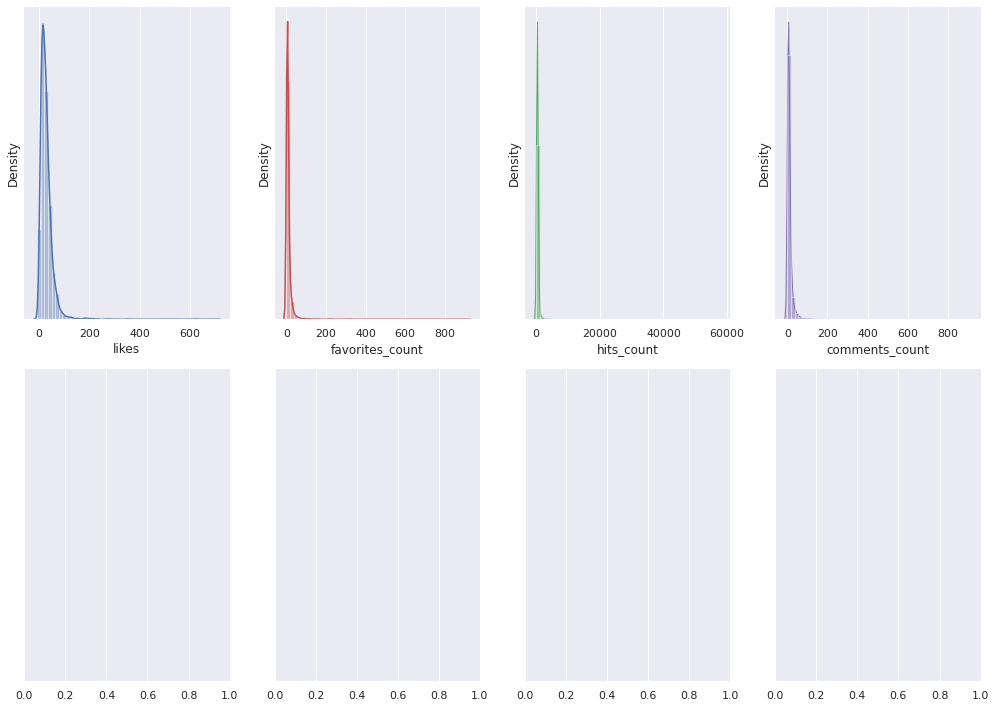

In [187]:
f, axes = plt.subplots(2, 4, figsize=(14, 10))
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df.likes, kde=True, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(df.favorites_count, kde=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(df.hits_count, kde=True, color="g", kde_kws={"shade": True}, ax=axes[0, 2])

# Plot a histogram and kernel density estimate
sns.distplot(df.comments_count, kde=True, color="m", kde_kws={"shade": True}, ax=axes[0, 3])

# sns.distplot(df.comments_count, kde=True, color="m", kde_kws={"shade": True}, ax=axes[1, 0])

plt.setp(axes, yticks=[])
plt.tight_layout()

#### Корреляция

In [188]:
df.columns

Index(['date', 'id', 'url', 'author', 'comments_count', 'favorites_count',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags',
       'hour', 'month', 'weekday', 'is_weekend', 'period'],
      dtype='object')

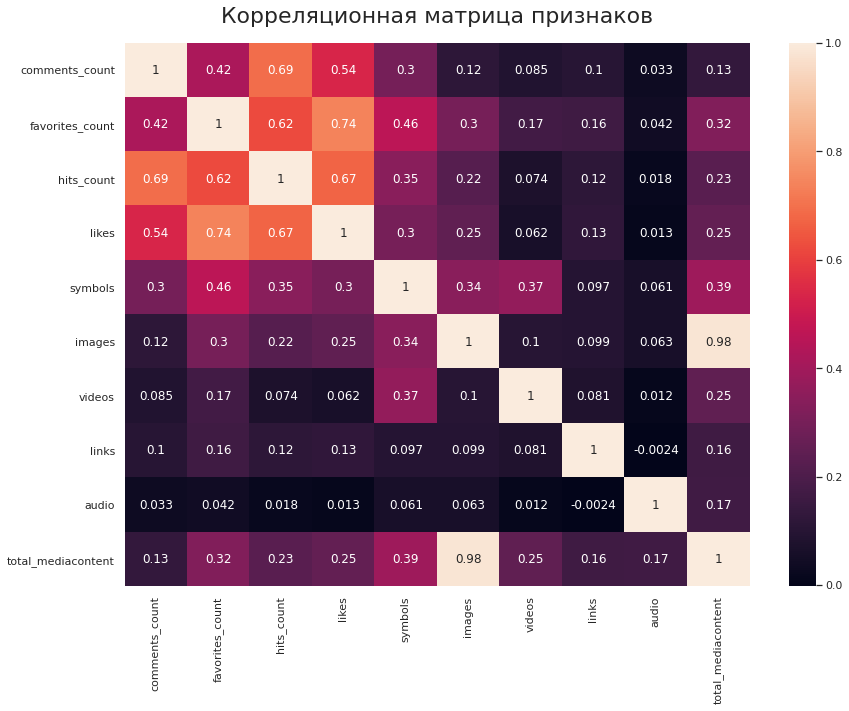

In [189]:
sns.heatmap(df.loc[:, ['comments_count', 'favorites_count', 'hits_count', 'likes', 'symbols',
                       'images', 'videos', 'links', 'audio', 'total_mediacontent']].corr(method='pearson'), 
            annot=True)

plt.title('Корреляционная матрица признаков', fontsize=22, pad=20);
# plt.savefig(PATH + "Full_analysis/corr_matrix.jpg", dpi=300, bbox_inches='tight')

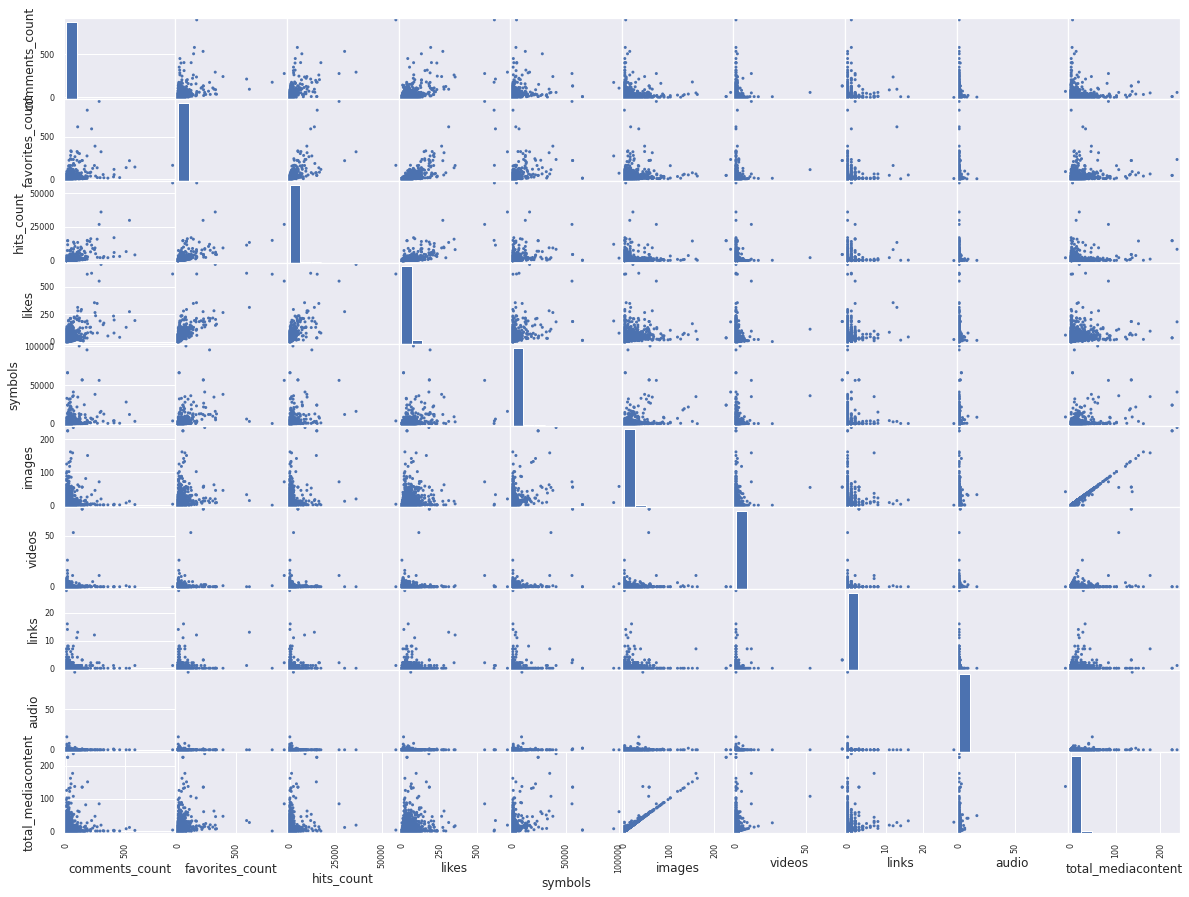

In [190]:
pd.plotting.scatter_matrix(df[['comments_count', 'favorites_count', 'hits_count', 'likes', 'symbols',
                       'images', 'videos', 'links', 'audio', 'total_mediacontent']], alpha=1, figsize=(20,15));
# plt.savefig(PATH + "Full_analysis/corr_scatter.jpg", dpi=300, bbox_inches='tight')

In [ ]:
# from scipy import stats

# cols = ['comments_count', 'favorites_count', 'hits_count', 'symbols',
#         'images', 'videos', 'links', 'audio', 'total_mediacontent']

# for col in cols: 
#     pearson_coef, p_value = stats.pearsonr(df[col], df['likes'])
#     print("PearsonR между {} и likes {} с P-значением P = {}".format(
#           col, pearson_coef, p_value ))
    
#     if p_value < 0.001:
#         print('Корреляция между {} и likes статистически значимая'.format(col))
#     elif p_value < 0.05:
#         print('Корреляция между {} и likes средняя'.format(col))
#     elif p_value < 0.1:
#         print('Корреляция между {} и likes слабая'.format(col))
#     else:
#         print('Корреляция между {} и likes статистически незначимая'.format(col))
        
#     if pearson_coef > 0 :
#         if pearson_coef > 0.85:
#             print('Коэффициент ~{} показывает положительную очень сильную связь\n'.format(pearson_coef))
#         elif pearson_coef > 0.75 :
#             print('Коэффициент ~{} показывает положительную достаточно сильную связь\n'.format(pearson_coef))
#         elif pearson_coef > 0.60:
#             print('Коэффициент ~{} показывает положительную относительно сильную связь\n'.format(pearson_coef))
#         elif pearson_coef > 0.50 :
#             print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
#         else:
#             print('Коэффициент ~{} показывает положительную слабую связь\n'.format(pearson_coef))
#     else:
#         if abs(pearson_coef) > 0.85:
#             print('Коэффициент ~{} показывает негативную очень сильную связь\n'.format(pearson_coef))
#         elif abs(pearson_coef) > 0.75 :
#             print('Коэффициент ~{} показывает негативную достаточно сильную связь\n'.format(pearson_coef))
#         elif abs(pearson_coef) > 0.60:
#             print('Коэффициент ~{} показывает негативную относительно сильную связь\n'.format(pearson_coef))
#         elif abs(pearson_coef) > 0.50 :
#             print('Коэффициент ~{} показывает негативную среднюю связь\n'.format(pearson_coef))
#         else:
#             print('Коэффициент ~{} показывает негативную слабую связь\n'.format(pearson_coef))

In [ ]:
# pearson_coef, p_value = stats.pearsonr(np.log(df.total_mediacontent+1), np.log(df.likes+10))
# print(pearson_coef, p_value)
# sns.scatterplot(data=df, x=np.log(df.total_mediacontent+1), y=np.log(df.likes+10))

In [ ]:
# pearson_coef, p_value = stats.pearsonr(np.log(df.symbols+10), np.log(df.likes+10))
# print(pearson_coef, p_value)
# sns.scatterplot(data=df, x=np.log(df.symbols+10), y=np.log(df.likes+10))

In [ ]:
sns.scatterplot(data=df, x='symbols', y='likes')
plt.xlabel('Количество символов в публикации', fontsize=16)
plt.ylabel('Лайки', fontsize=16)
plt.title('Диаграмма рассеяния между количеством символов и лайками', fontsize=22, pad=20);
# plt.savefig(PATH + "Full_analysis/scatter_likes_symbols.jpg", dpi=300, bbox_inches='tight')

In [ ]:
sns.scatterplot(data=df, x='total_mediacontent', y='likes')
plt.xlabel('Количество медиаконтента в публикации', fontsize=16)
plt.ylabel('Лайки', fontsize=16)
plt.title('Диаграмма рассеяния между количеством медиаконтента и лайками', fontsize=22, pad=20);
# plt.savefig(PATH + "Full_analysis/scatter_likes_media.jpg", dpi=300, bbox_inches='tight')

In [ ]:
plt.rcParams["figure.figsize"] = [20, 16]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
ax = sns.scatterplot(x='symbols', y='total_mediacontent', hue='likes', palette='turbo', data=df)

norm = plt.Normalize(df.likes.min(), df.likes.max())
sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.xlabel('Количество символов в публикации', fontsize=16)
plt.ylabel('Количество медиаконтента в публикации', fontsize=16)
plt.title('Диаграмма рассеяния между количеством медиаконтента и лайками', fontsize=22, pad=20);

# plt.savefig(PATH + "Full_analysis/scatter_symbols_media_likes.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [20, 16]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
ax = sns.scatterplot(x=np.log(df.symbols + 1), y=np.log(df.total_mediacontent + 1), hue='likes', palette='turbo', data=df)

norm = plt.Normalize(df.likes.min(), df.likes.max())
sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.xlabel('Логарифм от количества символов в публикации', fontsize=16)
plt.ylabel('Логарифм от количества медиаконтента в публикации', fontsize=16)
plt.title('Диаграмма рассеяния между количеством медиаконтента и лайками', fontsize=22, pad=20);

# plt.savefig(PATH + "Full_analysis/scatter_log_symbols_media_likes.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
sns.set()
ax = sns.scatterplot(x=np.log(df.words + 1), y=np.log(df.total_mediacontent + 1), hue='likes', 
                     palette='turbo', data=df)

norm = plt.Normalize(df.likes.min(), df.likes.max())
sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.xlabel('Логарифм от количества слов в публикации', fontsize=16)
plt.ylabel('Логарифм от количества медиаконтента в публикации', fontsize=16)
plt.title('Диаграмма рассеяния между количеством медиаконтента и лайками', fontsize=22, pad=20);

# plt.savefig(PATH + "Full_analysis/scatter_log_symbols_media_likes.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
df.groupby(['author_name']).agg({'id': 'count', 'likes': ['max', 'sum']}) \
    .sort_values(by=("id",'count'), ascending=False)

In [ ]:
df.groupby(['author_name', 'is_repost']).agg({'id': 'count', 'likes': ['max', 'sum']}).sort_values(by=("id",'count'), ascending=False)

https://stackoverflow.com/questions/62884183/trying-to-add-a-colorbar-to-a-seaborn-scatterplot

https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph

https://stackoverflow.com/questions/33436221/displaying-rotatable-3d-plots-in-ipython-or-jupyter-notebook

https://matplotlib.org/2.2.5/gallery/mplot3d/rotate_axes3d.html

https://stackoverflow.com/questions/49981313/rotate-interactively-a-3d-plot-in-python-matplotlib-jupyter-notebook

https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook

https://stackoverflow.com/questions/38326983/how-to-rotate-a-3d-surface-in-matplotlib

https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

https://stackoverflow.com/questions/36296101/donut-chart-python

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b

In [ ]:
# %matplotlib notebook

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [12, 16]

x,y,z = df.symbols.values, df.total_mediacontent.values, df.likes.values
# x = x.reshape(-1,1)
# y = y.reshape(-1,1)
# z = z.reshape(-1,1)
# x_scaled = StandardScaler().fit_transform(x)
# y_scaled = StandardScaler().fit_transform(y)
# z_scaled = StandardScaler().fit_transform(z)

fig = plt.figure()
ax = Axes3D(fig)
# # surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.01)
# # fig.colorbar(surf, shrink=0.05, aspect=50)
# # plt.show()

# c = np.arange(len(z_scaled)) / len(z_scaled)
c = np.arange(len(z)) / len(z)
# p = ax.scatter3D(x_scaled, y_scaled, z_scaled, c=c)
ax.scatter3D(x, y, z, c=c)

plt.title('3D диаграмма рассеяния')
plt.xlabel('Количество символов в публикациях')
plt.ylabel('Количество медиаконтента в публикациях')

In [ ]:
# plt.rcParams["figure.figsize"] = [14, 10]

# def histogram_plotting(srs: pd.Series, ci_wide=90, desc_stat='mean'):
#     """Function for plitting histogram (seaborn) with custom confidence interval
#     and descriptive statistics.
    
#     Parameters
#     ----------
#     srs : pd.Series
#         Data for which the histogram is plotted. 
        
#     ci_wide : int, default=90
#         Wide of confidence interval in percents.
        
#     desc_stat : str, default="mean"
#         Calculated descriptive statistics.

#     Returns
#     -------
#         None. Printing histogram.
    
#     """
       
#     ci = (100 - ci_wide) / 200
#     confidence_interval = list(srs.quantile([ci, 1-ci]))
    
#     ax = sns.histplot(srs, kde=True, bins='auto')
#     max_bar_height = max([h.get_height() for h in ax.patches])
    
#     ax.plot(confidence_interval, [max_bar_height*1.05, max_bar_height*1.05], color='black')
    
#     for x in confidence_interval:
#         ax.plot([x, x], [0, max_bar_height*1.1], color='black')
#         ax.text(x, max_bar_height*1.13, f'{x:.0f}', horizontalalignment='center', verticalalignment='center')
    
#     ax.text(sum(confidence_interval) / 2, max_bar_height*1.07, str(ci_wide) + '% interval',
#                 horizontalalignment='center', verticalalignment='center')

#     descriptive_statistics = getattr(srs, desc_stat)()

#     ax.plot([descriptive_statistics, descriptive_statistics], 
#             [0, max_bar_height*1.05], color='black', linestyle='--')
    
#     ax.text(descriptive_statistics, max_bar_height*0.15, 
#             desc_stat.capitalize() + f': {descriptive_statistics:.0f}',
#             bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
#             horizontalalignment='center', verticalalignment='center')
    
#     ax.set_ylim(0, max_bar_height*1.2)

#     plt.tight_layout()
#     plt.show()
    
#     # END OF FUNC

In [ ]:
# df.columns

In [ ]:
# histogram_plotting(df.total_mediacontent, desc_stat='median')

In [ ]:
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue='is_repost', data=df)

In [ ]:
sns.histplot(x = df.comments_count, kde=True)

In [ ]:
# sns.boxplot(data=df, x="is_repost", y="likes")

In [ ]:
a = df.groupby(['author_name']).agg({'id': 'count'})
a[a['id'] > 1].sort_values(by='id', ascending=False)

In [ ]:
a[a['id'] > 100].index

In [ ]:
tmp = df.groupby(['author_name']).agg({'id': 'count'})

In [ ]:
# sns.boxplot(data=df, y="author_name", x="likes")

In [ ]:
# sns.violinplot(y=df.likes)

## TEST OF PLONINE

In [ ]:
from plotnine import *
from plotnine.data import *

https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_violin.html?highlight=violin#violins-boxes-points-and-lines

In [ ]:
(ggplot(df, aes(x=df.is_repost, y=df.likes, fill=df.is_repost)) + geom_violin(show_legend=False) + geom_boxplot(width = .2)
+ scale_fill_manual(values=['dodgerblue', 'darkorange'])
+ theme_classic()
+ theme(figure_size=(8, 6))
)

In [ ]:
df[df.title == 'Статья удалена'].shape[0]

In [ ]:
df[df.title == 'Статья удалена'].author_name.unique()

In [ ]:
df[sum([df.images, df.videos, df.links]) == 0].symbols.unique()

In [ ]:
df[df.total_mediacontent == 0].symbols.unique()

In [ ]:
df.total_mediacontent.value_counts(normalize=True, sort=True)

In [ ]:
df.shape[0]

## END OF TEST

In [ ]:
# sns.displot(x=df.symbols, y=df.total_mediacontent, col='is_repost', data=df)

In [ ]:
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue='is_repost', data=df)

In [ ]:
# sns.histplot(data=df, x=df.total_mediacontent, kde=True)

In [ ]:
# sns.histplot(data=df, x=df.likes, kde=True)#, bins=70)

# CLUSTERING

In [ ]:
X = np.array([df.symbols, df.total_mediacontent]).T
X

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn import metrics

# inertia = []
# k = range(1, 10)
# for k_i in k:
#     km = KMeans(n_clusters=k_i).fit(X)
#     km.fit(X)
#     inertia.append(km.inertia_)
    
# plt.plot(k, inertia)
# plt.xlabel('k')
# plt.ylabel('inertia')
# plt.title('The Elbow Method showing the optimal k')

In [ ]:
# from sklearn.metrics import silhouette_score
# inertia = []
# k = range(2, 10)
# for k_i in k:
#     km = KMeans(n_clusters=k_i).fit(X)
#     km.fit(X)
#     inertia.append(silhouette_score(X, km.labels_))

# print(inertia)
    
# plt.plot(k, inertia)
# plt.xlabel('k')
# plt.ylabel('silhouette_score')
# plt.title('The Elbow Method showing the optimal k')

In [ ]:
# kmeans = KMeans(n_clusters=4, random_state=10)
# y_pred = kmeans.fit_predict(X)

# # Plot the prediction
# # plt.scatter(X[:,0], X[:,1], c=y_pred)
# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred)
# # plt.savefig(PATH + "Full_analysis/fail_KMeans.jpg", dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.cluster import DBSCAN

X = np.array([df.symbols, df.total_mediacontent]).T
X

In [ ]:
clustering = DBSCAN(eps=15, min_samples=10)
y_pred = clustering.fit_predict(X)

plt.rcParams["figure.figsize"] = [20, 16]
print(np.unique(y_pred))

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')
# plt.savefig(PATH + "Full_analysis/fail_DBSCAN_1.jpg", dpi=300, bbox_inches='tight')

### DBScan не работает при различных плотностях кластеров. Собственно это и можно наблюдать.

In [ ]:
np.unique(y_pred)

In [ ]:
# from sklearn.cluster import SpectralClustering

# X = np.array([df.symbols, df.total_mediacontent]).T
# X

Очень долго работало и не доработало до конца. Нужно попробовать в колабе.

In [ ]:
# clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", affinity='rbf')
# y_pred = clustering.fit_predict(X)

# plt.rcParams["figure.figsize"] = [20, 16]
# print(np.unique(y_pred))

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')

In [ ]:
# from sklearn import cluster
# from sklearn.cluster import MeanShift

# bandwidth = cluster.estimate_bandwidth(X, quantile=0.2, n_samples=50)
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# y_pred = ms.fit_predict(X)

# plt.rcParams["figure.figsize"] = [20, 16]
# print(np.unique(y_pred))

# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(labels)
# n_clusters_ = len(labels_unique)

# print("number of estimated clusters : %d" % n_clusters_)

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')
# plt.savefig(PATH + "Full_analysis/fail_EM.jpg", dpi=300, bbox_inches='tight')

# # from itertools import cycle
# # colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# # for k, col in zip(range(n_clusters_), colors):
# #     my_members = labels == k
# #     cluster_center = cluster_centers[k]
# #     plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
# #     plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
# #              markeredgecolor='k', markersize=14)
# # plt.title('Estimated number of clusters: %d' % n_clusters_)
# # plt.show()

Почему нормально не сошлись алгоритмы кластеризации? 
#### Потому что я сделал чушь. Основные метрики использованных алгоритмов - плотность и расстояние. Учитывая, что я не нормализировал и не стандартизировал входные данные - алгоритмы просто не могли нормально сойтись. 

Слишком высокая дисперсия по абсциссе, по отношению к дисперсию по ординате. 
#### НОРМАЛИЗАЦИЯ НУЖНА ОБЯЗАТЕЛЬНО!

Для DBSCAN важны параметры эпсилон и н_сэмплс - т. е. эпсилон-окрестность точки и количество точек, входящих в эту окрестность, которые необходимы для определения их принадлежности к одному кластеру. 

Следует также попробовать иерархическую кластеризацию на данных. 

In [193]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
X = np.array([df.symbols, df.total_mediacontent]).T
print(X)

X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

In [ ]:
clustering = DBSCAN(eps=0.15, min_samples=7)
y_pred = clustering.fit_predict(X_scaled)

plt.rcParams["figure.figsize"] = [20, 16]
print(np.unique(y_pred))

sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_pred, palette='turbo')
# plt.savefig(PATH + "Full_analysis/fail_DBSCAN_2.jpg", dpi=300, bbox_inches='tight')

# HIERARCHIAL CLUSTERING

In [194]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [195]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
distance_mat = pdist(X_scaled) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма
# plt.figure(figsize=(20, 10))
# dn = hierarchy.dendrogram(Z, leaf_font_size=8., leaf_rotation=90.)

NameError: name 'X_scaled' is not defined

In [196]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
plt.figure(figsize=(20, 10))
# выводим размеры кластеров

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,   # to get a distribution impression in truncated branches
)
plt.show()

In [197]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Дендрограмма иерархической кластеризации (усечённая)')
        plt.xlabel('Индекс элемента выборки или (размер кластера)')
        plt.ylabel('Метрика расстояния алгоритма')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)

plt.axhline(25, color='#ff6666', linestyle='-', linewidth=2)

# plt.savefig(PATH + "Full_analysis/clustering_tree.jpg", dpi=300, bbox_inches='tight')

plt.show()

## Наконец-то адекватный результат!

In [ ]:
# Зная расстояние
from scipy.cluster.hierarchy import fcluster
# max_d = 25 # Шикарный результат!
max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')
print(np.unique(clusters))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='turbo_r', legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество символов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)

# plt.savefig(PATH + "Full_analysis/clustered_data.jpg", dpi=300, bbox_inches='tight')

- Мем
- заметка
- мини_подборка
- статья
- подборка
- супер_подборка
- лонгрид
- супер_лонгрид

https://scikit-learn.org/stable/modules/mixture.html

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

https://scikit-learn.org/stable/modules/preprocessing.html



https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

https://stackoverflow.com/questions/36296101/donut-chart-python

https://seaborn.pydata.org/tutorial/relational.html

In [ ]:
df.head()

In [ ]:
clusters

In [ ]:
df = df.assign(type_of_post=pd.Series(clusters).values)

In [ ]:
df.head()

In [ ]:
# print(np.unique(clusters))
# print(df.type_of_post.unique())
# print(clusters == df.type_of_post)

In [ ]:
# Alternative
max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=df.type_of_post, 
#                 style=df.is_repost, palette='turbo_r', s=50, legend='full')

sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
# df[df["is_repost"] == True].likes

In [ ]:
# from scipy.stats import ks_2samp

# ks_2samp(df[df["is_repost"] == True].likes, df[df["is_repost"] == False].likes)

https://stackoverflow.com/questions/58665252/python-compare-distribution-scipy-ks-2samp-p-value-always-0-0

https://stats.stackexchange.com/questions/18408/two-samples-of-the-same-distribution

https://stackoverflow.com/questions/36846620/comparing-distributions-with-chi-square-in-python

https://stats.stackexchange.com/questions/354035/how-to-compare-the-data-distribution-of-2-datasets

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

In [ ]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=40,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
# plt.savefig(PATH + "Full_analysis/deeper_clustering_tree.jpg", dpi=300, bbox_inches='tight')
plt.show()

https://stackoverflow.com/questions/28988627/pandas-correlation-groupby

# Попытка настроить алгоритм на количестве слов, а не на символов

In [198]:
X_alter = np.array([df.words, df.total_mediacontent]).T
print(X_alter)

X_alter_scaled = StandardScaler().fit_transform(X_alter)
print(X_alter_scaled)

[[2012   45]
 [  29   17]
 [  12   32]
 ...
 [  52   16]
 [   0    3]
 [   2    1]]
[[ 4.48018314e+00  3.59003011e+00]
 [-5.60925120e-02  1.08501419e+00]
 [-9.49814107e-02  2.42698701e+00]
 ...
 [-3.47811966e-03  9.95549339e-01]
 [-1.22432398e-01 -1.67493766e-01]
 [-1.17857233e-01 -3.46423475e-01]]


In [199]:
distance_mat_alter = pdist(X_alter_scaled) 
Z_alter = hierarchy.linkage(distance_mat_alter, 'ward') 

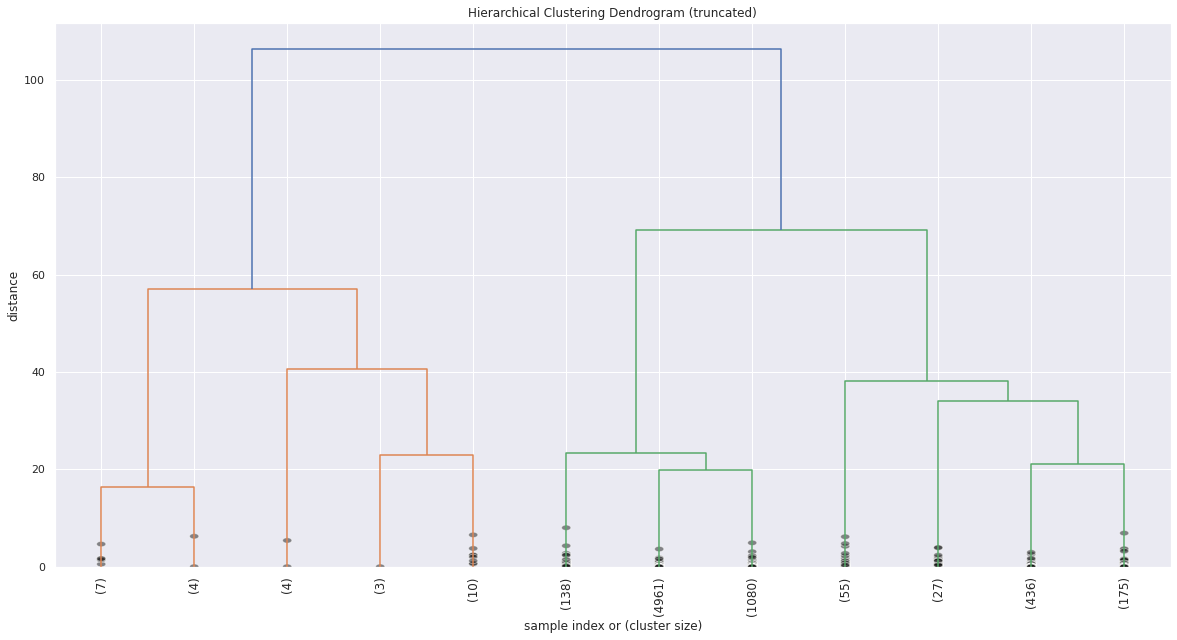

In [200]:
plt.figure(figsize=(20, 10))
# выводим размеры кластеров

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_alter,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,   # to get a distribution impression in truncated branches
)
plt.show()

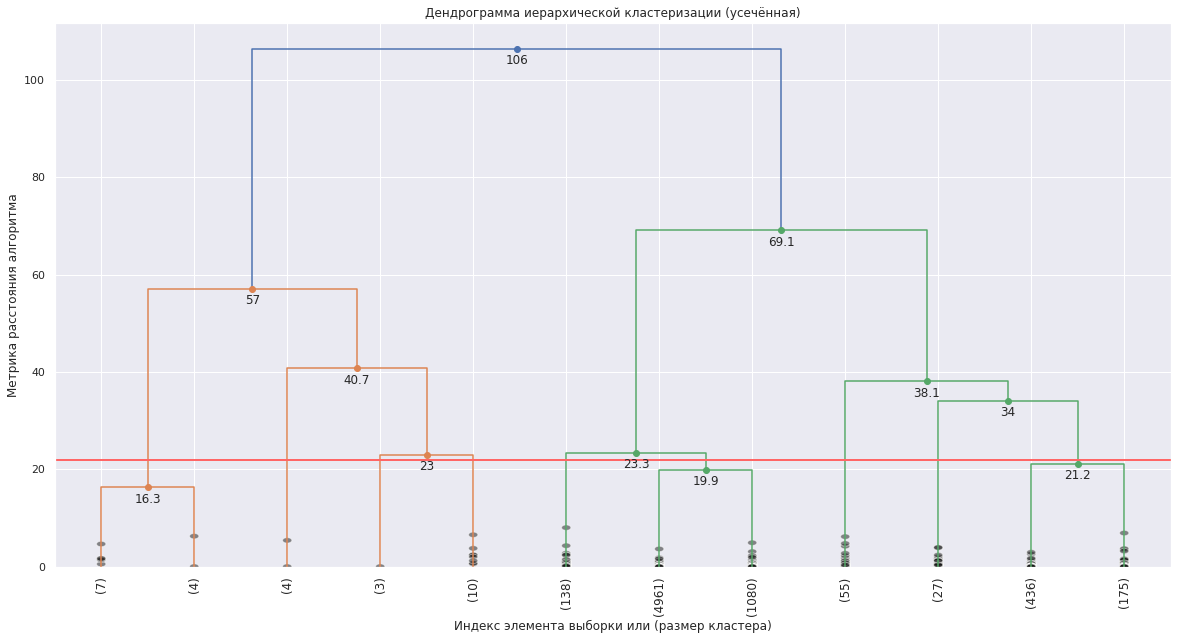

In [201]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z_alter,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)

plt.axhline(22, color='#ff6666', linestyle='-', linewidth=2)

# plt.savefig(PATH + "Full_analysis/clustering_tree.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [202]:
plt.rcParams["figure.figsize"] = [14, 10]

[1 2 3 4 5 6 7 8 9]


Text(0, 0.5, 'Количество медиаконтента в публикациях')

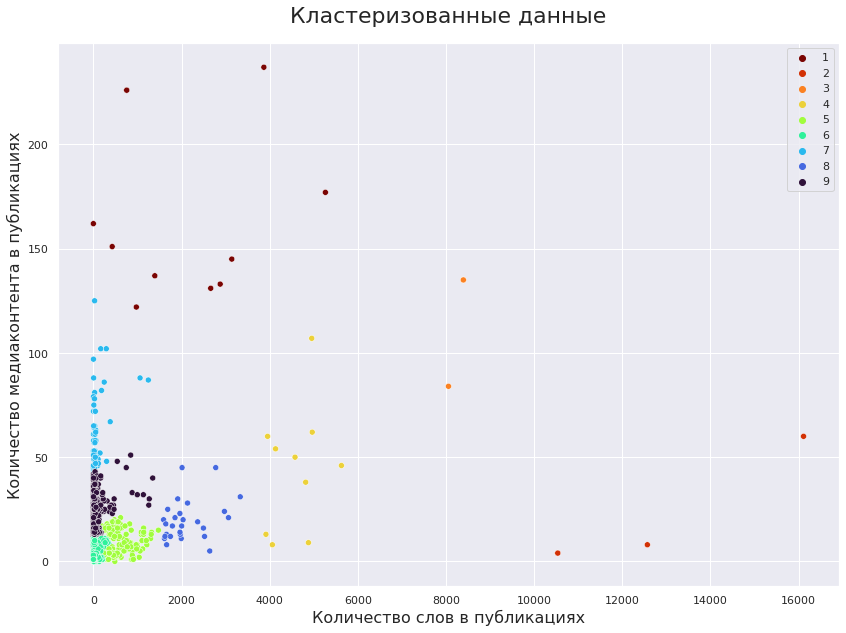

In [203]:
# Зная расстояние
from scipy.cluster.hierarchy import fcluster
max_d = 22
clusters = fcluster(Z_alter, max_d, criterion='distance')
print(np.unique(clusters))
sns.scatterplot(x=X_alter[:,0], y=X_alter[:,1], hue=clusters, palette='turbo_r', legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество слов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)

# plt.savefig(PATH + "Full_analysis/clustered_data.jpg", dpi=300, bbox_inches='tight')

- Заметка
- Статья
- Лонгрид
- Супер_лонгрид_1
- Супер_лонгрид_2
- Ультра_лонгрид
- Подборка
- Супер_подборка
- Супер_медиа_лонгрид

In [204]:
df.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  comments_count  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...              19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...               7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...               5   

   favorites_count  hits_count  is_repost  likes            subsite  ...  \
0               32        1969       True     36              Офтоп  ...   
1               47         659       True     56    Алексей Фёдоров  ...   
2               23         744       True     49    Алексей Фёдоров  ...   
3               18         236       True     41    Алексей Фёдоров  ...   
4                8         180       True     15  Олег Кубанеишвили  ...   

  videos  links audio total_mediacontent               hashtags hour month  \
0      3      0     0                 45                [#long]   21     3   
1      0      0     0                 17               [#anime]   20     1   
2      0      0     0                 32  [#anime, #evangelion]   19     2   
3      0      1     0                 20               [#anime]   18     2   
4      0      0     0                 17                     []   10     3   

    weekday is_weekend   period  
0    Monday          0  2018-03  
1    Sunday          1  2020-01  
2   Tuesday          0  2020-02  
3  Saturday          1  2020-02  
4    Monday          0  2020-03  

[5 rows x 32 columns]

In [205]:
clusters

array([8, 9, 9, ..., 9, 6, 6], dtype=int32)

In [206]:
df = df.assign(type_of_post=pd.Series(clusters).values)

In [207]:
df.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  comments_count  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...              19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...               7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...               5   

   favorites_count  hits_count  is_repost  likes            subsite  ...  \
0               32        1969       True     36              Офтоп  ...   
1               47         659       True     56    Алексей Фёдоров  ...   
2               23         744       True     49    Алексей Фёдоров  ...   
3               18         236       True     41    Алексей Фёдоров  ...   
4                8         180       True     15  Олег Кубанеишвили  ...   

  links  audio total_mediacontent               hashtags hour month   weekday  \
0     0      0                 45                [#long]   21     3    Monday   
1     0      0                 17               [#anime]   20     1    Sunday   
2     0      0                 32  [#anime, #evangelion]   19     2   Tuesday   
3     1      0                 20               [#anime]   18     2  Saturday   
4     0      0                 17                     []   10     3    Monday   

   is_weekend   period  type_of_post  
0           0  2018-03             8  
1           1  2020-01             9  
2           0  2020-02             9  
3           1  2020-02             9  
4           0  2020-03             5  

[5 rows x 33 columns]

<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

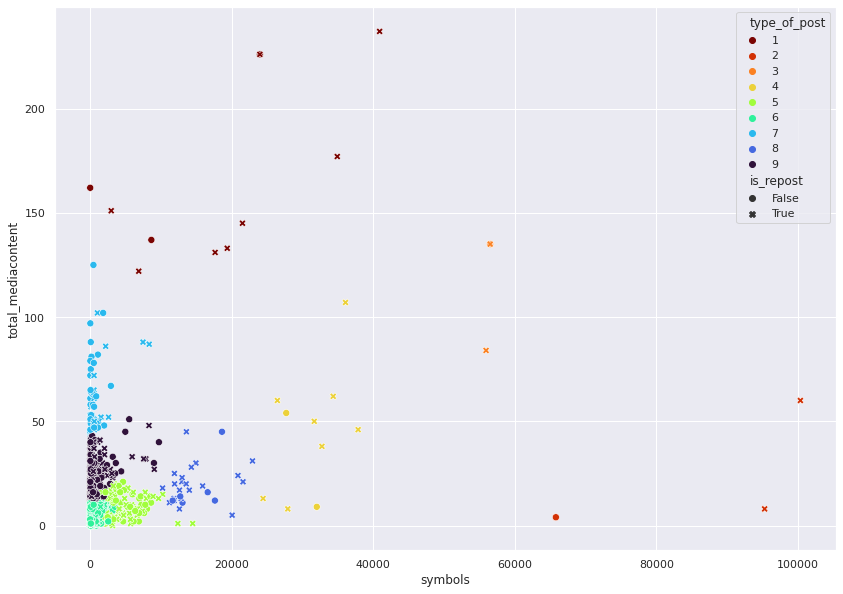

In [208]:
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

<AxesSubplot:xlabel='words', ylabel='total_mediacontent'>

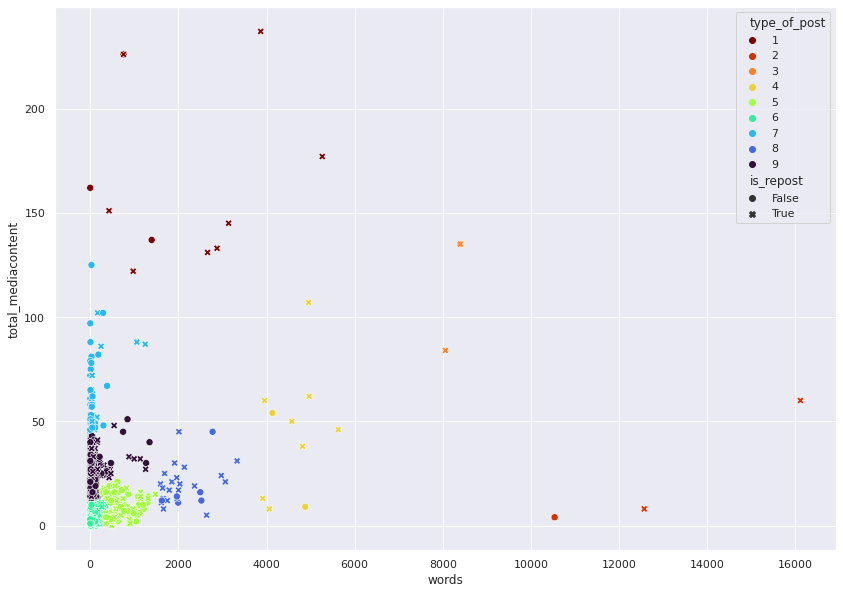

In [209]:
sns.scatterplot(x=df.words, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

## Попытки построить поверхность. Неудачные.

In [ ]:
# df[df.symbols > 40000]

In [ ]:
# df[sum([df.images, df.videos, df.links]) > 150]

In [ ]:
# len(x_scaled)

In [ ]:
# x_scaled.reshape(6177)

In [ ]:
# # import pandas as pd
# # from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# from scipy.interpolate import griddata

# # x,y,z = df.symbols, sum([df.images, df.videos, df.links]), df.likes
# xyz = {'x': x_scaled.reshape(6177), 'y': y_scaled.reshape(6177), 'z': z_scaled.reshape(6177)}

# df_plotting = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# # fig = plt.figure(figsize=(12, 8))
# # ax = Axes3D(fig, azim=-115, elev=15)
# # ax.plot_trisurf(df_plotting.x, df_plotting.y, df_plotting.z, cmap=cm.jet, linewidth=0.2)
# # plt.show()

# x1 = np.linspace(df_plotting['x'].min(), df_plotting['x'].max(), len(df_plotting['x'].unique()))
# y1 = np.linspace(df_plotting['y'].min(), df_plotting['y'].max(), len(df_plotting['y'].unique()))

# x2, y2 = np.meshgrid(x1, y1)

# # Interpolate unstructured D-dimensional data.
# z2 = griddata((df_plotting['x'], df_plotting['y']), df_plotting['z'], (x2, y2), method='cubic')

# # Ready to plot
# # z2
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
#                        linewidth=0, antialiased=False, vmin=np.nanmin(z2), vmax=np.nanmax(z2))
# # ax.set_zlim(-1.01, 1.01)

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.title('Meshgrid Created from 3 1D Arrays')

# plt.show()

Эксперимент с построением 3Д-графика можно считать провалившимся. Слишком разная плотность точек, поэтому поверхность получается очень неровной. Хотя, 3Д диаграмма рассеяния, в принципе, неплоха. Только нужно добавить цвета и будет более-менее неплохо. 

https://stackoverflow.com/questions/52444555/seaborn-scatterplot-legend-not-showing

https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot



https://plotly.com/python/pie-charts/

https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

https://plotly.com/python/sunburst-charts/

https://stackoverflow.com/questions/62469436/python-plotly-sunburst-graph-opens-empty-page

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

https://stackoverflow.com/questions/55806320/how-to-add-box-and-label-to-pie-graph-exactly-as-shown-in-figure-below

https://stackoverflow.com/questions/59153347/matplotlib-pie-donut-chart-annotation-text-size

```python
from matplotlib import gridspec

custpref=pd.DataFrame({'tov_type':['Inpatient','Office Visit','Appointment Schedule','Allergy Sheet'],'count':[7,6,1,1]})

fig=plt.figure(figsize=(6,4))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
gs2 = gridspec.GridSpec(1,1,
    left=0.05,right=0.95,
    bottom=0.9,top=1.0,
)

pie_ax=fig.add_subplot(gs1[0])
title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
colors = ["#6287da","#72ac5c","#8653aa","#bb7438","#b94b75"]

# Create a pie chart
wedges, texts = pie_ax.pie(
    # using data total)arrests
    custpref['count'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with the start angle at 90%
    startangle=90,
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,"color":colors[i]})
    pie_ax.annotate(custpref['tov_type'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

# View the plot drop above
pie_ax.axis('equal')


title_ax.set_facecolor('k')

title_ax.text(0.5,0.5,"Top 5 Visit Types                  Total = 15 Visits",
    ha="center",va="center",transform=title_ax.transAxes,color="w")

for side in ['top', 'bottom', 'left', 'right']:
    title_ax.spines[side].set_visible(False)
title_ax.axes.get_xaxis().set_visible(False)    
title_ax.axes.get_yaxis().set_visible(False)    

plt.show()
```

In [ ]:
df.head()

In [ ]:
df.groupby(['is_repost', 'author_type']).agg({'id': "count"})

In [ ]:
df.groupby(['is_repost', 'author_type'], as_index=False).agg({'id': "count"})

### Эксперименты с plotly

In [ ]:
# # Import the necessaries libraries
# import plotly.offline as pyo
# import plotly.graph_objs as go
# import plotly.express as px
# # Set notebook mode to work in offline
# pyo.init_notebook_mode()
# # Create traces
# fig = px.sunburst(tmp, path=['is_repost', 'author_type'], values='id')
# # Plot it and save as basic-line.html
# # pyo.iplot(fig, filename = 'sunburst')

In [ ]:
# print(tmp.author_type.values)
# print(tmp.isRepost.values)
# print(tmp.id.values)

In [ ]:
# import plotly.graph_objects as go

# pprree = ['', '']
# pprree.extend(tmp.author_type.values)

# pre = ['', '']
# pre.extend(tmp.isRepost.values)

# fig =go.Figure(go.Sunburst(
#     labels=pprree,
#     parents=pre,
#     values=tmp.id.values
    
# ))
# # fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

# fig.show()

На 13.03.2021 Эксперимент не удался. 

# Попытки выделить мемы

In [210]:
df.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  comments_count  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...              19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...               7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...               5   

   favorites_count  hits_count  is_repost  likes            subsite  ...  \
0               32        1969       True     36              Офтоп  ...   
1               47         659       True     56    Алексей Фёдоров  ...   
2               23         744       True     49    Алексей Фёдоров  ...   
3               18         236       True     41    Алексей Фёдоров  ...   
4                8         180       True     15  Олег Кубанеишвили  ...   

  links  audio total_mediacontent               hashtags hour month   weekday  \
0     0      0                 45                [#long]   21     3    Monday   
1     0      0                 17               [#anime]   20     1    Sunday   
2     0      0                 32  [#anime, #evangelion]   19     2   Tuesday   
3     1      0                 20               [#anime]   18     2  Saturday   
4     0      0                 17                     []   10     3    Monday   

   is_weekend   period  type_of_post  
0           0  2018-03             8  
1           1  2020-01             9  
2           0  2020-02             9  
3           1  2020-02             9  
4           0  2020-03             5  

[5 rows x 33 columns]

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900 entries, 0 to 6899
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     6900 non-null   datetime64[ns]
 1   id                       6900 non-null   int64         
 2   url                      6900 non-null   object        
 3   author                   6900 non-null   object        
 4   comments_count           6900 non-null   int64         
 5   favorites_count          6900 non-null   int64         
 6   hits_count               6900 non-null   int64         
 7   is_repost                6900 non-null   bool          
 8   likes                    6900 non-null   int64         
 9   subsite                  6900 non-null   object        
 10  title                    3516 non-null   object        
 11  type                     6900 non-null   int64         
 12  blocks                   6900 non-

In [212]:
tmp = df.groupby(['type_of_post']).agg({'id': 'count'})
tmp

id
type_of_post      
1               11
2                4
3                3
4               10
5              138
6             6041
7               55
8               27
9              611

In [213]:
tmp_2 = df[(df.type_of_post == 6) & (df.total_mediacontent == 1) & (df.symbols < 30)]
tmp_2.shape

(3176, 33)

(0.0, 50.0)

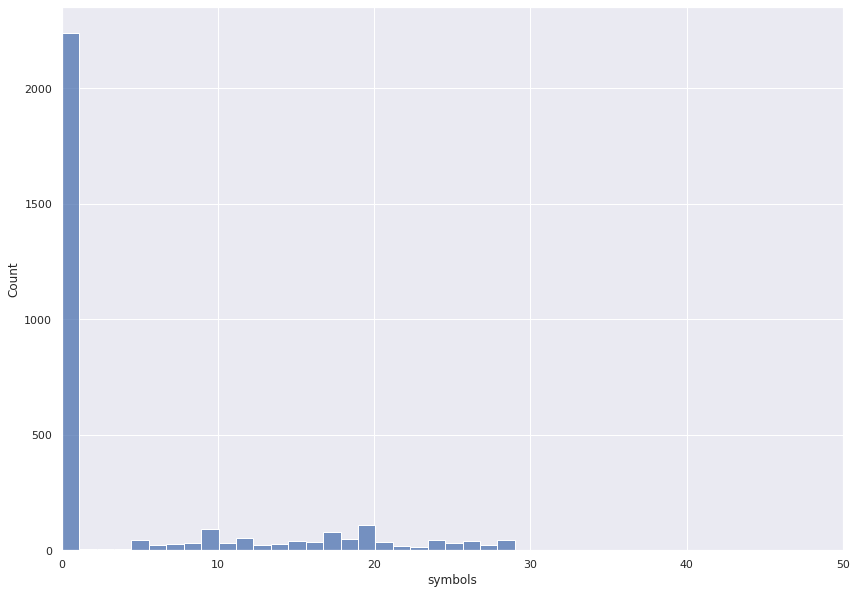

In [214]:
sns.histplot(tmp_2.symbols)
plt.xlim(0, 50)

In [215]:
tmp = df[(df.type_of_post == 6)]

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

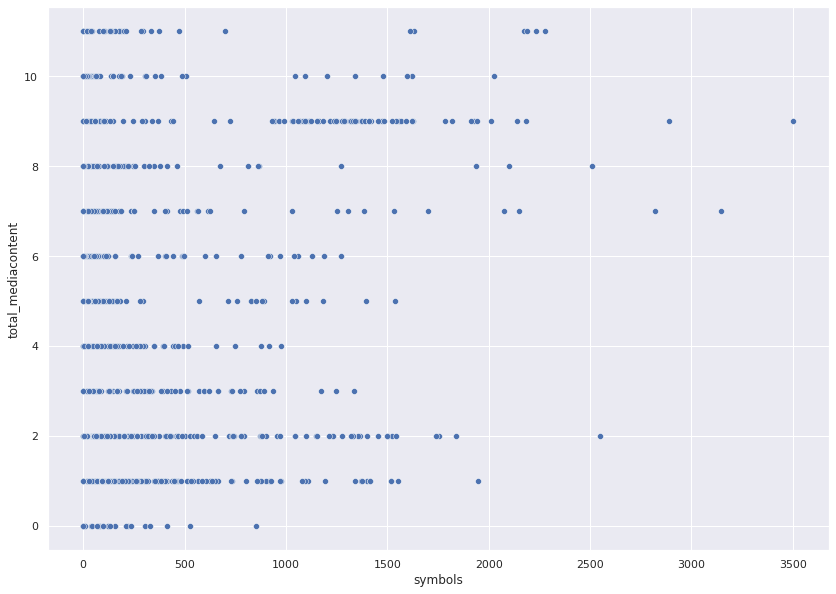

In [216]:
sns.scatterplot(tmp.symbols, tmp.total_mediacontent)

In [217]:
df.type_of_post.unique()

array([8, 9, 5, 6, 1, 7, 2, 3, 4], dtype=int32)

In [218]:
len(df.type_of_post.unique())

9

In [ ]:
# plt.figure(figsize=[16,14])
# sns.scatterplot(x=np.log(df.symbols + 1), y=np.log(df.total_mediacontent +1), hue=df.type_of_post, 
#                 style=df.is_repost, palette='turbo_r', s=50, legend='full')

<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

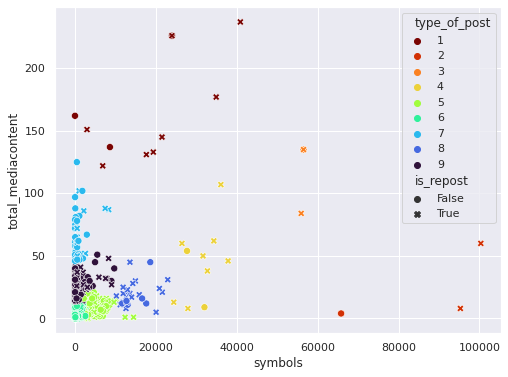

In [219]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [220]:
df_copy = df.copy()

In [221]:
df_copy.replace({'type_of_post': {1: "Ультра-Медиа-Логрид", 2: "Ультра-Логрид", 3: "Супер-Лонгрид-1", 
                                  4: "Супер-Лонгрид-2", 5: "Статья", 6: "Заметка", 
                                  7: "Ультра-Подборка", 8: "Лонгрид", 9: "Подборка"}}, inplace=True)

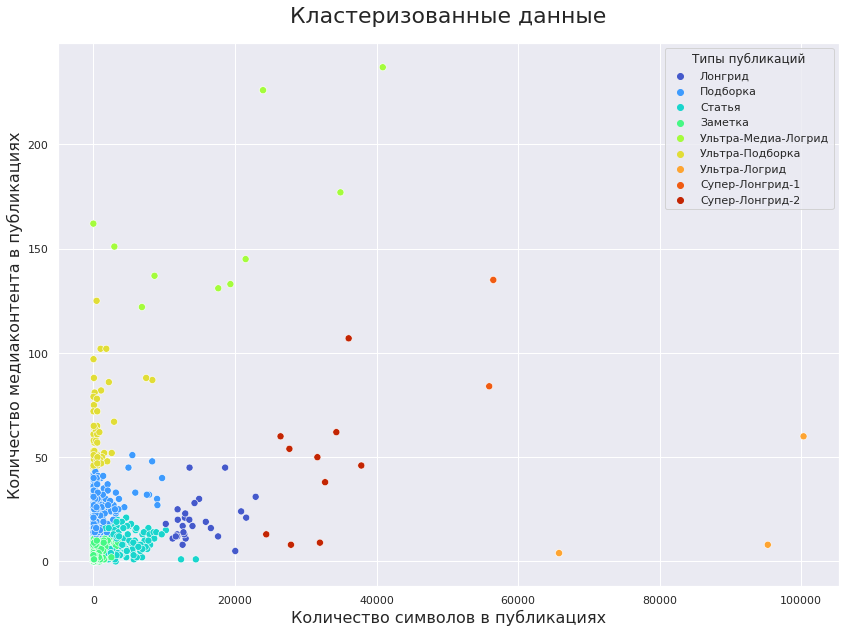

In [222]:
plt.figure(figsize=[14, 10])
sns.scatterplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
                palette='turbo', s=50, legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество символов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)
plt.legend(title='Типы публикаций')

# plt.savefig(PATH + "Full_analysis/clustered_labeled_data.jpg", dpi=300, bbox_inches='tight')

In [223]:
df_copy.loc[df_copy[(df_copy.type_of_post == 'Заметка') & (df_copy.total_mediacontent == 1) & 
                    (df_copy.symbols < 30)].index, 'type_of_post'] = 'Мем'
df_copy.loc[df_copy[(df_copy.type_of_post == "Супер-Лонгрид-1")].index, 'type_of_post'] = "Супер-Лонгрид-2"

In [224]:
df_copy.replace({'type_of_post': {"Супер-Лонгрид-2": "Супер-Лонгрид"}}, inplace=True)

In [225]:
len(df_copy.type_of_post.unique())

9

In [226]:
df_copy.type_of_post.unique()

array(['Лонгрид', 'Подборка', 'Статья', 'Заметка', 'Мем',
       'Ультра-Медиа-Логрид', 'Ультра-Подборка', 'Ультра-Логрид',
       'Супер-Лонгрид'], dtype=object)

<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

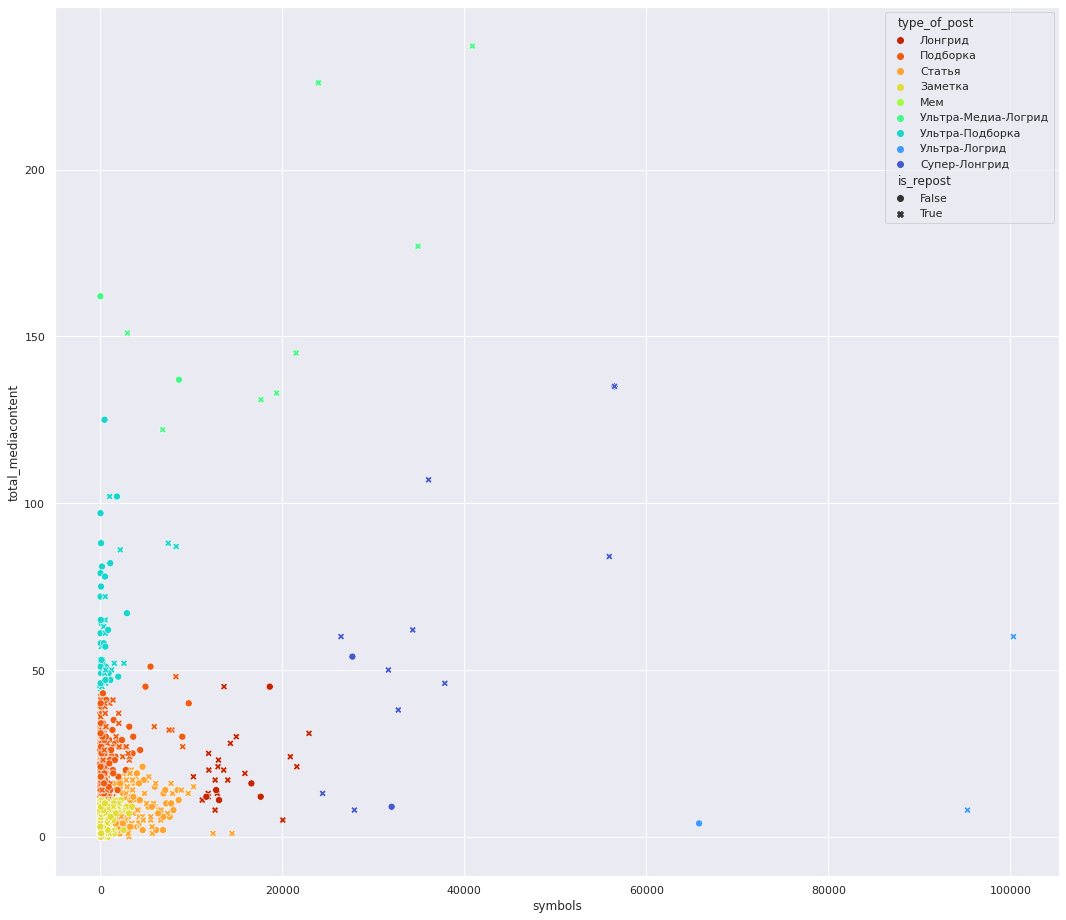

In [227]:
plt.figure(figsize=[18,16])
sns.scatterplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
                style=df_copy.is_repost, palette='turbo_r', s=50, legend='full')

<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

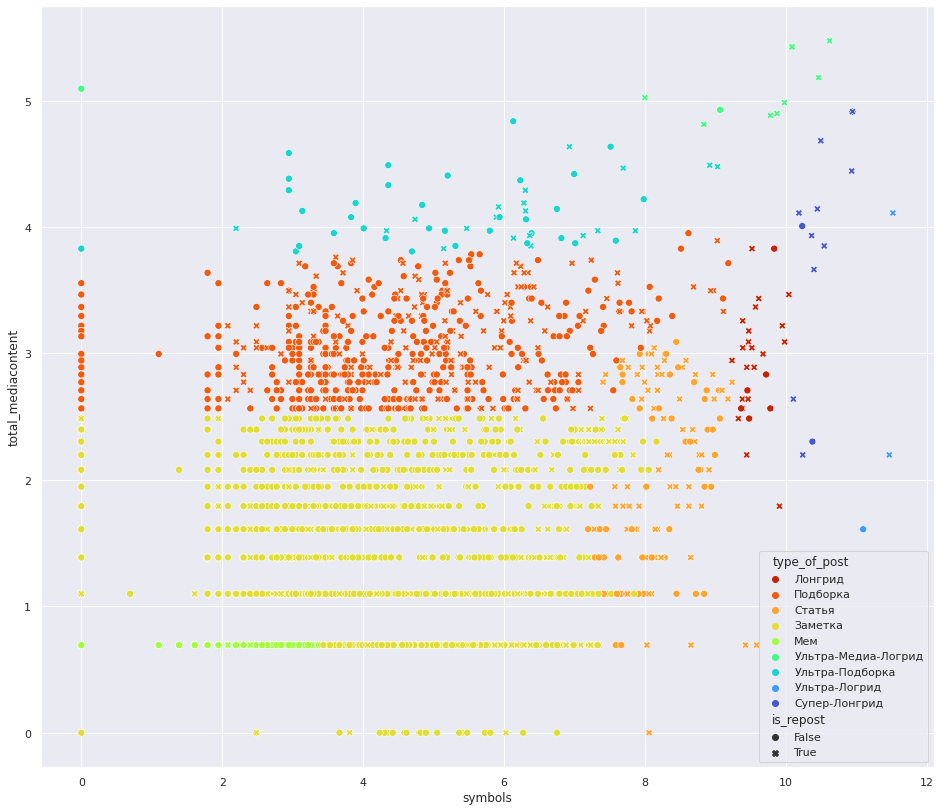

In [228]:
plt.figure(figsize=[16,14])
sns.scatterplot(x=np.log(df_copy.symbols + 1), y=np.log(df_copy.total_mediacontent +1), hue=df_copy.type_of_post, 
                style=df_copy.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
# plt.figure(figsize=[14, 10])
# sns.scatterplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
#                 palette='magma_r', s=25, legend='full')

# plt.title('Кластеризованные данные', fontsize=22, pad=20)
# plt.xlabel('Количество символов в публикациях', fontsize=16)
# plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)
# plt.legend(title='Типы публикаций')

In [229]:
df_copy.type_of_post.unique()

array(['Лонгрид', 'Подборка', 'Статья', 'Заметка', 'Мем',
       'Ультра-Медиа-Логрид', 'Ультра-Подборка', 'Ультра-Логрид',
       'Супер-Лонгрид'], dtype=object)

In [230]:
df_copy[df_copy.type_of_post == 'Мем']

date      id  \
10   2020-07-14 21:34:11  170996   
11   2020-07-14 21:43:51  171001   
12   2020-07-14 22:08:34  171026   
13   2020-07-14 22:25:43  171041   
15   2020-07-14 23:09:38  171080   
...                  ...     ...   
6883 2021-04-02 11:19:27  690764   
6885 2021-04-02 12:03:03  690804   
6886 2021-04-02 13:06:40  690866   
6891 2021-04-02 15:39:11  691019   
6892 2021-04-02 16:10:11  691050   

                                                    url  \
10                https://dtf.ru/s/weaboo/170996-milota   
11                https://dtf.ru/s/weaboo/171001-satdog   
12                       https://dtf.ru/s/weaboo/171026   
13    https://dtf.ru/s/weaboo/171041-kisyaglyavya-ob...   
15                       https://dtf.ru/s/weaboo/171080   
...                                                 ...   
6883  https://dtf.ru/s/weaboo/690764-esli-by-hasagi-...   
6885                     https://dtf.ru/s/weaboo/690804   
6886                     https://dtf.ru/s/weaboo/690866   
6891                     https://dtf.ru/s/weaboo/691019   
6892                     https://dtf.ru/s/weaboo/691050   

                                                 author  comments_count  \
10    {'id': 162369, 'url': 'https://dtf.ru/u/162369...               6   
11    {'id': 127404, 'url': 'https://dtf.ru/u/127404...               1   
12    {'id': 69160, 'url': 'https://dtf.ru/u/69160-s...               0   
13    {'id': 127404, 'url': 'https://dtf.ru/u/127404...               5   
15    {'id': 212847, 'url': 'https://dtf.ru/u/212847...               0   
...                                                 ...             ...   
6883  {'id': 124435, 'url': 'https://dtf.ru/u/124435...               3   
6885  {'id': 212847, 'url': 'https://dtf.ru/u/212847...               7   
6886  {'id': 339219, 'url': 'https://dtf.ru/u/339219...               2   
6891  {'id': 305029, 'url': 'https://dtf.ru/u/305029...              12   
6892  {'id': 338383, 'url': 'https://dtf.ru/u/338383...               1   

      favorites_count  hits_count  is_repost  likes subsite  ... links  audio  \
10                  1         107      False     18   Виабу  ...     0      0   
11                  1         130      False     20   Виабу  ...     0      0   
12                  2          30      False     17   Виабу  ...     0      0   
13                  2         202      False     23   Виабу  ...     0      0   
15                  1          80      False     21   Виабу  ...     0      0   
...               ...         ...        ...    ...     ...  ...   ...    ...   
6883                5         193      False     20   Виабу  ...     0      0   
6885                6         199      False     33   Виабу  ...     0      0   
6886                1          89      False     21   Виабу  ...     0      0   
6891                4         235      False     22   Виабу  ...     0      0   
6892                2          71      False     12   Виабу  ...     0      0   

     total_mediacontent              hashtags hour month  weekday  is_weekend  \
10                    1                    []   21     7  Tuesday           0   
11                    1                    []   21     7  Tuesday           0   
12                    1                    []   22     7  Tuesday           0   
13                    1                    []   22     7  Tuesday           0   
15                    1                    []   23     7  Tuesday           0   
...                 ...                   ...  ...   ...      ...         ...   
6883                  1  [#somemanga, #manga]   11     4   Friday           0   
6885                  1                    []   12     4   Friday           0   
6886                  1                    []   13     4   Friday           0   
6891                  1                    []   15     4   Friday           0   
6892                  1                    []   16     4   Friday           0   

       period  type_of_post  
1

(3176, 33)


/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

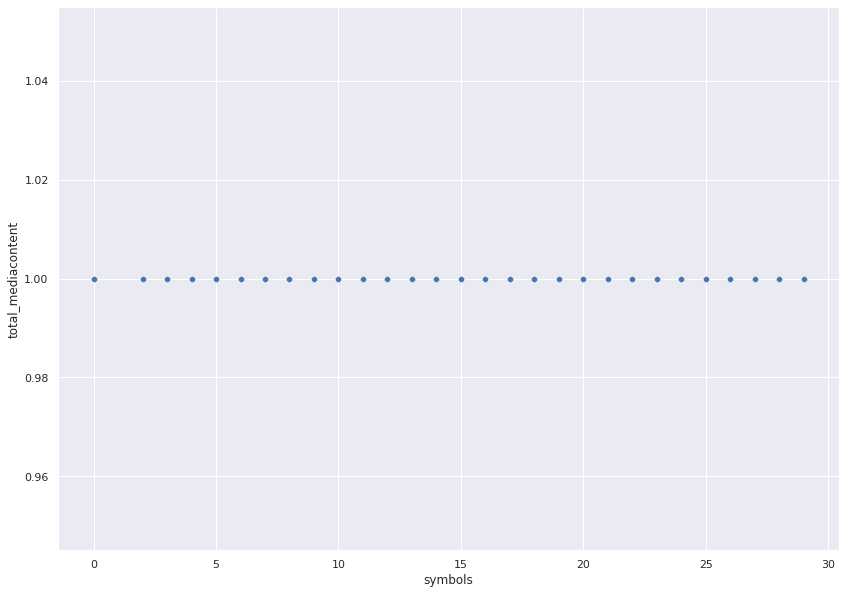

In [231]:
tmp = df_copy[(df_copy.type_of_post == 'Мем')]
print(tmp.shape)
sns.scatterplot(tmp.symbols, tmp.total_mediacontent)

---

---

---

In [232]:
df.type_of_post.unique()

array([8, 9, 5, 6, 1, 7, 2, 3, 4], dtype=int32)

<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

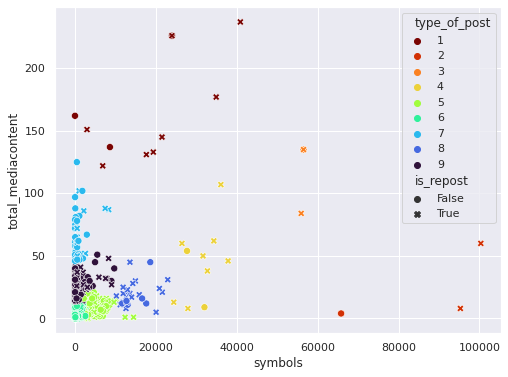

In [233]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [234]:
df.replace({'type_of_post': {1: "Ультра-Медиа-Логрид", 2: "Ультра-Логрид", 3: "Супер-Лонгрид-1", 
                                  4: "Супер-Лонгрид-2", 5: "Статья", 6: "Заметка", 
                                  7: "Ультра-Подборка", 8: "Лонгрид", 9: "Подборка"}}, inplace=True)

In [235]:
df.type_of_post.unique()

array(['Лонгрид', 'Подборка', 'Статья', 'Заметка', 'Ультра-Медиа-Логрид',
       'Ультра-Подборка', 'Ультра-Логрид', 'Супер-Лонгрид-1',
       'Супер-Лонгрид-2'], dtype=object)

<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

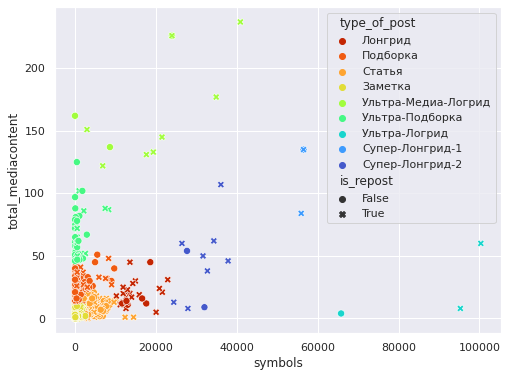

In [236]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [237]:
# ДЛЯ ПОСТРОЕНИЯ НОРМАЛЬНОГО ГРАФИКА ВЫБРАН ПОРОГ ПО СИМВОЛАМ: 100. 
# ЗАМЕНИТЬ НА 30 ПОСЛЕ ПОСТРОЕНИЯ ГРАФИКА

df.loc[df[(df.type_of_post == 'Заметка') & (df.total_mediacontent == 1) & 
                    (df.symbols < 30)].index, 'type_of_post'] = 'Мем'
df.loc[df[(df.type_of_post == "Супер-Лонгрид-1")].index, 'type_of_post'] = "Супер-Лонгрид-2"
df.replace({'type_of_post': {"Супер-Лонгрид-2": "Супер-Лонгрид"}}, inplace=True)

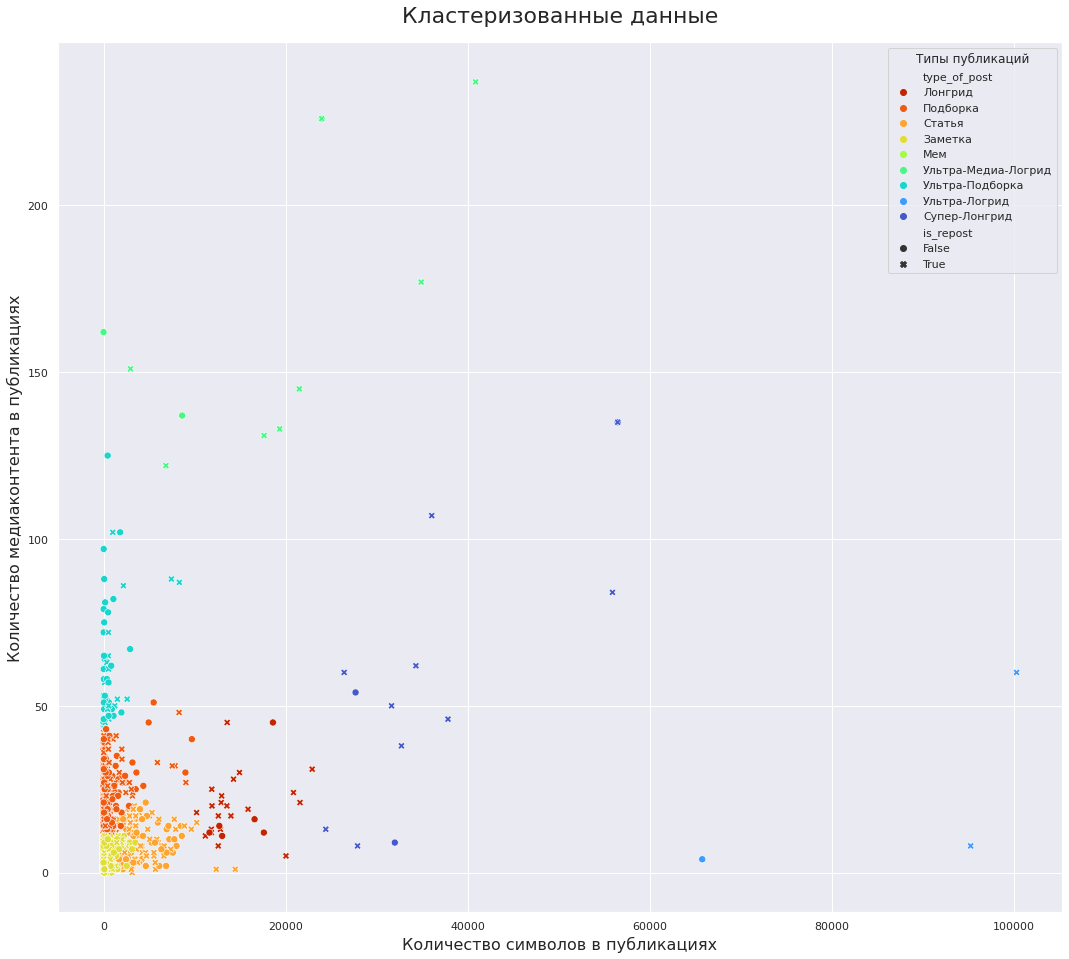

In [238]:
plt.figure(figsize=[18,16])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество символов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)
plt.legend(title='Типы публикаций', )

# plt.savefig(PATH + "Full_analysis/clustered_labeled_data_final.jpg", dpi=300, bbox_inches='tight')

In [239]:
df[df.type_of_post == 'Мем'].shape

(3176, 33)

In [240]:
len("Интересно, в этой строке наберётся сто символов или нет?")

56

In [241]:
print(df.type_of_post.value_counts())
print('\n')
print(df.type_of_post.value_counts().index)
print('\n')
print(df.type_of_post.value_counts().values)

Мем                    3176
Заметка                2865
Подборка                611
Статья                  138
Ультра-Подборка          55
Лонгрид                  27
Супер-Лонгрид            13
Ультра-Медиа-Логрид      11
Ультра-Логрид             4
Name: type_of_post, dtype: int64


Index(['Мем', 'Заметка', 'Подборка', 'Статья', 'Ультра-Подборка', 'Лонгрид',
       'Супер-Лонгрид', 'Ультра-Медиа-Логрид', 'Ультра-Логрид'],
      dtype='object')


[3176 2865  611  138   55   27   13   11    4]


In [242]:
tmp = df.type_of_post.value_counts()
tmp

Мем                    3176
Заметка                2865
Подборка                611
Статья                  138
Ультра-Подборка          55
Лонгрид                  27
Супер-Лонгрид            13
Ультра-Медиа-Логрид      11
Ультра-Логрид             4
Name: type_of_post, dtype: int64

In [243]:
tmp.values.sum()

6900

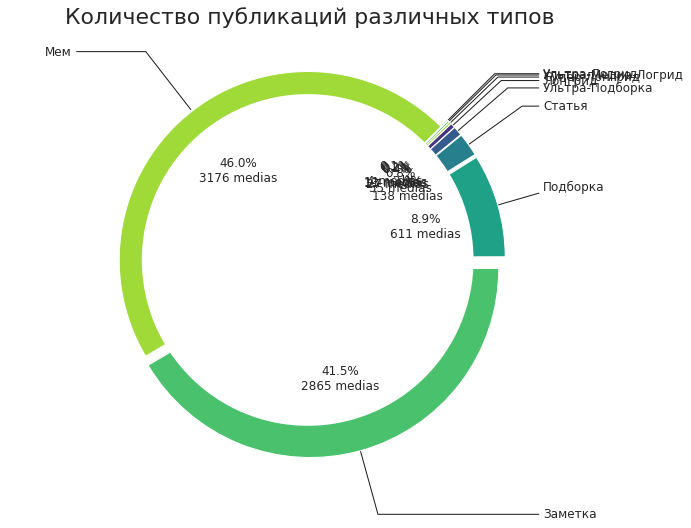

In [245]:
sns.set_palette("viridis_r")

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} medias".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = tmp.index 

# Create a pie chart
wedges = pie_ax.pie(
    tmp.values,
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp.values), 
    explode=(0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.88, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Количество публикаций различных типов', fontsize=22, pad=26)

plt.axis('equal')

plt.savefig(PATH + "Full_analysis/medias.jpg", dpi=300, bbox_inches='tight')

plt.show()

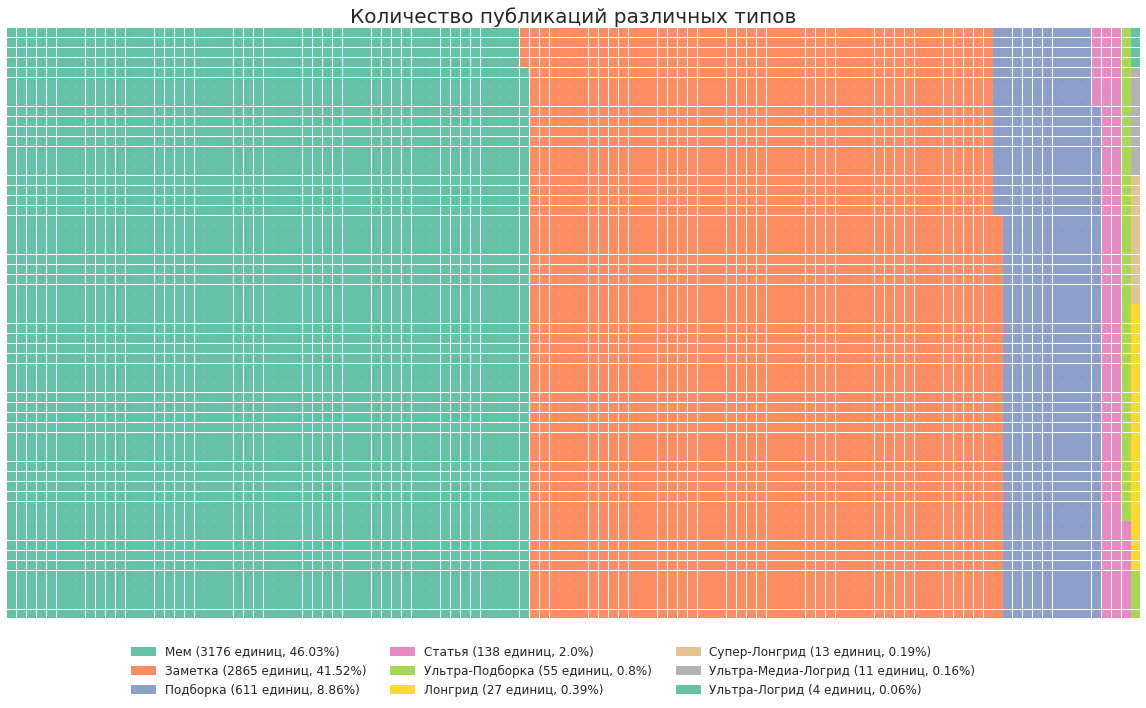

In [256]:
from pywaffle import Waffle

labels = tmp.index
d = {lab: val for lab, val in zip(labels, tmp.values)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=60, 
    values=list(tmp.values),
#     labels=labels,
    title={
        'label': 'Количество публикаций различных типов',
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
#     labels=[f"{k} ({int(v / sum(d.values()) * 100)}%)" for k, v in d.items()],
    legend={
        'labels': [f"{k} ({v} единиц, {round(v/sum(d.values())*100,2)}%)" for k, v in d.items()],  # labels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0.1, -0.15),
        'ncol': 3,
        'framealpha': 0,
        'fontsize': 12
    },
    figsize=(35, 10),
#     legend={'bbox_to_anchor': (1.3, 0.85)}    
)
# plt.savefig(PATH + "Full_analysis/types_of_posts.jpg", dpi=300, bbox_inches='tight')

In [248]:
tmp

Мем                    3176
Заметка                2865
Подборка                611
Статья                  138
Ультра-Подборка          55
Лонгрид                  27
Супер-Лонгрид            13
Ультра-Медиа-Логрид      11
Ультра-Логрид             4
Name: type_of_post, dtype: int64

In [249]:
(tmp.values[0]) / tmp.values.sum()

0.4602898550724638

In [257]:
df.to_csv(PATH + 'Full_analysis/Full_weaboo_data_02_04.csv')

---


---


---


Text(467.2509868055556, 0.5, 'Количество медиаконтента')

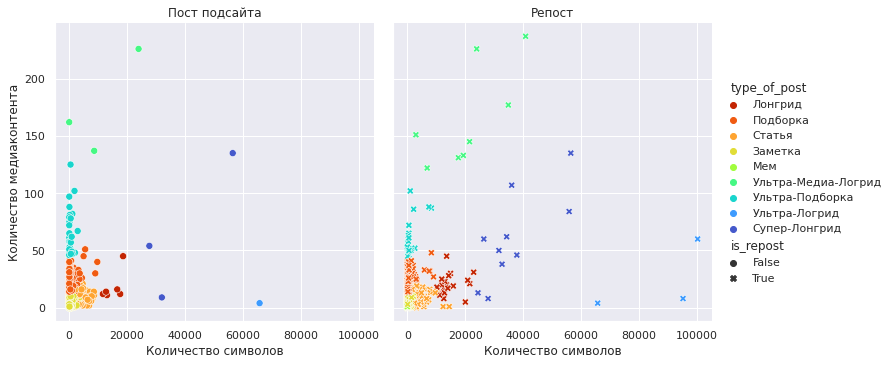

<Figure size 1440x1152 with 0 Axes>

In [258]:
plot = sns.relplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
                   col=df_copy.is_repost, style=df_copy.is_repost, palette='turbo_r', s=50, legend='full')

plt.figure(figsize=[20, 16])
axes = plot.axes.flatten()

axes[0].set_title("Пост подсайта")
axes[0].set_xlabel('Количество символов')
axes[0].set_ylabel('Количество медиаконтента')

axes[1].set_title("Репост")
axes[1].set_xlabel('Количество символов')
axes[1].set_ylabel('Количество медиаконтента')

# plt.savefig(PATH + "Full_analysis/compared_types_of_posts.jpg", dpi=300, bbox_inches='tight')

In [259]:
len(df.type_of_post.unique())

9

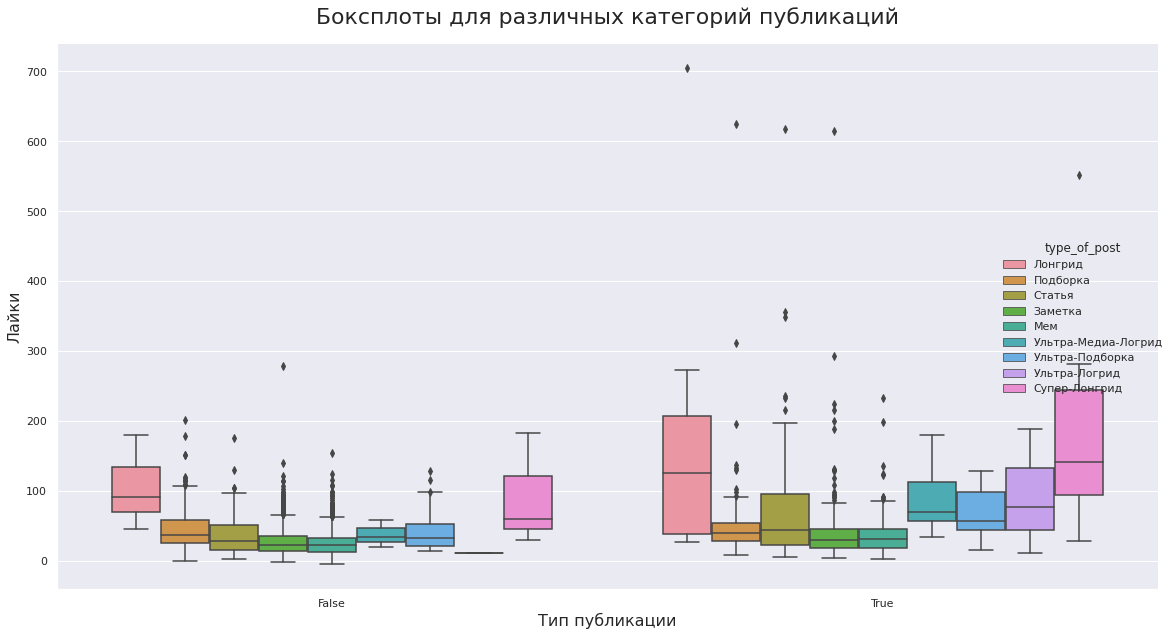

In [260]:
sns.catplot(data=df, x='is_repost', y='likes', hue='type_of_post', kind='box', height=9, aspect=14/9)
plt.xlabel('Тип публикации', fontsize=16)
plt.ylabel('Лайки', fontsize=16)
plt.title('Боксплоты для различных категорий публикаций', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/box_likes_1.jpg", dpi=300, bbox_inches='tight')

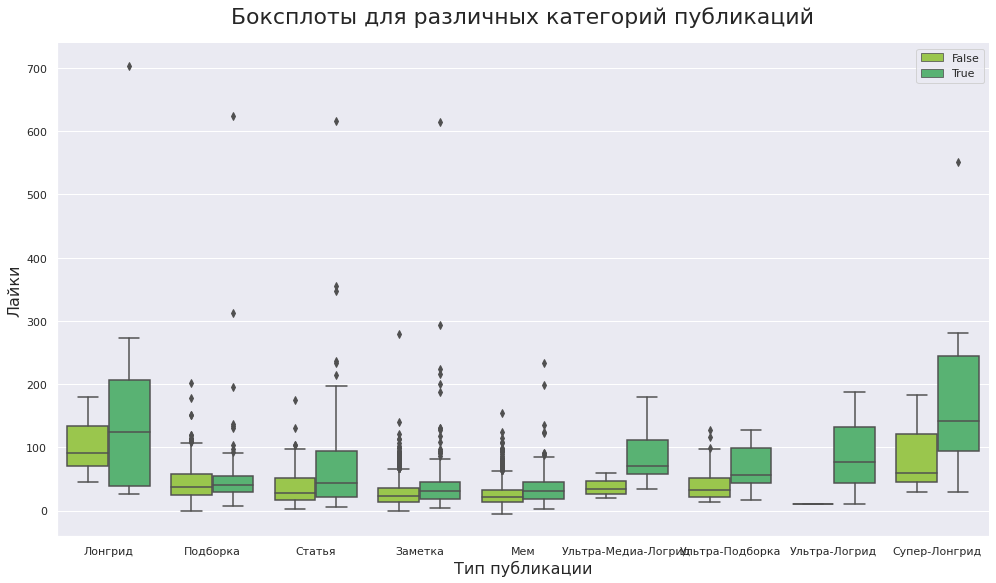

In [261]:
sns.catplot(data=df, x='type_of_post', y='likes', hue='is_repost', kind='box', 
            height=8.27, aspect=14/8.27, legend=False)
plt.xlabel('Тип публикации', fontsize=16)
plt.ylabel('Лайки', fontsize=16)
plt.title('Боксплоты для различных категорий публикаций', fontsize=22, pad=20)
plt.legend(loc='upper right')
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/box_likes_2.jpg", dpi=300, bbox_inches='tight')

(0.0, 15000.0)

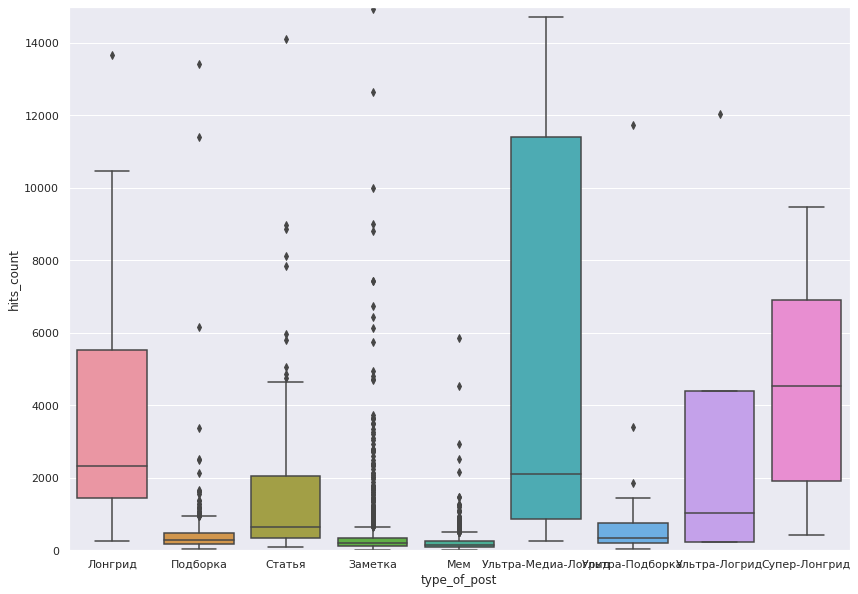

In [263]:
sns.boxplot(data=df, x='type_of_post', y='hits_count')
plt.ylim(0, 15000)

<AxesSubplot:xlabel='type_of_post', ylabel='comments_count'>

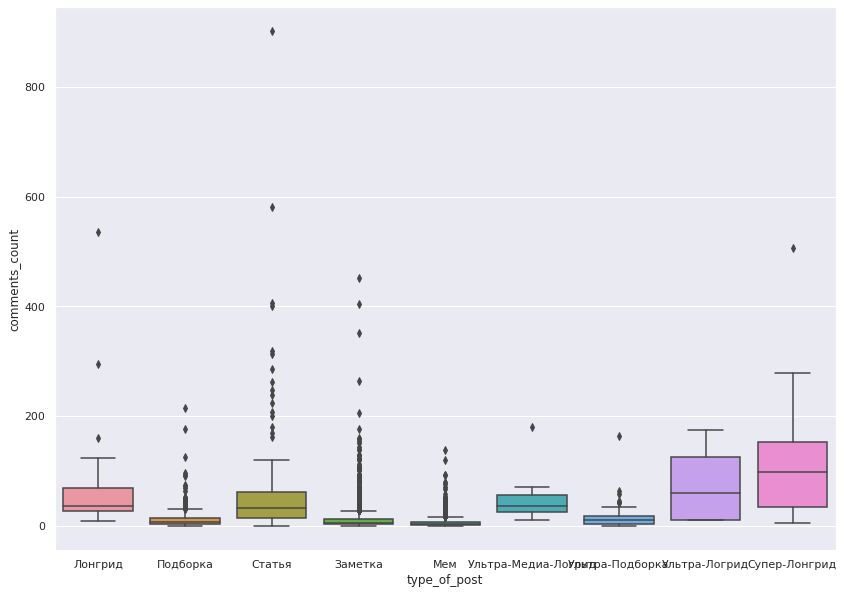

In [264]:
sns.boxplot(data=df, x='type_of_post', y='comments_count')

# Регрессия

In [ ]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [ ]:
# df = pd.read_csv(PATH + 'Full_analysis/Full_weaboo_data_02_04.csv', index_col=0)
# df.head()

In [265]:
df.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  comments_count  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...              19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...               7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...               5   

   favorites_count  hits_count  is_repost  likes            subsite  ...  \
0               32        1969       True     36              Офтоп  ...   
1               47         659       True     56    Алексей Фёдоров  ...   
2               23         744       True     49    Алексей Фёдоров  ...   
3               18         236       True     41    Алексей Фёдоров  ...   
4                8         180       True     15  Олег Кубанеишвили  ...   

  links  audio total_mediacontent               hashtags hour month   weekday  \
0     0      0                 45                [#long]   21     3    Monday   
1     0      0                 17               [#anime]   20     1    Sunday   
2     0      0                 32  [#anime, #evangelion]   19     2   Tuesday   
3     1      0                 20               [#anime]   18     2  Saturday   
4     0      0                 17                     []   10     3    Monday   

   is_weekend   period  type_of_post  
0           0  2018-03       Лонгрид  
1           1  2020-01      Подборка  
2           0  2020-02      Подборка  
3           1  2020-02      Подборка  
4           0  2020-03        Статья  

[5 rows x 33 columns]

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900 entries, 0 to 6899
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     6900 non-null   datetime64[ns]
 1   id                       6900 non-null   int64         
 2   url                      6900 non-null   object        
 3   author                   6900 non-null   object        
 4   comments_count           6900 non-null   int64         
 5   favorites_count          6900 non-null   int64         
 6   hits_count               6900 non-null   int64         
 7   is_repost                6900 non-null   bool          
 8   likes                    6900 non-null   int64         
 9   subsite                  6900 non-null   object        
 10  title                    3516 non-null   object        
 11  type                     6900 non-null   int64         
 12  blocks                   6900 non-

In [388]:
df.is_repost = df.is_repost.astype(int)

In [389]:
df.columns

Index(['date', 'id', 'url', 'author', 'comments_count', 'favorites_count',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags',
       'hour', 'month', 'weekday', 'is_weekend', 'period', 'type_of_post'],
      dtype='object')

In [415]:
df_reg = df.copy()

In [416]:
df_reg.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  comments_count  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...              19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...               7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...               5   

   favorites_count  hits_count  is_repost  likes            subsite  ...  \
0               32        1969          1     36              Офтоп  ...   
1               47         659          1     56    Алексей Фёдоров  ...   
2               23         744          1     49    Алексей Фёдоров  ...   
3               18         236          1     41    Алексей Фёдоров  ...   
4                8         180          1     15  Олег Кубанеишвили  ...   

  links  audio total_mediacontent               hashtags hour month   weekday  \
0     0      0                 45                [#long]   21     3    Monday   
1     0      0                 17               [#anime]   20     1    Sunday   
2     0      0                 32  [#anime, #evangelion]   19     2   Tuesday   
3     1      0                 20               [#anime]   18     2  Saturday   
4     0      0                 17                     []   10     3    Monday   

   is_weekend   period  type_of_post  
0           0  2018-03       Лонгрид  
1           1  2020-01      Подборка  
2           0  2020-02      Подборка  
3           1  2020-02      Подборка  
4           0  2020-03        Статья  

[5 rows x 33 columns]

In [417]:
df_reg_categorial = pd.get_dummies(df['type_of_post'], drop_first=True, prefix='type')
df_reg = pd.concat([df_reg.drop('type_of_post',axis=1), df_reg_categorial], axis=1)
df_reg.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  comments_count  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...              19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...               7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...               5   

   favorites_count  hits_count  is_repost  likes            subsite  ...  \
0               32        1969          1     36              Офтоп  ...   
1               47         659          1     56    Алексей Фёдоров  ...   
2               23         744          1     49    Алексей Фёдоров  ...   
3               18         236          1     41    Алексей Фёдоров  ...   
4                8         180          1     15  Олег Кубанеишвили  ...   

  is_weekend   period type_Лонгрид type_Мем type_Подборка type_Статья  \
0          0  2018-03            1        0             0           0   
1          1  2020-01            0        0             1           0   
2          0  2020-02            0        0             1           0   
3          1  2020-02            0        0             1           0   
4          0  2020-03            0        0             0           1   

  type_Супер-Лонгрид  type_Ультра-Логрид type_Ультра-Медиа-Логрид  \
0                  0                   0                        0   
1                  0                   0                        0   
2                  0                   0                        0   
3                  0                   0                        0   
4                  0                   0                        0   

   type_Ультра-Подборка  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 40 columns]

In [418]:
df_reg_cat_weekday = pd.get_dummies(df['weekday'], drop_first=True, prefix='day')
df_reg = pd.concat([df_reg.drop('weekday',axis=1), df_reg_cat_weekday], axis=1)
df_reg.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  comments_count  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...              19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...               7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...               5   

   favorites_count  hits_count  is_repost  likes            subsite  ...  \
0               32        1969          1     36              Офтоп  ...   
1               47         659          1     56    Алексей Фёдоров  ...   
2               23         744          1     49    Алексей Фёдоров  ...   
3               18         236          1     41    Алексей Фёдоров  ...   
4                8         180          1     15  Олег Кубанеишвили  ...   

  type_Супер-Лонгрид  type_Ультра-Логрид type_Ультра-Медиа-Логрид  \
0                  0                   0                        0   
1                  0                   0                        0   
2                  0                   0                        0   
3                  0                   0                        0   
4                  0                   0                        0   

  type_Ультра-Подборка day_Tuesday day_Wednesday day_Thursday  day_Friday  \
0                    0           0             0            0           0   
1                    0           0             0            0           0   
2                    0           1             0            0           0   
3                    0           0             0            0           0   
4                    0           0             0            0           0   

  day_Saturday  day_Sunday  
0            0           0  
1            0           1  
2            0           0  
3            1           0  
4            0           0  

[5 rows x 45 columns]

In [419]:
df_reg.columns

Index(['date', 'id', 'url', 'author', 'comments_count', 'favorites_count',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags',
       'hour', 'month', 'is_weekend', 'period', 'type_Лонгрид', 'type_Мем',
       'type_Подборка', 'type_Статья', 'type_Супер-Лонгрид',
       'type_Ультра-Логрид', 'type_Ультра-Медиа-Логрид',
       'type_Ультра-Подборка', 'day_Tuesday', 'day_Wednesday', 'day_Thursday',
       'day_Friday', 'day_Saturday', 'day_Sunday'],
      dtype='object')

In [420]:
num_vars_wo_target = [#'hits_count', 'comments_count', 'favorites_count',
       'is_repost', 'words', 'images', 'videos', 'links', 'audio', 'total_mediacontent', 
        'hour', 'month', 'is_weekend', 'type_Лонгрид', 'type_Мем',
       'type_Подборка', 'type_Статья', 'type_Супер-Лонгрид',
       'type_Ультра-Логрид', 'type_Ультра-Медиа-Логрид',
       'type_Ультра-Подборка', 'day_Tuesday', 'day_Wednesday', 'day_Thursday',
       'day_Friday', 'day_Saturday', 'day_Sunday']

In [421]:
df_reg = pd.concat([df_reg[num_vars_wo_target], df_reg.likes], axis=1)
df_reg.head()

is_repost  words  images  videos  links  audio  total_mediacontent  hour  \
0          1   2012      42       3      0      0                  45    21   
1          1     29      17       0      0      0                  17    20   
2          1     12      32       0      0      0                  32    19   
3          1     14      19       0      1      0                  20    18   
4          1    726      17       0      0      0                  17    10   

   month  is_weekend  ...  type_Ультра-Логрид  type_Ультра-Медиа-Логрид  \
0      3           0  ...                   0                         0   
1      1           1  ...                   0                         0   
2      2           0  ...                   0                         0   
3      2           1  ...                   0                         0   
4      3           0  ...                   0                         0   

   type_Ультра-Подборка  day_Tuesday  day_Wednesday  day_Thursday  day_Friday  \
0                     0            0              0             0           0   
1                     0            0              0             0           0   
2                     0            1              0             0           0   
3                     0            0              0             0           0   
4                     0            0              0             0           0   

   day_Saturday  day_Sunday  likes  
0             0           0     36  
1             0           1     56  
2             0           0     49  
3             1           0     41  
4             0           0     15  

[5 rows x 25 columns]

In [422]:
df_reg[num_vars_wo_target].head()

is_repost  words  images  videos  links  audio  total_mediacontent  hour  \
0          1   2012      42       3      0      0                  45    21   
1          1     29      17       0      0      0                  17    20   
2          1     12      32       0      0      0                  32    19   
3          1     14      19       0      1      0                  20    18   
4          1    726      17       0      0      0                  17    10   

   month  is_weekend  ...  type_Супер-Лонгрид  type_Ультра-Логрид  \
0      3           0  ...                   0                   0   
1      1           1  ...                   0                   0   
2      2           0  ...                   0                   0   
3      2           1  ...                   0                   0   
4      3           0  ...                   0                   0   

   type_Ультра-Медиа-Логрид  type_Ультра-Подборка  day_Tuesday  day_Wednesday  \
0                         0                     0            0              0   
1                         0                     0            0              0   
2                         0                     0            1              0   
3                         0                     0            0              0   
4                         0                     0            0              0   

   day_Thursday  day_Friday  day_Saturday  day_Sunday  
0             0           0             0           0  
1             0           0             0           1  
2             0           0             0           0  
3             0           0             1           0  
4             0           0             0           0  

[5 rows x 24 columns]

In [423]:
X_train, X_test, y_train, y_test = train_test_split(df_reg.drop(['likes'], axis=1), 
                                                    df_reg['likes'], 
                                                    test_size=0.3)

In [424]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_numeric = scaler.fit_transform(X_train[num_vars_wo_target])
X_test_scaled_numeric = scaler.transform(X_test[num_vars_wo_target])

In [425]:
X_train[num_vars_wo_target] = X_train_scaled_numeric
X_test[num_vars_wo_target] = X_test_scaled_numeric

In [426]:
y_test.head()

268     11
6393    30
447      8
2441    20
6747    34
Name: likes, dtype: int64

In [427]:
X_train.head()

is_repost     words    images    videos     links     audio  \
5394   2.854422  8.821231  0.277524  0.539213 -0.139809 -0.094649   
1695  -0.350334 -0.111487 -0.352037 -0.130643 -0.139809 -0.094649   
6665  -0.350334 -0.107088 -0.456964  0.539213 -0.139809 -0.094649   
5075  -0.350334 -0.107088 -0.247110 -0.130643 -0.139809 -0.094649   
4268   2.854422  0.572599  1.326793  0.539213 -0.139809 -0.094649   

      total_mediacontent      hour     month  is_weekend  ...  \
5394            0.337623  0.177851 -1.674918    1.705218  ...   
1695           -0.371650  1.046779  0.428938   -0.586435  ...   
6665           -0.371650  0.351637 -1.148954   -0.586435  ...   
5075           -0.270325  1.568135 -1.674918   -0.586435  ...   
4268            1.350870 -0.343505  1.217884    1.705218  ...   

      type_Супер-Лонгрид  type_Ультра-Логрид  type_Ультра-Медиа-Логрид  \
5394           23.144474            -0.02879                  -0.02493   
1695           -0.043207            -0.02879                  -0.02493   
6665           -0.043207            -0.02879                  -0.02493   
5075           -0.043207            -0.02879                  -0.02493   
4268           -0.043207            -0.02879                  -0.02493   

      type_Ультра-Подборка  day_Tuesday  day_Wednesday  day_Thursday  \
5394             -0.092527    -0.400972      -0.421618     -0.419913   
1695             -0.092527    -0.400972      -0.421618      2.381443   
6665             -0.092527    -0.400972       2.371817     -0.419913   
5075             -0.092527    -0.400972      -0.421618     -0.419913   
4268             -0.092527    -0.400972      -0.421618     -0.419913   

      day_Friday  day_Saturday  day_Sunday  
5394   -0.441200      2.613083   -0.383401  
1695   -0.441200     -0.382690   -0.383401  
6665   -0.441200     -0.382690   -0.383401  
5075    2.266546     -0.382690   -0.383401  
4268   -0.441200     -0.382690    2.608238  

[5 rows x 24 columns]

In [428]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([30.13768116, 30.13768116, 30.13768116, 30.13768116, 30.13768116])

In [429]:
print_metrics(y_test, y_pred_naive)

MAE: 4.828212345396712e+267
RMSE: inf
R2: -0.0005720591778788364
MAPE: 1.3113821221195854e+16


/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/sklearn/metrics/_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


In [430]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [431]:
print_metrics(y_test, y_pred_regr)

MAE: 4.828212345396712e+267
RMSE: inf
R2: 0.11220680408225359
MAPE: 1.066828226097438e+16


/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/sklearn/metrics/_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


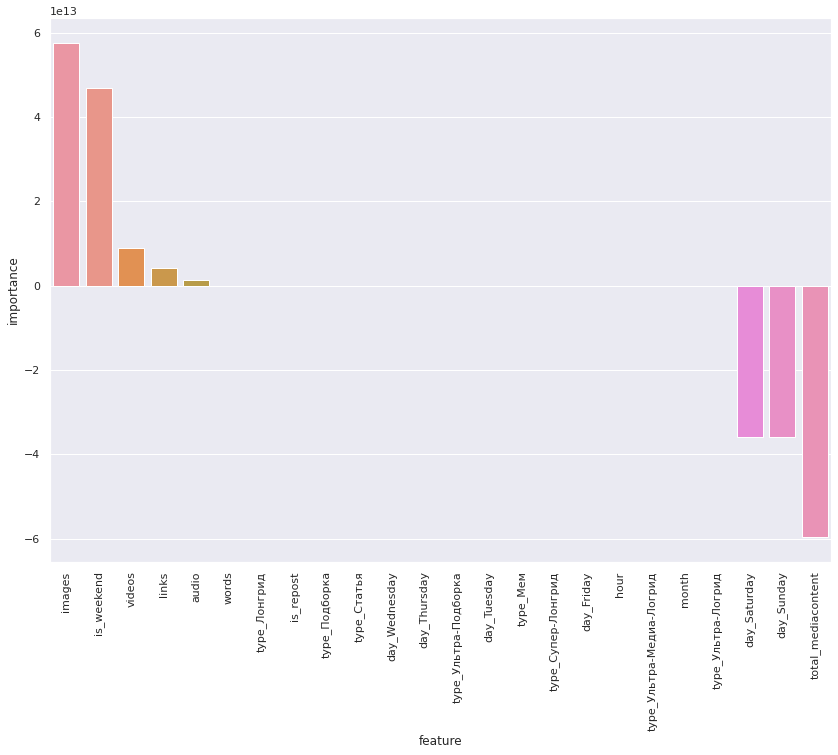

In [432]:
feature_importance = pd.DataFrame({"feature": df_reg.drop('likes',axis=1).columns, 
                                  "importance": model_regression.coef_})

feature_importance.set_index('feature', inplace=True)
feature_importance.sort_values(["importance"], ascending=False, inplace=True)

plt.figure(figsize=(14, 10))
fe = sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

for item in fe.get_xticklabels():
    item.set_rotation(90)

In [433]:
feature_importance

importance
feature                               
images                    5.759998e+13
is_weekend                4.683465e+13
videos                    9.022523e+12
links                     4.143883e+12
audio                     1.401359e+12
words                     1.116693e+01
type_Лонгрид              4.086375e+00
is_repost                 3.823531e+00
type_Подборка             1.893681e+00
type_Статья               1.548188e+00
day_Wednesday             4.154413e-01
day_Thursday              3.479026e-01
type_Ультра-Подборка      1.771416e-01
day_Tuesday               1.133951e-01
type_Мем                 -3.769834e-01
type_Супер-Лонгрид       -4.664760e-01
day_Friday               -4.705752e-01
hour                     -1.600972e+00
type_Ультра-Медиа-Логрид -1.826176e+00
month                    -1.911329e+00
type_Ультра-Логрид       -7.665878e+00
day_Saturday             -3.582674e+13
day_Sunday               -3.587624e+13
total_mediacontent       -5.964771e+13

In [434]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59032.84963223408, tolerance: 322.15492171325053
  model = cd_fast.enet_coordinate_descent(
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19244.45763049042, tolerance: 334.422543995859
  model = cd_fast.enet_coordinate_descent(
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20086.405961892102, tolerance: 326.3926123964804
  model = cd_fast.enet_co

Лучшее значение параметра: {'alpha': 0.05}


In [435]:
grid_cv_lasso.best_estimator_.intercept_, grid_cv_lasso.best_estimator_.coef_

(30.13768115942029,
 array([ 3.87995564,  9.92199395,  3.06710132, -2.69723511,  0.54020706,
        -0.99827485,  0.        , -1.54949263, -1.88652986,  0.69443937,
         4.33896902, -0.35809268,  1.82166429,  1.68793875,  0.        ,
        -6.69336551, -1.71659094,  0.09198043,  0.        ,  0.25122151,
         0.19306862, -0.54528185,  0.50071614,  0.        ]))

In [436]:
print_metrics(y_test, y_pred_lasso)

MAE: 4.828212345396712e+267
RMSE: inf
R2: 0.12154034005358094
MAPE: 1.0664962145980472e+16


/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/sklearn/metrics/_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


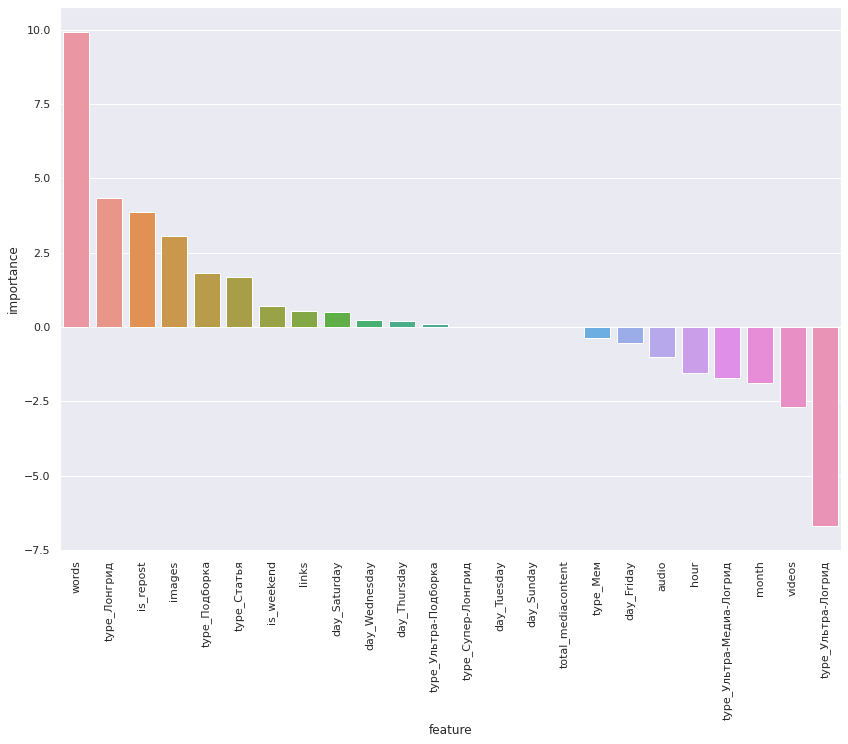

In [440]:
feature_importance = pd.DataFrame({"feature": df_reg.drop('likes',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

feature_importance.set_index('feature', inplace=True)
feature_importance.sort_values(["importance"], ascending=False, inplace=True)

plt.figure(figsize=(14, 10))
fe = sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

for item in fe.get_xticklabels():
    item.set_rotation(90)
    
# plt.savefig(PATH + "Full_analysis/features_importance.jpg", dpi=300, bbox_inches='tight')

In [438]:
feature_importance

importance
feature                             
words                       9.921994
type_Лонгрид                4.338969
is_repost                   3.879956
images                      3.067101
type_Подборка               1.821664
type_Статья                 1.687939
is_weekend                  0.694439
links                       0.540207
day_Saturday                0.500716
day_Wednesday               0.251222
day_Thursday                0.193069
type_Ультра-Подборка        0.091980
type_Супер-Лонгрид          0.000000
day_Tuesday                 0.000000
day_Sunday                  0.000000
total_mediacontent          0.000000
type_Мем                   -0.358093
day_Friday                 -0.545282
audio                      -0.998275
hour                       -1.549493
type_Ультра-Медиа-Логрид   -1.716591
month                      -1.886530
videos                     -2.697235
type_Ультра-Логрид         -6.693366

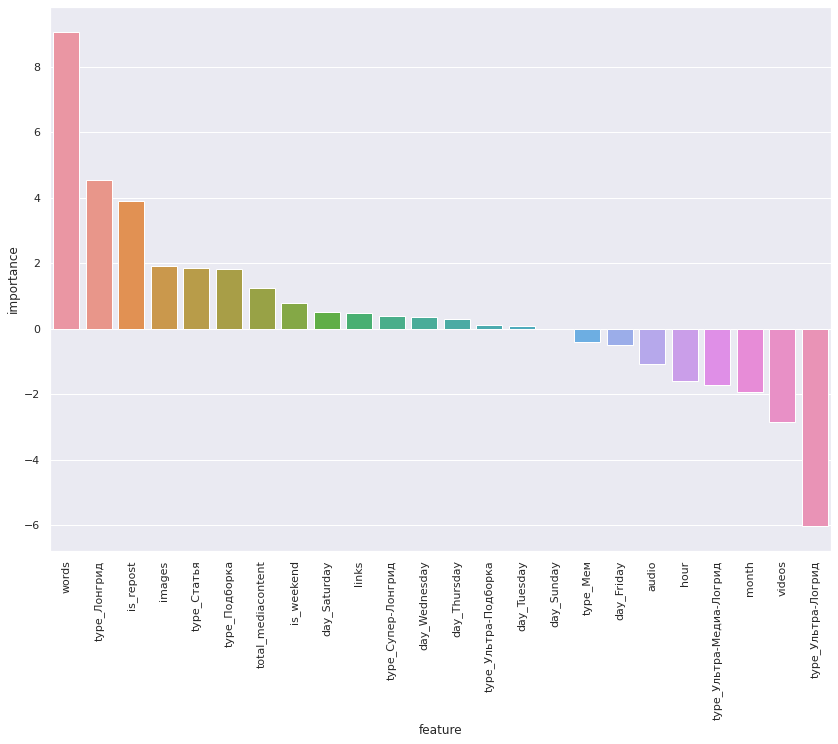

In [439]:
from sklearn.linear_model import ElasticNetCV

# Объявили модель
elastic_cv = ElasticNetCV(cv=5) 

# Обучили модель на тренировочной выборке 
elastic_cv.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_elastic = elastic_cv.predict(X_test)

feature_importance = pd.DataFrame({"feature": df_reg.drop('likes',axis=1).columns, 
                                  "importance": elastic_cv.coef_})

feature_importance.set_index('feature', inplace=True)
feature_importance.sort_values(["importance"], ascending=False, inplace=True)

plt.figure(figsize=(14, 10))
fe = sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

for item in fe.get_xticklabels():
    item.set_rotation(90)

In [316]:
# df_reg.drop(['comments_count', 'favorites_count', 'hits_count', 'date', 'id', 'url', 'author', 'subsite', 'title', 'blocks', 'repost', 'stacked_reposts_authors', 
#              'media_content_types', 'author_name', 'author_avatar_url', 'words', 'hashtags', 'period'
#             ], axis=1, inplace=True)

In [317]:
# df_reg.head()

is_repost  likes  type  author_type  symbols  images  videos  links  audio  \
0          1     36     1            1    13588      42       3      0      0   
1          1     56     1            1      223      17       0      0      0   
2          1     49     1            1       92      32       0      0      0   
3          1     41     1            1      150      19       0      1      0   
4          1     15     1            1     5057      17       0      0      0   

   total_mediacontent  ...  type_Супер-Лонгрид  type_Ультра-Логрид  \
0                  45  ...                   0                   0   
1                  17  ...                   0                   0   
2                  32  ...                   0                   0   
3                  20  ...                   0                   0   
4                  17  ...                   0                   0   

   type_Ультра-Медиа-Логрид  type_Ультра-Подборка  day_Tuesday  day_Wednesday  \
0                         0                     0            0              0   
1                         0                     0            0              0   
2                         0                     0            1              0   
3                         0                     0            0              0   
4                         0                     0            0              0   

   day_Thursday  day_Friday  day_Saturday  day_Sunday  
0             0           0             0           0  
1             0           0             0           1  
2             0           0             0           0  
3             0           0             1           0  
4             0           0             0           0  

[5 rows x 27 columns]

In [318]:
# df_reg.columns

Index(['is_repost', 'likes', 'type', 'author_type', 'symbols', 'images',
       'videos', 'links', 'audio', 'total_mediacontent', 'hour', 'month',
       'is_weekend', 'type_Лонгрид', 'type_Мем', 'type_Подборка',
       'type_Статья', 'type_Супер-Лонгрид', 'type_Ультра-Логрид',
       'type_Ультра-Медиа-Логрид', 'type_Ультра-Подборка', 'day_Tuesday',
       'day_Wednesday', 'day_Thursday', 'day_Friday', 'day_Saturday',
       'day_Sunday'],
      dtype='object')

In [319]:
# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df_reg, test_size = 0.3)

In [320]:
# from sklearn.preprocessing import StandardScaler

# # объявили скалировщик!
# scaler = StandardScaler()

# # учим скалировщик скалировать все переменны на трэйне
# scaler.fit(df_train.loc[:, ['likes', 'author_type', 'symbols', 
#                             'images', 'videos', 'links', 'audio','total_mediacontent', 'hour', 'month']]) 

StandardScaler()

In [321]:
# # Применяем скалировщик к трэйну
# df_train_scale = scaler.transform(df_train.loc[:, [
#                                                    'likes', 'author_type', 'symbols', 'images', 'videos', 'links',
#                                                    'audio','total_mediacontent', 'hour', 'month']])

# # Применяем скалирвощик к тесту 
# df_test_scale = scaler.transform(df_test.loc[:, [
#                                                    'likes', 'author_type', 'symbols', 'images', 'videos', 'links',
#                                                    'audio','total_mediacontent', 'hour', 'month']])

In [322]:
# df_train.loc[:, ['likes', 'author_type', 'symbols', 
#                     'images', 'videos', 'links', 'audio','total_mediacontent', 'hour', 'month']] = df_train_scale
# df_test.loc[:, ['likes', 'author_type', 'symbols', 
#                     'images', 'videos', 'links', 'audio','total_mediacontent', 'hour', 'month']] = df_test_scale

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [323]:
# df_train.head()

is_repost     likes  type  author_type    symbols    images    videos  \
4267          0  0.500377     1    -0.134641  -0.118223 -0.324197 -0.134295   
5056          1 -0.048186     1    -0.134641  10.306814  2.931438 -0.134295   
5984          0 -0.377323     1    -0.134641  -0.118223 -0.414631  0.526911   
5183          0 -0.157898     1    -0.134641  -0.117266  0.941884 -0.134295   
4128          0  1.378077     1    -0.134641  -0.105155 -0.324197 -0.134295   

         links     audio  total_mediacontent  ...  type_Супер-Лонгрид  \
4267 -0.144768 -0.029304           -0.341072  ...                   0   
5056  1.242588 -0.029304            2.867318  ...                   1   
5984 -0.144768 -0.029304           -0.341072  ...                   0   
5183 -0.144768 -0.029304            0.872913  ...                   0   
4128 -0.144768 -0.029304           -0.341072  ...                   0   

      type_Ультра-Логрид  type_Ультра-Медиа-Логрид  type_Ультра-Подборка  \
4267                   0                         0                     0   
5056                   0                         0                     0   
5984                   0                         0                     0   
5183                   0                         0                     0   
4128                   0                         0                     0   

      day_Tuesday  day_Wednesday  day_Thursday  day_Friday  day_Saturday  \
4267            0              0             0           0             0   
5056            0              0             0           1             0   
5984            0              0             0           0             0   
5183            0              1             0           0             0   
4128            1              0             0           0             0   

      day_Sunday  
4267           1  
5056           0  
5984           0  
5183           0  
4128           0  

[5 rows x 27 columns]

In [324]:
# print(df_train.shape)
# print(df_test.shape)  

(4830, 27)
(2070, 27)


In [325]:
# y_train = df_train.likes 
# y_test = df_test.likes 

# X_train = df_train.drop('likes', axis=1).to_numpy()
# X_test = df_test.drop('likes', axis=1).to_numpy()

In [326]:
# y_mean = np.mean(y_train)                     # посчитали среднее 
# y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
# y_pred_naive[:5]

array([-3.01576109e-17, -3.01576109e-17, -3.01576109e-17, -3.01576109e-17,
       -3.01576109e-17])

In [327]:
from sklearn import metrics  # подгружаем метрики
from sklearn.metrics import mean_absolute_percentage_error

In [328]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred) * 100)
    pass

In [329]:
# print_metrics(y_test, y_pred_naive)

MAE: 3236294.493239988
RMSE: 85910260.39032571
R2: -1.864241861526672e-05
MAPE: 100.0


In [330]:
# from sklearn.linear_model import LinearRegression

# # Объявили модель
# model_regression = LinearRegression()

# # Обучили модель на тренировочной выборке 
# model_regression.fit(X_train, y_train)

# # Сделали прогнозы на тестовой выборке 
# y_pred_regr = model_regression.predict(X_test)

In [331]:
# print_metrics(y_test,y_pred_regr)

MAE: 3236294.805670943
RMSE: 85910260.26671945
R2: 0.12179495250038763
MAPE: 193.08758901191348


In [332]:
# model_regression.intercept_, model_regression.coef_

(-0.10831217146308302,
 array([ 3.32226765e-01, -1.83741911e-14, -1.46344837e-02,  6.57860926e-01,
         2.69649839e-02, -1.49372889e-01,  2.85771654e-02,  2.21545462e-02,
         1.07396462e-02, -5.63889638e-02, -5.84676872e-02,  9.02856570e-02,
         1.27534473e+00, -3.62754349e-02,  4.40032414e-01,  2.22848992e-02,
        -1.14253924e+00, -1.61576774e+01, -2.79872664e+00,  5.39050760e-01,
         7.52620938e-02,  2.94283239e-02,  2.44091497e-02,  1.09898533e-02,
         5.49201003e-02,  3.53655567e-02]))

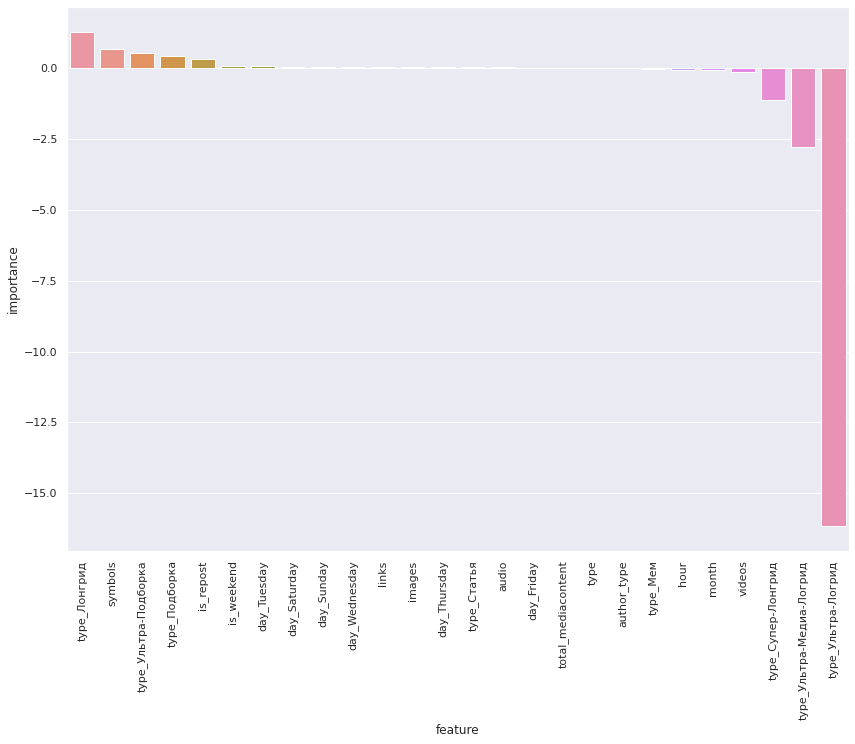

In [333]:
# feature_importance = pd.DataFrame({"feature": df_reg.drop('likes',axis=1).columns, 
#                                   "importance": model_regression.coef_})

# feature_importance.set_index('feature', inplace=True)
# feature_importance.sort_values(["importance"], ascending=False, inplace=True)
# plt.figure(figsize=(14, 10))
# fe = sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

# for item in fe.get_xticklabels():
#     item.set_rotation(90)

In [334]:
# feature_importance

importance
feature                               
type_Лонгрид              1.275345e+00
symbols                   6.578609e-01
type_Ультра-Подборка      5.390508e-01
type_Подборка             4.400324e-01
is_repost                 3.322268e-01
is_weekend                9.028566e-02
day_Tuesday               7.526209e-02
day_Saturday              5.492010e-02
day_Sunday                3.536556e-02
day_Wednesday             2.942832e-02
links                     2.857717e-02
images                    2.696498e-02
day_Thursday              2.440915e-02
type_Статья               2.228490e-02
audio                     2.215455e-02
day_Friday                1.098985e-02
total_mediacontent        1.073965e-02
type                     -1.837419e-14
author_type              -1.463448e-02
type_Мем                 -3.627543e-02
hour                     -5.638896e-02
month                    -5.846769e-02
videos                   -1.493729e-01
type_Супер-Лонгрид       -1.142539e+00
type_Ультра-Медиа-Логрид -2.798727e+00
type_Ультра-Логрид       -1.615768e+01

---

In [ ]:
# df[(df.words < 10) & (df.total_mediacontent).eq(1)]

In [ ]:
# sum([df.images, df.videos, df.links]).eq(1)

In [ ]:
# df['class'] = np.where((df.words < 50) & (sum([df.images, df.videos, df.links]).eq(1)), 0, 1)

In [ ]:
# df['class']

In [ ]:
# df.head()

In [ ]:
# sns.scatterplot(x=df.symbols, y=sum([df.images, df.videos, df.links]), hue='class', data=df)

In [ ]:
# df.words.sort_values()

In [ ]:
# [x for x in range(0,20000,50)]

In [ ]:
# sns.histplot(df.words.sort_values(), bins=[50,250,500,1000,2000,5000,10000,20000]) #bins=[x for x in range(0,20000,50)]

In [ ]:
# df.groupby(['class', 'isRepost']).agg({'likes': ["sum", "median", "mean", "max", "min"]})

In [ ]:
# df.likes.sum()

In [ ]:
# df[(df['class'] == 0) & (df['likes'] > 500)]

In [ ]:
# df[df['likes'] < 0]

In [ ]:
# tmp

In [ ]:
# custpref=pd.DataFrame({'tov_type':['Inpatient','Office Visit','Appointment Schedule','Allergy Sheet'],'count':[7,6,1,1]})

# fig=plt.figure(figsize=(6,4))
# gs1 = gridspec.GridSpec(1,1,
#     left=0.1,right=0.7,
#     bottom=0.1,top=0.7,
# )
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

# pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# # Create a list of colors (from iWantHue)
# colors = ["#6287da","#72ac5c","#8653aa","#bb7438","#b94b75"]

# # Create a pie chart
# wedges, texts = pie_ax.pie(
#     # using data total)arrests
#     tmp['id'],
#     # with no shadows
#     shadow=False,
#     # with colors
#     colors=colors,
#     # with the start angle at 90%
#     startangle=90,
# )

# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = "angle,angleA=0,angleB={}".format(ang)
#     kw["arrowprops"].update({"connectionstyle": connectionstyle,"color":colors[i]})
#     pie_ax.annotate(tmp['author_type'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
#                  horizontalalignment=horizontalalignment, **kw)

# # View the plot drop above
# pie_ax.axis('equal');

Для того, чтобы рассказать эту историю я пожертвовал математической  строгостью изложения, поскольку в противном случае сделанные выводы можно было бы сформулировать только в виде «нулевая/альтернативная гипотеза отвергается/принимается», что не очень информативно для рядового читателя.

---

# Аналитика за март

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib_venn
import seaborn as sns

import json
import yaml
import ast

import requests
from PIL import Image
from io import BytesIO
import IPython.display as Disp

from re import findall, match, sub
import itertools

from datetime import datetime
from datetime import tzinfo

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

In [ ]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [ ]:
df = pd.read_csv(PATH + 'Full_analysis/Full_weaboo_data_02_04.csv', index_col=0)
df.head()

In [ ]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [ ]:
march_subs = df["2021-03"]
march_subs.reset_index(inplace=True)
march_subs.head()

In [ ]:
march_subs.tail()

In [ ]:
# pandas_profiling.ProfileReport(march_subs)

In [ ]:
march_subs.shape

In [ ]:
(915 - 868) / 915

In [ ]:
march_subs[(march_subs.is_repost == False)].comments_count.values.sum()

In [ ]:
tmp = march_subs.groupby(['is_repost']).agg({'id': "count"})['id'].values
tmp

In [ ]:
tmp = march_subs.groupby(['is_repost', 'author_type'], as_index=False).agg({'id': "count"})
tmp

In [ ]:
from matplotlib import gridspec

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} posts".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp['id'],
    shadow=False,
    colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['id']), 
    explode=(0, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
                             "color":colors[i]
#                              "color":'b'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.8, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество постов', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "April_2021/posts.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp = march_subs.groupby(['is_repost', 'author_type'], as_index=False).agg({'comments_count': "sum"})
tmp

In [ ]:
tmp.comments_count.sum()

In [ ]:
sns.set_palette("tab10")

In [ ]:
from matplotlib import gridspec

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} comments".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp['comments_count'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['comments_count']), 
    explode=(0, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.33, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество комментариев у публикаций', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "April_2021/comments.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp = march_subs.groupby(['is_repost'], as_index=False).agg({'hits_count': "sum"})
tmp

In [ ]:
tmp.hits_count.sum()

In [ ]:
sns.set_palette("husl", 2)

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} просмотров".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nПросмотры',  
          'Репост \nПросмотры', ]

# Create a pie chart
wedges = pie_ax.pie(
    tmp['hits_count'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['hits_count']), 
    explode=(0, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.25, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество просмотров у публикаций', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "April_2021/hits.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp = march_subs.groupby(['is_repost'], as_index=False).agg({'favorites_count': "sum"})
tmp

In [ ]:
tmp.favorites_count.sum()

In [ ]:
sns.set_palette("hls", 4)

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} ДвЗ".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nДобавлений в закладки',  
          'Репост \nДобавлений в закладки', ]

# Create a pie chart
wedges = pie_ax.pie(
    tmp['favorites_count'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['favorites_count']), 
    explode=(0, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.85, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество добавлений в закладки у публикаций', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "April_2021/favs.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp = march_subs.groupby(['is_repost', 'author_type'], as_index=False).agg({'likes': "sum"})
tmp

In [ ]:
tmp.likes.sum()

In [ ]:
sns.set_palette("icefire")

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} likes".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp['likes'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp['likes']), 
    explode=(0, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.85, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество лайков у публикаций', fontsize=22, pad=20)

plt.axis('equal')

# plt.savefig(PATH + "April_2021/likes.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

def histogram_plotting(srs: pd.Series, path: str, xlim: int, ci_wide=90, desc_stat='mean', bins='auto'):
    """Function for plitting histogram (seaborn) with custom confidence interval
    and descriptive statistics.
    
    Parameters
    ----------
    srs : pd.Series
        Data for which the histogram is plotted. 
        
    ci_wide : int, default=90
        Wide of confidence interval in percents.
        
    desc_stat : str, default="mean"
        Calculated descriptive statistics.

    Returns
    -------
        None. Printing histogram.
    
    """
       
    ci = (100 - ci_wide) / 200
    confidence_interval = list(srs.quantile([ci, 1-ci]))
    
    ax = sns.histplot(srs, kde=True, bins=bins)
    max_bar_height = max([h.get_height() for h in ax.patches])
    
    ax.plot(confidence_interval, [max_bar_height*1.05, max_bar_height*1.05], color='black')
    
    for x in confidence_interval:
        ax.plot([x, x], [0, max_bar_height*1.1], color='black')
        ax.text(x, max_bar_height*1.13, f'{x:.0f}', horizontalalignment='center', verticalalignment='center')
    
    ax.text(sum(confidence_interval) / 2, max_bar_height*1.07, str(ci_wide) + '% interval',
                horizontalalignment='center', verticalalignment='center')

    descriptive_statistics = getattr(srs, desc_stat)()

    ax.plot([descriptive_statistics, descriptive_statistics], 
            [0, max_bar_height*1.05], color='black', linestyle='--')
    
    ax.text(descriptive_statistics, max_bar_height*0.15, 
            desc_stat.capitalize() + f': {descriptive_statistics:.0f}',
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
            horizontalalignment='center', verticalalignment='center')
    
    ax.set_ylim(0, max_bar_height*1.2)
    ax.set_xlim(left=-10, right=xlim)

    plt.tight_layout()
    
    plt.savefig(PATH + "April_2021/" + path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # END OF FUNC

In [ ]:
march_subs.likes.max()

In [ ]:
histogram_plotting(march_subs.likes, "march_likes_CI_hist.jpg", 700, desc_stat='median', 
                   ci_wide=95, bins=500)
plt.show()

In [ ]:
tmp = march_subs.type_of_post.value_counts()
tmp

In [ ]:
from pywaffle import Waffle

labels = tmp.index
d = {lab: val for lab, val in zip(labels, tmp.values)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=14, 
    values=list(tmp.values),
#     labels=labels,
    title={
        'label': 'Количество публикаций различных типов',
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
#     labels=[f"{k} ({int(v / sum(d.values()) * 100)}%)" for k, v in d.items()],
    legend={
        'labels': [f"{k} ({v} единиц, {round(v/sum(d.values())*100,2)}%)" for k, v in d.items()],  # labels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0.07, -0.2),
        'ncol': 4 ,
        'framealpha': 0,
        'fontsize': 12
    },
    figsize=(18, 10),
#     legend={'bbox_to_anchor': (1.3, 0.85)}    
)
# plt.savefig(PATH + "April_2021/types_of_posts.jpg", dpi=300, bbox_inches='tight')

In [ ]:
tmp_symbols = march_subs.groupby(['is_repost', 'author_type'], as_index=False).agg({'symbols': "sum"})
tmp_symbols

In [ ]:
tmp_symbols.symbols.sum()

In [ ]:
sns.set_palette("husl")

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} символов".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp_symbols['symbols'],
    shadow=False,
#     colors=colors, 
    startangle=135, #frame=True, 
    autopct=lambda pct: func(pct, tmp_symbols['symbols']), 
    explode=(0, 0.05, 0, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.89, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество символов в публикациях', fontsize=22, pad=26)

plt.axis('equal')

# plt.savefig(PATH + "April_2021/symbols.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_media = march_subs.groupby(['is_repost', 'author_type'], as_index=False).agg({'total_mediacontent': "sum"})
tmp_media

In [ ]:
tmp_media.total_mediacontent.sum()

In [ ]:
sns.set_palette("viridis_r")

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} medias".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = ['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
          'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']# tmp.author_type.values  

# Create a pie chart
wedges = pie_ax.pie(
    tmp_media['total_mediacontent'],
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp_media['total_mediacontent']), 
    explode=(0, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.88, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Общее количество единиц медиконтента в публикациях', fontsize=22, pad=26)

plt.axis('equal')

# plt.savefig(PATH + "April_2021/medias.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [20, 16]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
ax = sns.scatterplot(x='symbols', y='total_mediacontent', hue='likes', palette='turbo', data=march_subs)

norm = plt.Normalize(df.likes.min(), df.likes.max())
sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.xlabel('Количество символов в публикации', fontsize=16)
plt.ylabel('Количество медиаконтента в публикации', fontsize=16)
plt.title('Диаграмма рассеяния между количеством медиаконтента и лайками', fontsize=22, pad=20);

# plt.savefig(PATH + "April_2021/scatter_symbols_media_likes.jpg", dpi=300, bbox_inches='tight')

plt.show()

---

---

---

In [ ]:
march_subs.set_index('date', inplace=True)
march_subs.index = pd.to_datetime(march_subs.index)

In [ ]:
march_ts = march_subs.resample('D').apply({'id':'count'})
march_ts["weekday"] = march_ts.index.weekday
march_ts

In [ ]:
fe = sns.barplot(data=march_ts, x=march_ts.index, y=march_ts.id)
ax = fe

for item in fe.get_xticklabels():
    item.set_rotation(90)

for p in ax.patches:
             ax.annotate("%.1d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')    
        
ax.set_title('Количество постов, публикуемых ежедневно в течение месяца', fontsize=18, pad=20)
ax.set_xlabel('Число месяца', fontsize='16')
ax.set_ylabel('Количество статей', fontsize='16');

# plt.savefig(PATH + "April_2021/posts_by_day.png", dpi=300, bbox_inches='tight')

In [ ]:
march_ts.groupby("weekday").sum()

In [ ]:
from pandas.api.types import CategoricalDtype

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
march_subs['weekday'] = march_subs['weekday'].astype(cat_type)

In [ ]:
sns.set_palette('hls')

ax = sns.barplot(data=march_subs, x=march_subs.groupby("weekday")["id"].count().sort_index().index, 
            y=march_subs.groupby("weekday")["id"].count().sort_index().values)

for p in ax.patches:
             ax.annotate("%.1d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')  

ax.set_title('Количество постов, сгруппированное по дням недели', fontsize=18, pad=20)
ax.set_xlabel('День недели', fontsize='16')
ax.set_ylabel('Количество статей', fontsize='16');

# plt.savefig(PATH + "April_2021/posts_by_day_sum.png", dpi=300, bbox_inches='tight')

---

---

---

In [ ]:
hshtgs = pd.Series([x for item in march_subs.hashtags for x in item])
hshtgs.value_counts().head(30)

In [ ]:
plt.rcParams["figure.figsize"] = [14, 20]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = hshtgs.value_counts().head(30).index[::-1]
values = hshtgs.value_counts().head(30).values[::-1]

height = 0.9
plt.barh(y=labels, width=values, height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 200, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество хэштегов', fontsize=16)
plt.ylabel('Хэштеги', fontsize=16)
plt.title('Топ-30 хэштегов по частоте использования', fontsize=22, pad=20)
plt.grid(True, alpha=0.5)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/hashtags.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
author_set_post = set(march_subs[march_subs.is_repost == False].author_name.unique())
author_set_repost = set(march_subs[march_subs.is_repost == True].author_name.unique())

from matplotlib_venn import venn2
plt.figure(figsize=(30,30))

venn = venn2([author_set_post, author_set_repost], ('Авторы подсайта', 'Авторы репостов'))

venn.get_label_by_id('100').set_text('\n'.join(map(str, author_set_post-author_set_repost)))
venn.get_label_by_id('110').set_text('\n'.join(map(str, author_set_post&author_set_repost)))
venn.get_label_by_id('010').set_text('\n'.join(map(str, author_set_repost-author_set_post)))

plt.title('Количество уникальных авторов', fontsize=40)

# plt.savefig(PATH + "April_2021/authors_venn.jpg", dpi=300, bbox_inches='tight')

plt.show()

---

---

---

In [ ]:
march_subs.head(2)

In [ ]:
# march_subs[march_subs.author_name == "Knightmare"] # Reposts from GachaHell

In [ ]:
tmp_3 = march_subs[march_subs.is_repost == False].groupby(['author_name','author_avatar_url'], 
                as_index=False).count().sort_values(by="id", ascending=False).iloc[:, [0,1,3]].head(10)
tmp_3.head(20)

In [ ]:
sum(tmp_3.id[:3])

In [ ]:
march_subs.id.count()

In [ ]:
sum(tmp_3.id[:3]) / march_subs.id.count() * 100

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

labels = tmp_3.author_avatar_url[::-1]
colors = ['lightcoral', 'orchid', 'tan', 'peachpuff', 'goldenrod', 'darkred', 'darkturquoise', 'indigo', 'coral', 'pink'][::-1]
values = tmp_3.id[::-1] 

height = 0.9
plt.barh(y=tmp_3.author_name[::-1], width=tmp_3.id[::-1], height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 8, value - 2, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество постов за месяц', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-10 авторов по количеству постов за март', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/authors_top10_posts.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
march_subs.columns

In [ ]:
tmp_123 = march_subs[march_subs.is_repost == True].groupby(['subsite','author_avatar_url'], 
                as_index=False).count().sort_values(by="id", ascending=False).head(10).iloc[:, [0,1,3]] 
tmp_123.head(20)

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

labels = tmp_123.author_avatar_url[::-1]
# colors = ['lightcoral', 'orchid', 'tan', 'peachpuff', 'goldenrod', 'darkred', 'darkturquoise', 'indigo', 'coral', 'pink'][::-1]
values = tmp_123.id[::-1] 

height = 0.9
my_cmap = plt.get_cmap("coolwarm")
plt.barh(y=tmp_123.subsite[::-1], width=tmp_123.id[::-1], height=height, 
         color=my_cmap(rescale(values)), align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 2.5, value - 0.5, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество репостов за месяц', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-10 авторов по количеству репостов за март', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/authors_top10_reposts.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_2 = march_subs[march_subs.is_repost == False].groupby(['author_name','author_avatar_url'], 
                as_index=False).agg({"likes": "sum"}).sort_values(by="likes", ascending=False).head(20)
tmp_2.head(10)

In [ ]:
sum(tmp_2.likes[:3])

In [ ]:
sum(tmp_2.likes[:3]) / (march_subs[(march_subs.is_repost == False)].likes.sum()) * 100

In [ ]:
plt.rcParams["figure.figsize"] = [14, 20]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = tmp_2.author_avatar_url[::-1]
# colors = ['lightcoral', 'orchid', 'peachpuff', 'coral', 'tan', 'indigo', 'goldenrod', 'pink', 'darkturquoise', 'teal'][::-1]
values = tmp_2.likes[::-1] 

height = 0.9
plt.barh(y=tmp_2.author_name[::-1], width=tmp_2.likes[::-1], height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 200, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Сумма рейтинга за месяц', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-20 авторов по сумме рейтинга за март', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/authors_top20_sum_likes.png", dpi=300, bbox_inches='tight')

plt.show()

---

---

---

In [ ]:
tmp_4 = march_subs[(march_subs.is_repost == False)].sort_values(by='likes', ascending=False) \
.head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date', 'type_of_post']]
tmp_4.loc[573, 'title'] = '50 лайков этой милой тян или завтра я запощу гяру ...' 
tmp_4.loc[517, 'title'] = "Объемная подборка смущенных(и не очень) дев ..."
tmp_4.loc[353, 'title'] = "Спорт. Шортики, голубые волосы и кроссы ..."
tmp_4.loc[72, 'title'] = "Запись пользователя Over9k5000"
tmp_4

In [ ]:
from matplotlib import cm

labels = tmp_4.title[::-1]#.astype('str')
values = tmp_4.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_4.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(5, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по лайкам за март - без учёта репостов', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/top10_posts_likes.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_4 = march_subs.sort_values(by='likes', ascending=False) \
.head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date', 'type_of_post']]
tmp_4.loc[287, 'title'] = 'Мангаки, сценаристки, режиссёры: 20 ...' 
tmp_4.loc[175, 'title'] = "Анимешная раздача игр Steam"
tmp_4.loc[774, 'title'] = "История визуальных новелл: ..."
tmp_4.loc[306, 'title'] = "Спорт. Шортики и голубые волосы от ..."
tmp_4.loc[818, 'title'] = "Ниндзя: история появления, ..."
tmp_4

In [ ]:
from matplotlib import cm

labels = tmp_4.title[::-1]#.astype('str')
values = tmp_4.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_4.author_name[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(5, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('Автор публикации', fontsize=16)
plt.title('Топ-10 публикаций по лайкам за март - с учётом репостов', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/top10_reposts_likes.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_5 = march_subs[(march_subs.is_repost == False)].sort_values(by='hits_count', ascending=False) \
.head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "hits_count", 'date']]
tmp_5.loc[858, 'title'] = 'Статистика печатной ...'
tmp_5.loc[845, 'title'] = 'My girl — Храбрость  ...' 
tmp_5.loc[8, 'title'] = 'Neko no Otera ...' 
tmp_5.loc[638, 'title'] = 'Обычная яп...' 
tmp_5.loc[134, 'title'] = 'Бикини, хво...' 
tmp_5.loc[600, 'title'] = "Запись ..."
tmp_5.loc[867, 'title'] = "Смена напр..."

tmp_5

In [ ]:
from matplotlib import cm

labels = tmp_5.title[::-1]#.astype('str')
values = tmp_5.hits_count[::-1]

my_cmap = plt.get_cmap("summer")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_5.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(50, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество просмотров', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по просмотрам за март - без учёта репостов', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/top10_posts_hits.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_5 = march_subs.sort_values(by='hits_count', ascending=False) \
.head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "hits_count", 'date']]
tmp_5.loc[234, 'title'] = '«Классика японской литературы»...'
tmp_5.loc[423, 'title'] = "Вышли все 12 серий аниме VLAD ..."
tmp_5.loc[287, 'title'] = 'Мангаки, сценаристки, реж...' 
tmp_5.loc[126, 'title'] = 'Художник показал конц...' 
tmp_5.loc[326, 'title'] = 'Конкурс Весенние школ...' 

tmp_5

In [ ]:
from matplotlib import cm

labels = tmp_5.title[::-1]#.astype('str')
values = tmp_5.hits_count[::-1]

my_cmap = plt.get_cmap("summer")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_5.author_name[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(50, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество просмотров', fontsize=16)
plt.ylabel('Автор публикации', fontsize=16)
plt.title('Топ-10 публикаций по просмотрам за март - с учётом репостов', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/top10_reposts_hits.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_6 = march_subs[(march_subs.is_repost == False)].sort_values(by='comments_count', ascending=False) \
.head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "comments_count", 'date']]
tmp_6.loc[644, 'title'] = 'Запись пользователя Marshal_New_Arleana'
tmp_6

In [ ]:
labels = tmp_6.title[::-1]#.astype('str')
values = tmp_6.comments_count[::-1]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_6.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество комментариев', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по количеству комментариев за март - без учёта репостов', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/top10_posts_comments_alter.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_6 = march_subs.sort_values(by='comments_count', ascending=False) \
.head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "comments_count", 'date']]
tmp_6.loc[587, 'title'] = 'Интересные вещи происходят в япо...'
tmp_6.loc[666, 'title'] = 'Genshin Impact или как у miHoYo...'
tmp_6.loc[816, 'title'] = 'Я сначала не понял, а потом как...'
tmp_6

In [ ]:
labels = tmp_6.title[::-1]#.astype('str')
values = tmp_6.comments_count[::-1]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_6.author_name[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество комментариев', fontsize=16)
plt.ylabel('Автор публикации', fontsize=16)
plt.title('Топ-10 публикаций по количеству комментариев за март - с учётом репостов', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/top10_reposts_comments_alter.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_7 = march_subs[(march_subs.is_repost == False)].sort_values(by='favorites_count', ascending=False) \
.head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "favorites_count", 'date']]
tmp_7

In [ ]:
plt.rcParams["figure.figsize"] = [16, 10]

labels = tmp_7.title[::-1]#.astype('str')
values = tmp_7.favorites_count[::-1]

my_cmap = plt.get_cmap("Spectral")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_7.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество добавлений в закладки', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по количеству добавлений в закладки за март - без учёта репостов', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/top10_posts_favorites_alter.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_7 = march_subs.sort_values(by='favorites_count', ascending=False) \
.head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "favorites_count", 'date']]
tmp_7.loc[818, 'title'] = 'Ниндзя: история появления, развитие, отражение...'
tmp_7.loc[774, 'title'] = 'История визуальных новелл: Последние годы без ...'
tmp_7.loc[287, 'title'] = 'Мангаки, сценаристки, режиссёры: 20 великих жен...'
tmp_7.loc[306, 'title'] = 'Спорт. Шортики и голубые волосы ...'
tmp_7.loc[616, 'title'] = 'Об «Этажах», ЛГБТ и аниме...'
tmp_7.loc[845, 'title'] = 'My girl — Храбрость идти впе...'

tmp_7

In [ ]:
plt.rcParams["figure.figsize"] = [16, 10]

labels = tmp_7.title[::-1]#.astype('str')
values = tmp_7.favorites_count[::-1]

my_cmap = plt.get_cmap("Spectral")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_7.author_name[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество добавлений в закладки', fontsize=16)
plt.ylabel('Автор публикации', fontsize=16)
plt.title('Топ-10 публикаций по количеству добавлений в закладки за март - с учётом репостов', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/top10_reposts_favorites_alter.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
march_subs.type_of_post.unique()

In [ ]:
tmp_111 = march_subs[(march_subs.is_repost == False) & (march_subs.type_of_post == "Ультра-Подборка")].sort_values(by='likes', ascending=False) \
.head(5).loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date']]
# meme
# tmp_111.loc[72, 'title'] = 'Запись пользователя Over9k5000'
# tmp_111.loc[39, 'title'] = 'Запись пользователя Diego Paw'
# tmp_111.loc[832, 'title'] = 'Запись пользователя Лолег'
# tmp_111.loc[268, 'title'] = 'Запись пользователя nahtigalka'
# note
# tmp_111.loc[573, 'title'] = '50 лайков этой милой тян или завтра я запощу ...'
# tmp_111.loc[811, 'title'] = 'Приятного аппетита всем кто кушает и с началом...'
# tmp_111.loc[867, 'title'] = 'Смена направления подсайта и полный зап...'
# article
# tmp_111.loc[361, 'title'] = 'Jumyou wo Kaitotte Moratta. Ichinen ni Tsuki, ...'
# ultraset
# tmp_111.loc[232, 'title'] = 'S1EP2/BD...'
# tmp_111.loc[602, 'title'] = 'S1EP4/BD...'

tmp_111

In [ ]:
# march_subs.loc[766, 'type_of_post'] = "Подборка"
# march_subs.loc[90, 'type_of_post'] = "Подборка"
# march_subs.loc[18, 'type_of_post'] = "Подборка"
# march_subs.loc[482, 'type_of_post'] = "Подборка"

In [ ]:
from matplotlib import cm

labels = tmp_111.title[::-1]#.astype('str')
values = tmp_111.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_111.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(5, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-5 ультра-подборок за март', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "April_2021/top_ultraset_likes.jpg", dpi=300, bbox_inches='tight')

plt.show()

# Аналитика за февраль

In [ ]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [ ]:
fev_subs = df["2021-02"]
fev_subs.reset_index(inplace=True)
fev_subs.head()

In [ ]:
fev_subs.tail()

In [ ]:
fev_subs.shape

In [ ]:
import matplotlib as mpl
sns.set_palette('husl', 10)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} posts".format(pct, absolute)

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 14.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs.groupby(['isRepost']).agg({'id': "count"})['id'].values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

ax1.axis('equal')
plt.title('Доля репостов от общего количества публикаций за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/part_of_reposts.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fev_subs.commentsCount.sum()

In [ ]:
fev_subs.groupby(["isRepost"]).commentsCount.sum()

In [ ]:
import matplotlib as mpl

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} comments".format(pct, absolute)

sns.set_theme()
sns.set_palette("pastel")

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 14.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs.groupby(["isRepost"]).commentsCount.sum().values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, 
                                    autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)
ax1.axis('equal')
plt.title('Количество комментариев в публикациях за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/comments_parted.png", dpi=300, bbox_inches='tight')
plt.show()

sns.set_theme()

In [ ]:
sns.set_theme()

In [ ]:
from pandas.plotting import table 

In [ ]:
fev_subs.groupby(['isRepost']).agg({'commentsCount': ["sum", "median", "mean", "max", "min"]})

In [ ]:
# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, fev_subs.groupby(['isRepost']).agg({'commentsCount': ["sum", "median", "mean", "max", "min"]}))  # where df is your data frame
# plt.tight_layout()
# plt.savefig(PATH + "March_2021/test_table.png", dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
# sns.histplot(x = fev_subs.commentsCount, data=fev_subs, hue="isRepost", kde=True)
sns.displot(x = fev_subs.commentsCount, data=fev_subs, col="isRepost", kde=True)

Надо попробовать посчитать количество уникальных авторов, которые зарепосчены извне.

In [ ]:
len(fev_subs[fev_subs.isRepost == False].author_name.unique())

In [ ]:
len(fev_subs[fev_subs.isRepost == True].author_name.unique())

In [ ]:
fev_subs[(fev_subs.isRepost == False) & (fev_subs.title != "Статья удалена")].likes.sum()

In [ ]:
fev_subs.groupby(['isRepost']).author_name.unique()

In [ ]:
fev_subs.author_name.unique()

In [ ]:
fev_subs.columns

In [ ]:
fev_subs.hitsCount.sum()

In [ ]:
fev_subs.groupby(['isRepost']).agg({'hitsCount': ["sum", "median", "mean", "max", "min"]})

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} просмотров".format(pct, absolute)

sns.set_palette("rainbow")

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 14.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs.groupby(["isRepost"]).hitsCount.sum().values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

ax1.axis('equal')
plt.title('Просмотры публикаций за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/part_of_reposts_hits.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fev_subs.favoritesCount.sum()

In [ ]:
fev_subs.groupby(['isRepost']).agg({'favoritesCount': ["sum", "median", "mean", "max", "min"]})

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} добавлений в закладки".format(pct, absolute)

sns.set_palette("summer")

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 12.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs.groupby(["isRepost"]).favoritesCount.sum().values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

ax1.axis('equal')
plt.title('Добавления статей в закладки за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/part_of_reposts_fav.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fev_subs.likes.sum()

In [ ]:
fev_subs[fev_subs.title != 'Статья удалена'].likes.sum()

In [ ]:
fev_subs[fev_subs.title != 'Статья удалена'].groupby(['isRepost']).agg({'likes': ["sum", "median", "mean", "max", "min"]})

In [ ]:
18492 + 4570

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} лайков".format(pct, absolute)

sns.set_palette("Spectral")

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 14.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs[fev_subs.title != 'Статья удалена'].groupby(["isRepost"]).likes.sum().values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

ax1.axis('equal')
plt.title('Количество лайков за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/part_of_reposts_likes.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# fev_subs.likes[fev_subs.isRepost == True]
# fev_subs.likes[fev_subs.isRepost == False]

In [ ]:
# fev_subs.groupby(['isRepost']).agg({})

In [ ]:
f, axes = plt.subplots(1, 2, sharey=True, sharex=True)
f.suptitle("Распределение количества лайков у постов")

sns.histplot(x = fev_subs.likes[fev_subs.isRepost == False], 
             data=fev_subs, kde=True, ax=axes[0], bins=20).set_title("Посты подсайта")

sns.histplot(x = fev_subs.likes[fev_subs.isRepost == True], 
             data=fev_subs, kde=True, ax=axes[1], bins=20).set_title("Репосты")


# plt.savefig(PATH + "March_2021/part_of_reposts_dist_likes.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
fev_subs.symbols.sum()

In [ ]:
fev_subs.images.sum() + fev_subs.videos.sum() + fev_subs.links.sum()

In [ ]:
tmp_2 = fev_subs[fev_subs.isRepost == False].groupby(['author_name','author_avatar_url'], as_index=False).agg({"likes": "sum"}) \
.sort_values(by="likes", ascending=False).head(20)
tmp_2.head(10)

In [ ]:
sum(tmp_2.likes[:5])

In [ ]:
sum(tmp_2.likes[:5]) / (fev_subs[(fev_subs.isRepost == False) & (fev_subs.title != "Статья удалена")].likes.sum()) * 100

In [ ]:
plt.rcParams["figure.figsize"] = [14, 20]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = tmp_2.author_avatar_url[::-1]
# colors = ['lightcoral', 'orchid', 'peachpuff', 'coral', 'tan', 'indigo', 'goldenrod', 'pink', 'darkturquoise', 'teal'][::-1]
values = tmp_2.likes[::-1] 

height = 0.9
plt.barh(y=tmp_2.author_name[::-1], width=tmp_2.likes[::-1], height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 200, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Сумма рейтинга за месяц', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-20 авторов по сумме рейтинга за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/authors_top20_sum_likes.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_3 = fev_subs[fev_subs.isRepost == False].groupby(['author_name','author_avatar_url'], as_index=False).count() \
.sort_values(by="id", ascending=False).iloc[:, [0,1,3]].head(10)
tmp_3.head(20)

In [ ]:
sum(tmp_3.id[:3])

In [ ]:
sum(tmp_3.id[:3]) / 518 * 100

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

labels = tmp_3.author_avatar_url[::-1]
colors = ['lightcoral', 'orchid', 'tan', 'peachpuff', 'goldenrod', 'darkred', 'darkturquoise', 'indigo', 'coral', 'pink'][::-1]
values = tmp_3.id[::-1] 

height = 0.9
plt.barh(y=tmp_3.author_name[::-1], width=tmp_3.id[::-1], height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 8, value - 2, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество постов за месяц', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-10 авторов по количеству постов за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/authors_top10_posts.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_4 = fev_subs[(fev_subs.isRepost == False)].sort_values(by='likes', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
tmp_4.loc[581, 'title'] = "Запись пользователя Over9k5000"
tmp_4.loc[99, 'title'] = "Запись пользователя СынМаэстро"
# tmp_4 = tmp_4[tmp_4.index != 128]
tmp_4

In [ ]:
# tmp_4 = fev_subs.sort_values(by='likes', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
# # tmp_4.loc[383, 'title'] = 'Спорт, офис, чулочки и жаркое лето от infin...'
# # tmp_4.loc[581, 'title'] = "Запись пользователя Over9k5000"
# # tmp_4.loc[99, 'title'] = "Запись пользователя СынМаэстро"
# # # tmp_4 = tmp_4[tmp_4.index != 128]
# tmp_4

In [ ]:
from matplotlib import cm

labels = tmp_4.title[::-1]#.astype('str')
values = tmp_4.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_4.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(5, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по лайкам за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/top10_posts_likes.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_5 = fev_subs[(fev_subs.isRepost == False)].sort_values(by='hitsCount', ascending=False).head(11).loc[:, ["id", 'author_name','author_avatar_url', 'title', "hitsCount", 'date']]
tmp_5.loc[237, 'title'] = 'Арифурэта: Сильнейший ремесленник в мире. Как ...'
tmp_5.loc[159, 'title'] = '( ͡° ͜ʖ ͡°) Интересный музей в ...' 
tmp_5.loc[353, 'title'] = 'Чулочки, каре и немного игривости от ...' 
tmp_5.loc[339, 'title'] = 'Он вам не Rintarou Okabe (перез...' 
tmp_5.loc[383, 'title'] = 'Спорт, офис, чулочки и жарк...' 
tmp_5.loc[475, 'title'] = "RASP/28 Подборка работ ..."
tmp_5 = tmp_5[tmp_5.index != 128]
tmp_5

In [ ]:
# tmp_5 = fev_subs.sort_values(by='hitsCount', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "hitsCount", 'date']]
# # tmp_5.loc[237, 'title'] = 'Арифурэта: Сильнейший ремесленник в мире. Как ...'
# # tmp_5.loc[159, 'title'] = '( ͡° ͜ʖ ͡°) Интересный музей в ...' 
# # tmp_5.loc[353, 'title'] = 'Чулочки, каре и немного игривости от ...' 
# # tmp_5.loc[339, 'title'] = 'Он вам не Rintarou Okabe (перез...' 
# # tmp_5.loc[383, 'title'] = 'Спорт, офис, чулочки и жарк...' 
# # tmp_5.loc[475, 'title'] = "RASP/28 Подборка работ ..."
# # tmp_5 = tmp_5[tmp_5.index != 128]
# # tmp_5['title'] = tmp_5['title'].str.slice(0,30) + str("...")
# tmp_5.loc[587, 'title'] = "Удивительный мир видеоигр по мотивам Neon Gene..."
# tmp_5.loc[380, 'title'] = "Neon Genesis Evangelion и эмоции, ..."
# tmp_5.loc[123, 'title'] = 'Отзыв на мангу "О т...'
# # tmp_5.loc[432, 'title'] = 'Гость Блогосф...'
# tmp_5

In [ ]:
from matplotlib import cm

labels = tmp_5.title[::-1]#.astype('str')
values = tmp_5.hitsCount[::-1]

my_cmap = plt.get_cmap("summer")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_5.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(50, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество просмотров', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по просмотрам за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/top10_posts_hits_alter.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_6 = fev_subs[(fev_subs.isRepost == False)].sort_values(by='commentsCount', ascending=False).head(11).loc[:, ["id", 'author_name','author_avatar_url', 'title', "commentsCount", 'date']]
# tmp_6.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
# tmp_6['title'] = tmp_6['title'].str.slice(0,50)
tmp_6.loc[237, 'title'] = 'Арифурэта: Сильнейший ремесленник в мире. Как ...'
tmp_6 = tmp_6[tmp_6.index != 128]
tmp_6

In [ ]:
tmp_6 = fev_subs.sort_values(by='commentsCount', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "commentsCount", 'date']]
tmp_6.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил ...'
# tmp_6['title'] = tmp_6['title'].str.slice(0,50)
# tmp_6.loc[237, 'title'] = 'Арифурэта: Сильнейший ремесленник в мире. Как ...'
# tmp_6 = tmp_6[tmp_6.index != 128]
tmp_6.loc[587, 'title'] = "Удивительный мир ..."
tmp_6.loc[380, 'title'] = "Neon Genesis Evangelion и ..."
tmp_6.loc[197, 'title'] = 'Беспокойные Сердца - ...'
tmp_6.loc[375, 'title'] = 'Re:DTF Жизнь с нуля в...'
tmp_6

In [ ]:
labels = tmp_6.title[::-1]#.astype('str')
values = tmp_6.commentsCount[::-1]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_6.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество комментариев', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по количеству комментариев за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/alter_top10_posts_comments_alter.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_7 = fev_subs[(fev_subs.isRepost == False)].sort_values(by='favoritesCount', ascending=False).head(11).loc[:, ["id", 'author_name','author_avatar_url', 'title', "favoritesCount", 'date']]
# tmp_7['title'] = tmp_7['title'].str.slice(0,25) + str("...")
tmp_7 = tmp_7[tmp_7.index != 128]
tmp_7.loc[339, 'title'] = 'Он вам не Rintarou Okabe (перезалив, автор Mah...' 
tmp_7

In [ ]:
tmp_7 = fev_subs.sort_values(by='favoritesCount', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "favoritesCount", 'date']]
# tmp_7['title'] = tmp_7['title'].str.slice(0,25) + str("...")
# tmp_7 = tmp_7[tmp_7.index != 128]
# tmp_7.loc[339, 'title'] = 'Он вам не Rintarou Okabe (перезалив, автор Mah...' 
# tmp_7.loc[587, 'title'] = "Удивительный мир ..."
# tmp_7.loc[380, 'title'] = "Neon Genesis Evangelion и ..."
tmp_7.loc[197, 'title'] = 'Беспокойные Сердца - Замечатель...'
tmp_7.loc[353, 'title'] = 'Чулочки, каре и немного игривости ...' 
tmp_7.loc[136, 'title'] = 'Столько интересных аниме п...'
tmp_7.loc[137, 'title'] = 'Японский бренд совм...'
tmp_7.loc[123, 'title'] = 'Отзыв на мангу "О т...'
tmp_7

In [ ]:
plt.rcParams["figure.figsize"] = [16, 10]

labels = tmp_7.title[::-1]#.astype('str')
values = tmp_7.favoritesCount[::-1]

my_cmap = plt.get_cmap("Spectral")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_7.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество добавлений в закладки', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по количеству добавлений в закладки за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/alter_top10_posts_favorites_alter.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# fev_subs[(fev_subs["images"] + fev_subs["videos"] + fev_subs["links"]) < 100]

In [ ]:
tmp = fev_subs[#(fev_subs.symbols < 10000) 
               #& ((fev_subs["images"] + fev_subs["videos"] + fev_subs["links"]) < 100) & 
               (fev_subs.isRepost == False)]

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

ax = sns.scatterplot(x=tmp.symbols, hue=tmp.likes, 
                y=sum([tmp.images, tmp.videos, tmp.links]), data=tmp, 
                palette = "rocket_r")
                #cmap="icefire")
ax.set_title('Диаграмма зависимости количества лайков от количества символов и медиаконтента в статье', fontsize=18, pad=20)
ax.get_legend().set_title('Лайки')
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set_xlabel('Количество символов в статье', fontsize='16')
ax.set_ylabel('Количество медиаконтента в статье', fontsize='16');

# plt.savefig(PATH + "March_2021/scatterplot.png", dpi=300, bbox_inches='tight')

In [ ]:
tmp_8 = fev_subs[(fev_subs.isRepost == False) & (fev_subs.symbols > 2000)].sort_values(by='likes', ascending=False).head(10) \
.loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date', 'symbols']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
# tmp_8.loc[581, 'title'] = "Запись пользователя Over9k5000"
tmp_8.loc[237, 'title'] = "Арифурэта: Сильнейший ремесл..."
tmp_8

In [ ]:
labels = tmp_8.title[::-1]#.astype('str')
values = tmp_8.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_8.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-7 лонгридов (по лайкам) за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/top7_longreads.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_9 = fev_subs[(fev_subs.isRepost == False) & (fev_subs.images > 5)].sort_values(by='likes', ascending=False).head(10) \
.loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
# tmp_8.loc[581, 'title'] = "Запись пользователя Over9k5000"
# tmp_8.loc[99, 'title'] = "Запись пользователя СынМаэстро"
tmp_9

In [ ]:
labels = tmp_9.title[::-1]#.astype('str')
values = tmp_9.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_9.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(5, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 подборок (по лайкам) за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/top10_sets.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_10 = fev_subs[(fev_subs.isRepost == False) & (fev_subs.images+fev_subs.videos+fev_subs.links == 1)].sort_values(by='likes', ascending=False).head(10) \
.loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
tmp_10.loc[581, 'title'] = "Запись пользователя Over9k5000"
tmp_10.loc[99, 'title'] = "Запись пользователя СынМаэстро"
tmp_10.loc[429, 'title'] = "Запись пользователя Лолег"
tmp_10.loc[430, 'title'] = "Запись пользователя Лолег"
tmp_10.loc[381, 'title'] = "Запись пользователя Diego Paw"
tmp_10

In [ ]:
labels = tmp_10.title[::-1]#.astype('str')
values = tmp_10.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_10.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(5, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 мемов (по лайкам) за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/top10_memes.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

ax = sns.scatterplot(x=df.symbols, hue=df.likes, 
                y=sum([df.images, df.videos, df.links]), data=df[df.isRepost == False], 
                palette = "crest")
                #cmap="icefire")
ax.set_title('Диаграмма зависимости количества лайков от количества символов и медиаконтента в статье', fontsize=18, pad=20)
ax.get_legend().set_title('Лайки')
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set_xlabel('Количество символов в статье', fontsize='16')
ax.set_ylabel('Количество медиаконтента в статье', fontsize='16');


In [ ]:
df[(df.symbols > 20000)]# & (df.isRepost == False)].author_name

In [ ]:
# fev_subs[fev_subs.likes > 150]

In [ ]:
tmp = fev_subs[fev_subs.title == "Статья удалена"]
tmp

In [ ]:
tmp.id.unique()

In [ ]:
sns.scatterplot(x=tmp.likes, #hue=tmp.subsite, 
                y=tmp.hitsCount, data=tmp)

In [ ]:
fev_subs

In [ ]:
fev_subs.set_index('date', inplace=True)
fev_subs.index = pd.to_datetime(fev_subs.index)

In [ ]:
# # #fev_subs.reset_index(inplace=True)
fev_subs.head()

In [ ]:
fev_subs["2021-02-08"]

In [ ]:
feb_ts = fev_subs.resample('D').apply({'id':'count'})
feb_ts["weekday"] = feb_ts.index.weekday
feb_ts

In [ ]:
fe = sns.barplot(data=feb_ts, x=feb_ts.index, y=feb_ts.id)
ax = fe

for item in fe.get_xticklabels():
    item.set_rotation(90)

for p in ax.patches:
             ax.annotate("%.1d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')    
        
ax.set_title('Количество постов, публикуемых ежедневно в течение месяца', fontsize=18, pad=20)
ax.set_xlabel('Число месяца', fontsize='16')
ax.set_ylabel('Количество статей', fontsize='16');

# plt.savefig(PATH + "March_2021/posts_by_day.png", dpi=300, bbox_inches='tight')

In [ ]:
feb_ts.groupby("weekday").sum()

In [ ]:
days = {'Monday': 'Понедельник', 'Tuesday': 'Вторник', 'Wednesday': 'Среда', 'Thursday': 'Четверг', 
 'Friday': 'Пятница', 'Saturday': 'Суббота',  'Sunday': 'Воскресенье'}  

from pandas.api.types import CategoricalDtype

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
fev_subs['weekday'] = fev_subs['weekday'].astype(cat_type)
# fev_subs['weekday'].replace(to_replace=days, inplace=True)

In [ ]:
sns.set_palette('hls')

ax = sns.barplot(data=fev_subs, x=fev_subs.groupby("weekday")["id"].count().sort_index().index, 
            y=fev_subs.groupby("weekday")["id"].count().sort_index().values)

for p in ax.patches:
             ax.annotate("%.1d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')  

ax.set_title('Количество постов, сгруппированное по дням недели', fontsize=18, pad=20)
ax.set_xlabel('День недели', fontsize='16')
ax.set_ylabel('Количество статей', fontsize='16');

# plt.savefig(PATH + "March_2021/posts_by_day_sum.png", dpi=300, bbox_inches='tight')

In [ ]:
# fev_subs.groupby("weekday")["id"].count().sort_index().values